In [1]:
import pandas as pd              #analyse de donnees
import numpy as np               #manipulation de tableaux ou calcul mathematiques
import seaborn as sns            #visualisation de donnees
import matplotlib.pyplot as plt  #visualisation les données
import scipy
from matplotlib import rcParams

In [2]:
data=pd.read_csv("worldHappinessReport.csv")

In [3]:
data.head()

Unnamed: 0      Country  Happiness       GDP  SocialSupport     Health  \
0           1  Afghanistan   2.661718  7.497755       0.490880  52.799999   
1           2      Albania   4.639548  9.376145       0.637698  68.400002   
2           3      Algeria   5.248912  9.540639       0.806754  65.699997   
3           4    Argentina   6.039330  9.848709       0.906699  68.599998   
4           5      Armenia   4.287736  9.081095       0.697925  66.599998   

    Freedom  Generosity  Corruption  PositiveAffect  NegativeAffect  \
0  0.427011   -0.112198    0.954393        0.496349        0.371326   
1  0.749611   -0.032643    0.876135        0.669241        0.333884   
2  0.436670   -0.191522    0.699774        0.641980        0.288710   
3  0.831966   -0.182600    0.841052        0.809423        0.291717   
4  0.613697   -0.133958    0.864683        0.625014        0.437149   

   ConfidenceInGovernment                           Region  
0                0.261179                    Southern Asia  
1                0.457738       Central and Eastern Europe  
2                     NaN  Middle East and Northern Africa  
3                0.305430      Latin America and Caribbean  
4                0.246901       Central and Eastern Europe

In [4]:
del data["Unnamed: 0"]

In [5]:
data.head()

Country  Happiness       GDP  SocialSupport     Health   Freedom  \
0  Afghanistan   2.661718  7.497755       0.490880  52.799999  0.427011   
1      Albania   4.639548  9.376145       0.637698  68.400002  0.749611   
2      Algeria   5.248912  9.540639       0.806754  65.699997  0.436670   
3    Argentina   6.039330  9.848709       0.906699  68.599998  0.831966   
4      Armenia   4.287736  9.081095       0.697925  66.599998  0.613697   

   Generosity  Corruption  PositiveAffect  NegativeAffect  \
0   -0.112198    0.954393        0.496349        0.371326   
1   -0.032643    0.876135        0.669241        0.333884   
2   -0.191522    0.699774        0.641980        0.288710   
3   -0.182600    0.841052        0.809423        0.291717   
4   -0.133958    0.864683        0.625014        0.437149   

   ConfidenceInGovernment                           Region  
0                0.261179                    Southern Asia  
1                0.457738       Central and Eastern Europe  
2                     NaN  Middle East and Northern Africa  
3                0.305430      Latin America and Caribbean  
4                0.246901       Central and Eastern Europe

In [6]:
# Data cleaning

In [7]:
data.isna().sum()

Country                    0
Happiness                  0
GDP                        4
SocialSupport              1
Health                     2
Freedom                    1
Generosity                 5
Corruption                11
PositiveAffect             1
NegativeAffect             1
ConfidenceInGovernment    13
Region                     0
dtype: int64

In [8]:
# Remplacement des valeurs manquantes

# taux d'outliers > 5% , changement par la médiane
# taux d'outliers < 5%, changement par la moyenne

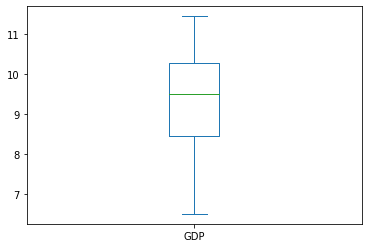

In [9]:
# GDP
data["GDP"].plot(kind="box")

In [10]:
mean = data.GDP.mean()
data.GDP.fillna(mean, inplace=True)

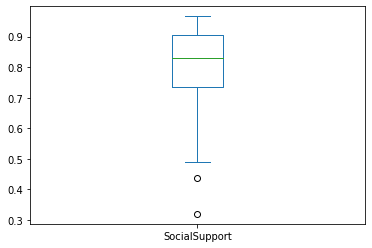

In [11]:
# SocialSupport

data.SocialSupport.plot(kind="box")

In [12]:
q1=data.SocialSupport.quantile(q=0.25)
q3=data.SocialSupport.quantile(q=0.75)
IQR=q3-q1
borne_inf=q1-1.5*IQR
borne_inf

0.47584056109190004

In [13]:
outliers=(data["SocialSupport"]<0.47584056109190004).sum()
outliers

2

In [14]:
outliers/data.shape[0]*100

1.3605442176870748

In [15]:
mean = data.SocialSupport.mean()
data.SocialSupport.fillna(mean, inplace=True)

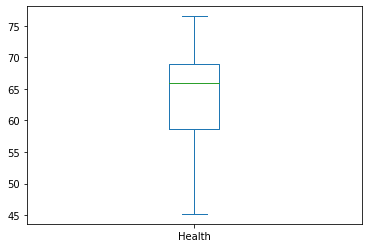

In [16]:
# Health

data.Health.plot(kind="box")

In [17]:
mean = data.Health.mean()
data.Health.fillna(mean, inplace=True)

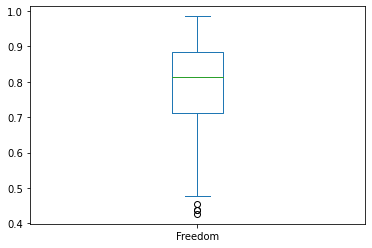

In [18]:
# Freedom

data.Freedom.plot(kind="box")

In [19]:
q1=data.Freedom.quantile(q=0.25)
q3=data.Freedom.quantile(q=0.75)
IQR=q3-q1
borne_inf=q1-1.5*IQR
borne_inf

0.45645381510257704

In [20]:
outliers=(data["Freedom"]<0.45645381510257704).sum()
outliers

4

In [21]:
outliers/data.shape[0]*100

2.7210884353741496

In [22]:
mean = data.Freedom.mean()
data.Freedom.fillna(mean, inplace=True)

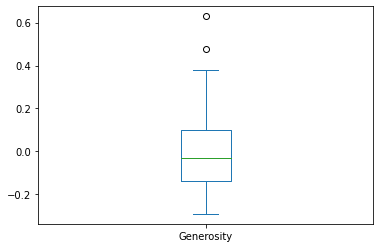

In [23]:
# Generosity

data.Generosity.plot(kind="box")

In [24]:
q1=data.Generosity.quantile(q=0.25)
q3=data.Generosity.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

0.4598228428512814

In [25]:
outliers=(data["Generosity"]> 0.4598228428512814).sum()
outliers

2

In [26]:
outliers/data.shape[0]*100

1.3605442176870748

In [27]:
mean = data.Generosity.mean()
data.Generosity.fillna(mean, inplace=True)

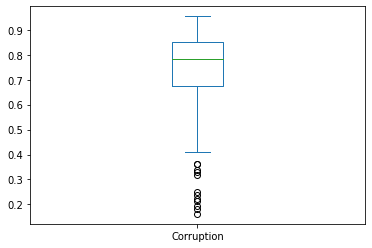

In [28]:
# Corruption

data.Corruption.plot(kind="box")

In [29]:
q1=data.Corruption.quantile(q=0.25)
q3=data.Corruption.quantile(q=0.75)
IQR=q3-q1
borne_inf=q1-1.5*IQR
borne_inf

0.40445975959301117

In [30]:
outliers=(data["Corruption"]<0.40445975959301117).sum()
outliers

12

In [31]:
outliers/data.shape[0]*100

8.16326530612245

In [32]:
median = data.Corruption.median()
data.Corruption.fillna(median, inplace=True)

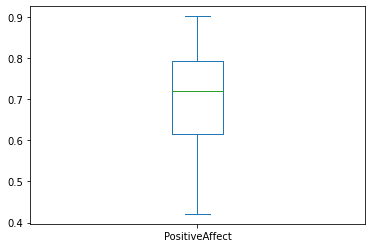

In [33]:
# PositiveAffect

data.PositiveAffect.plot(kind="box")

In [34]:
mean = data.PositiveAffect.mean()
data.PositiveAffect.fillna(mean, inplace=True)

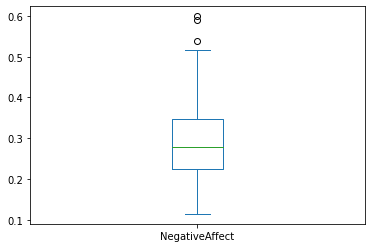

In [35]:
# NegativeAffect

data.NegativeAffect.plot(kind="box")

In [36]:
q1=data.NegativeAffect.quantile(q=0.25)
q3=data.NegativeAffect.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

0.5341249406337736

In [37]:
outliers=(data["NegativeAffect"]<0.5341249406337736).sum()
outliers

143

In [38]:
outliers/data.shape[0]*100

97.27891156462584

In [39]:
median = data.NegativeAffect.median()
data.NegativeAffect.fillna(median, inplace=True)

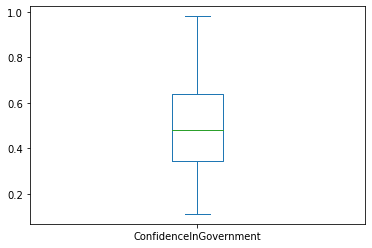

In [40]:
# ConfidenceInGovernment

data.ConfidenceInGovernment.plot(kind="box")

In [41]:
mean = data.ConfidenceInGovernment.mean()
data.ConfidenceInGovernment.fillna(mean, inplace=True)

In [42]:
data.isna().sum()

Country                   0
Happiness                 0
GDP                       0
SocialSupport             0
Health                    0
Freedom                   0
Generosity                0
Corruption                0
PositiveAffect            0
NegativeAffect            0
ConfidenceInGovernment    0
Region                    0
dtype: int64

In [43]:
# Valeurs dupliquées:

data.duplicated().sum()

0

In [44]:
# ANALYSE UNIVARIEE

In [45]:
# Variables qualitatives:

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 147 non-null    object 
 1   Happiness               147 non-null    float64
 2   GDP                     147 non-null    float64
 3   SocialSupport           147 non-null    float64
 4   Health                  147 non-null    float64
 5   Freedom                 147 non-null    float64
 6   Generosity              147 non-null    float64
 7   Corruption              147 non-null    float64
 8   PositiveAffect          147 non-null    float64
 9   NegativeAffect          147 non-null    float64
 10  ConfidenceInGovernment  147 non-null    float64
 11  Region                  147 non-null    object 
dtypes: float64(10), object(2)
memory usage: 13.9+ KB


In [47]:
# Country

data.Country

0      Afghanistan
1          Albania
2          Algeria
3        Argentina
4          Armenia
          ...     
142      Venezuela
143        Vietnam
144          Yemen
145         Zambia
146       Zimbabwe
Name: Country, Length: 147, dtype: object

In [48]:
# Proportion
data.Country.value_counts()

Afghanistan    1
Russia         1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Guinea         1
Haiti          1
Honduras       1
Hong Kong      1
Zimbabwe       1
Name: Country, Length: 147, dtype: int64

In [49]:
# Taux:
data.Country.value_counts()/len(data.Country)*100
# Le taux est identique

Afghanistan    0.680272
Russia         0.680272
Nepal          0.680272
Netherlands    0.680272
New Zealand    0.680272
                 ...   
Guinea         0.680272
Haiti          0.680272
Honduras       0.680272
Hong Kong      0.680272
Zimbabwe       0.680272
Name: Country, Length: 147, dtype: float64

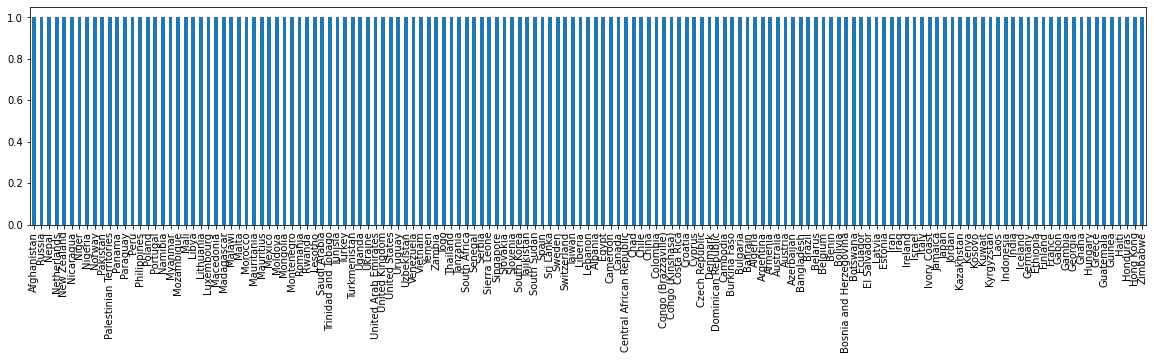

In [50]:
data.Country.value_counts().plot(kind="bar", figsize=(20,4))
# La proportion est la même pour tous les pays

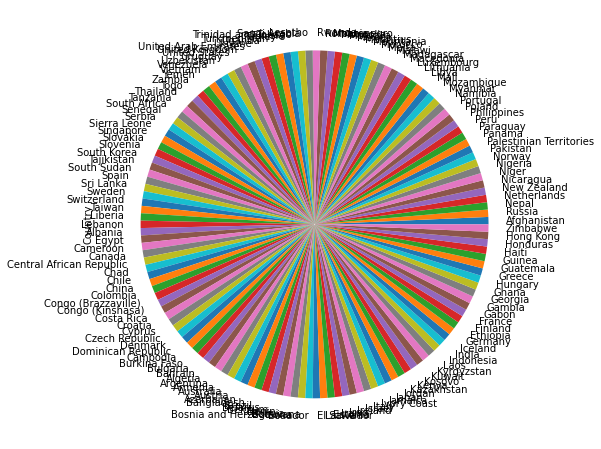

In [51]:
data.Country.value_counts().plot(kind="pie", figsize=(8,8))
# La proportion est la même pour tous les pays

In [52]:
# Region:

# Calcul de proportion:
data.Region.value_counts()  
# L'Afrique sub Saharrienne regroupe le plus de pays.
# L'Australie et Nouvelle Zéaland puis L'Amérique du Nord regroupent le moins de pays. 

Sub-Saharan Africa                 35
Central and Eastern Europe         29
Latin America and Caribbean        21
Western Europe                     20
Middle East and Northern Africa    18
Southeastern Asia                   8
Southern Asia                       6
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [53]:
# Calcul du taux
data.Region.value_counts()/len(data.Region)*100
# Le taux du nombre de pays par région est plus élevée pour l'Afrique sub Saharienne
# Le taux du nombre de pays par région est moins élevée pour l'Amérique du Nord

Sub-Saharan Africa                 23.809524
Central and Eastern Europe         19.727891
Latin America and Caribbean        14.285714
Western Europe                     13.605442
Middle East and Northern Africa    12.244898
Southeastern Asia                   5.442177
Southern Asia                       4.081633
Eastern Asia                        4.081633
Australia and New Zealand           1.360544
North America                       1.360544
Name: Region, dtype: float64

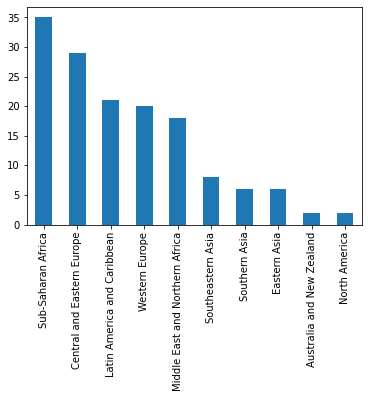

In [54]:
data.Region.value_counts().plot(kind="bar")

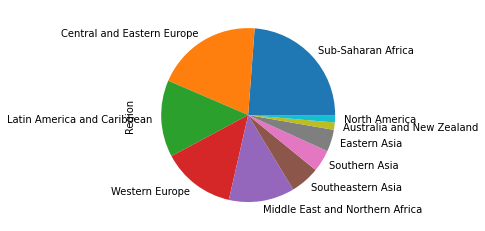

In [55]:
data.Region.value_counts().plot(kind="pie")

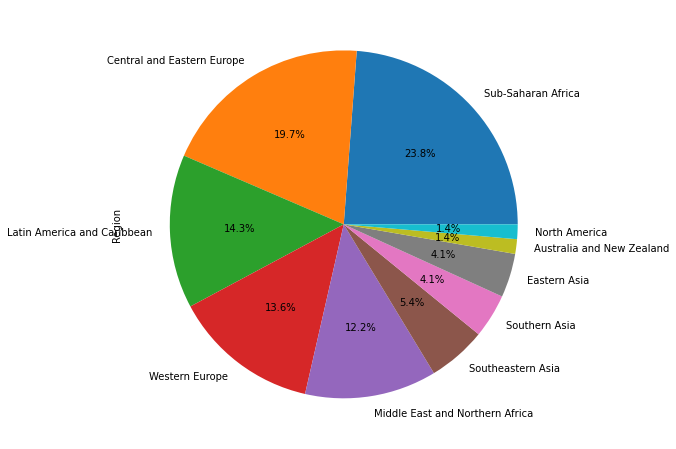

In [56]:
fig, ax = plt.subplots(figsize=(8,8))

data.Region.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [57]:
# Analyse variables quantitatives 

In [58]:
# Happiness

In [59]:
data.Happiness.describe()
# Il y a 147 valeurs, sa moyenne est de 5,46, son écart type 1,14, la valeur minimale est de 2,66, 25% des 
# valeurs sont inférieures ou égales à 4,62, 50 % des valeurs sont inférieures ou égales à 5,52, 75% des
# valeurs sont inférieures ou égales à 6,25, la valeur maximale est de 7,79.

count    147.000000
mean       5.460421
std        1.140840
min        2.661718
25%        4.619407
50%        5.552915
75%        6.251557
max        7.788252
Name: Happiness, dtype: float64

In [60]:
data.Happiness.median()
# La mediane est de 5,55.

5.55291509628296

In [61]:
data.Happiness.var()
# La variance est de 1,3

1.301515261763912

In [62]:
taux_de_dispersion=data.Happiness.std()/data.Happiness.mean()*100     
taux_de_dispersion
# Les valeurs de Happiness sont peu dispersées à 20,89%.

20.892887544792654

In [63]:
# Test de shapiro:
scipy.stats.shapiro(data.Happiness) 
# La P-value de 0,16 est > à 5% donc Happiness suit la loi normale.

(0.9863117337226868, 0.1550862193107605)

In [64]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Happiness,"norm")
#  La P-value de 0 est inférieure à 5% donc Happiness ne suit pas la loi normale.

KstestResult(statistic=0.9961128524825755, pvalue=0.0)

In [65]:
data.Happiness.skew()
# La courbe Happiness est symétrique 

-0.06841285858923751

In [66]:
data.Happiness.kurtosis()
# La courbe Happiness est platykurtic

-0.5932429484866493

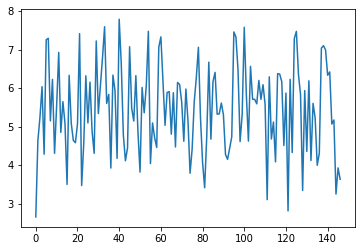

In [67]:
data.Happiness.plot()

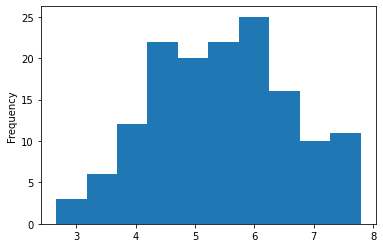

In [68]:
data.Happiness.plot(kind="hist")
# Le plus de valeurs de Happiness se situent à 6 et le moins à 3.

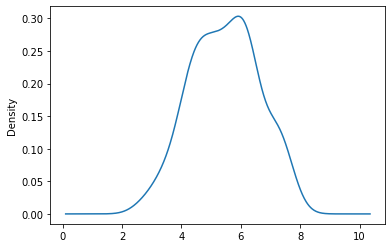

In [69]:
data.Happiness.plot(kind="density")

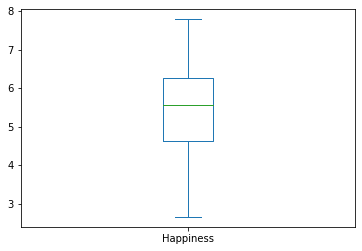

In [70]:
data.Happiness.plot(kind="box")
# Aucune valeur aberrante.

In [71]:
# GDP

data.GDP

0      7.497755
1      9.376145
2      9.540639
3      9.848709
4      9.081095
         ...   
142    9.439296
143    8.727759
144    9.298247
145    8.213179
146    7.549491
Name: GDP, Length: 147, dtype: float64

In [72]:
data.GDP.describe()
# Il y a 147 valeurs, sa moyenne est de 9,3, son écart type 1,18, la valeur minimale est de 6,49, 25% des 
# valeurs sont inférieures ou égales à 8,51, 50 % des valeurs sont inférieures ou égales à 9,49, 75% des
# valeurs sont inférieures ou égales à 10,25, la valeur maximale est de 11,45.

count    147.000000
mean       9.298247
std        1.183427
min        6.494117
25%        8.508650
50%        9.439296
75%       10.252275
max       11.454002
Name: GDP, dtype: float64

In [73]:
data.GDP.var() # La variance est de 1,40

1.400499334257441

In [74]:
data.GDP.median() # La médiane est de 9,49

9.43929576873779

In [75]:
taux_de_dispersion=data.GDP.std()/data.GDP.mean()*100     
taux_de_dispersion
# Les valeurs sont peu dispersées à 12,7% 

12.727419808749202

In [76]:
# Test de shapiro:
scipy.stats.shapiro(data.GDP) 
# La P-value de 0,07% < à 5% donc Happiness ne suit pas la loi normale.

(0.96430903673172, 0.0007232354837469757)

In [77]:
#Test de Kolmogorov:
scipy.stats.kstest(data.GDP,"norm")
#  La P-value de 0 est inférieure à 5% donc Happiness ne suit pas la loi normale.

KstestResult(statistic=0.9999999999582391, pvalue=0.0)

In [78]:
data.GDP.skew()
# La courbe Happiness est symétrique 

-0.43182798377752646

In [79]:
data.GDP.kurtosis()
# La courbe GDP est platykurtic

-0.6822046844061918

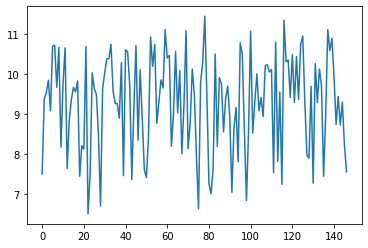

In [80]:
data.GDP.plot()

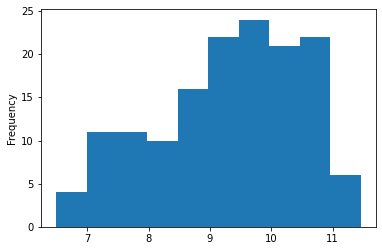

In [81]:
data.GDP.plot(kind="hist")
# Le plus de valeurs de GDP se situent entre 0 et 10 et le moins entre 6 et 7.

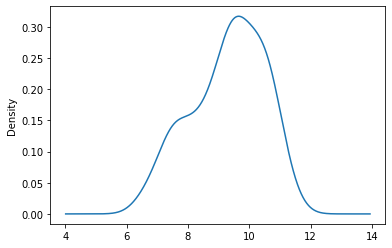

In [82]:
data.GDP.plot(kind="density")

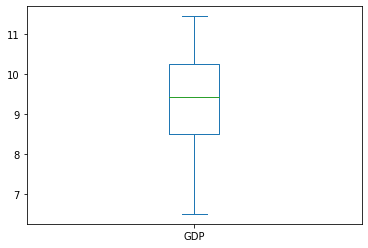

In [83]:
data.GDP.plot(kind="box")
# Absence d'outliers.

In [84]:
# SocialSupport

data.SocialSupport

0      0.490880
1      0.637698
2      0.806754
3      0.906699
4      0.697925
         ...   
142    0.895879
143    0.805164
144    0.789555
145    0.743754
146    0.754147
Name: SocialSupport, Length: 147, dtype: float64

In [85]:
data.SocialSupport.describe()
# Il y a 147 valeurs, sa moyenne est de 0,8, son écart type 0,12, la valeur minimale est de O,32, 25% des 
# valeurs sont inférieures ou égales à 0,73, 50 % des valeurs sont inférieures ou égales à 0,83, 75% des
# valeurs sont inférieures ou égales à 0,91, la valeur maximale est de 0,97.

count    147.000000
mean       0.805164
std        0.121767
min        0.319589
25%        0.733504
50%        0.828339
75%        0.905065
max        0.966753
Name: SocialSupport, dtype: float64

In [86]:
data.SocialSupport.median()
# La mediane est de 0,83.

0.828339040279388

In [87]:
data.SocialSupport.var()
# La variance est de 0,01.

0.014827097639823724

In [88]:
taux_de_dispersion=data.SocialSupport.std()/data.SocialSupport.mean()*100     
taux_de_dispersion
# Les valeurs de SocialSupport sont peu dispersées à 15,12%.

15.123194008238864

In [89]:
# Test de shapiro:
scipy.stats.shapiro(data.SocialSupport) 
# La P-value de 9,23e-08 < à 5% donc SocialSupport ne suit pas la loi normale.

(0.9125761389732361, 9.237829345920545e-08)

In [90]:
#Test de Kolmogorov:
scipy.stats.kstest(data.SocialSupport,"norm")
#  La P-value de 3,76e-67 est inférieure à 5% donc SocialSupport ne suit pas la loi normale.

KstestResult(statistic=0.6766836178013719, pvalue=3.745966704181795e-67)

In [91]:
data.SocialSupport.skew()
# La courbe est asymétrique vers la gauche

-1.092654237715274

In [92]:
data.SocialSupport.kurtosis()
# La courbe est platykurtic

1.2562000848380674

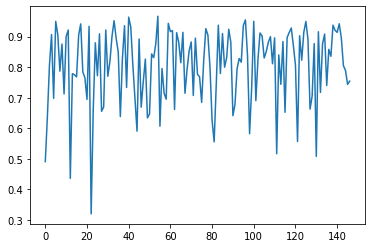

In [93]:
data.SocialSupport.plot()

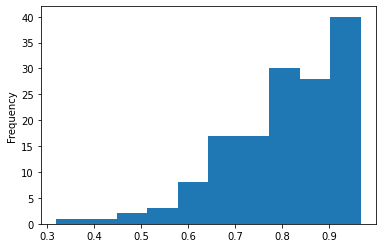

In [94]:
data.SocialSupport.plot(kind="hist")
# Le plus de valeurs de GDP se situent entre 0,9 et 1 et le moins entre 0,3 et 0,4.

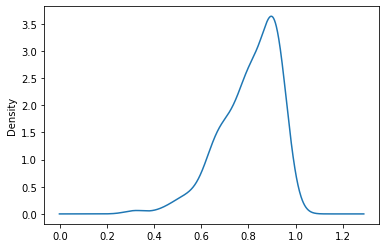

In [95]:
data.SocialSupport.plot(kind="density")

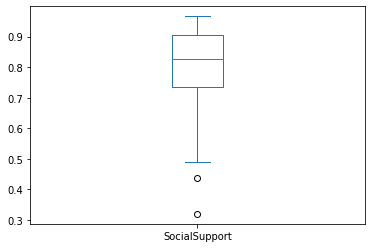

In [96]:
data.SocialSupport.plot(kind="box")
# Présence d'outliers en partie inférieure

In [97]:
# Health

data.Health

0      52.799999
1      68.400002
2      65.699997
3      68.599998
4      66.599998
         ...    
142    66.300003
143    67.699997
144    55.900002
145    54.799999
146    55.000000
Name: Health, Length: 147, dtype: float64

In [98]:
data.Health.describe()
# Il y a 147 valeurs, sa moyenne est de 64,19, son écart type 7,06, la valeur minimale est de 45,2, 25% des 
# valeurs sont inférieures ou égales à 58,95, 50 % des valeurs sont inférieures ou égales à 65,8, 75 % des
# valeurs sont inférieures ou égales à 68,75, la valeur maximale est de 76,5.

count    147.000000
mean      64.190942
std        7.060463
min       45.200001
25%       58.950001
50%       65.800003
75%       68.750000
max       76.500000
Name: Health, dtype: float64

In [99]:
data.Health.median()
# La mediane est de 65,8.

65.8000030517578

In [100]:
data.Health.var()
# La variance est de 49,85

49.850141106698

In [101]:
taux_de_dispersion=data.Health.std()/data.Health.mean()*100     
taux_de_dispersion
# Les valeurs de Health sont peu dispersées à 11%.

10.999158127535834

In [102]:
# Test de shapiro:
scipy.stats.shapiro(data.Health) 
# La P-value de 7,53e-05 est inférieure à 5% donc Health ne suit pas la loi normale.

(0.9533849358558655, 7.534302858402953e-05)

In [103]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Health,"norm")
#  La P-value de 0 est inférieure à 5% donc Health ne suit pas la loi normale.

KstestResult(statistic=1.0, pvalue=0.0)

In [104]:
data.Health.skew()
# Health est asymétrique vers la gauche

-0.579087876373356

In [105]:
data.Health.kurtosis()
# -0,42 < 3 donc la courbe de Health est platyKurtic.

-0.4196999175114948

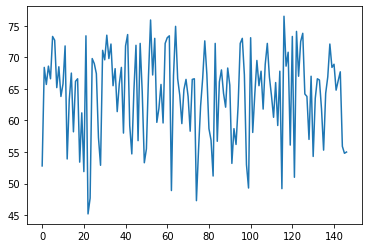

In [106]:
data.Health.plot()

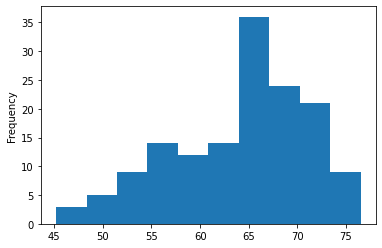

In [107]:
data.Health.plot(kind="hist")
# Il y a moins de valeurs de Health entre 45 et 48 et beaucoup de valeurs sont comprises entre 65 et 67.

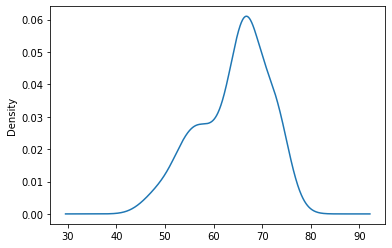

In [108]:
data.Health.plot(kind="density")

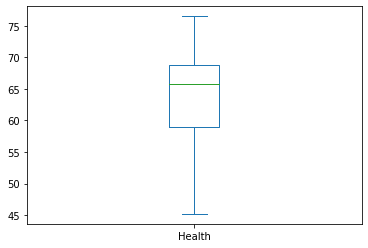

In [109]:
data.Health.plot(kind="box")
# Absence de valeurs aberrantes

In [110]:
# Freedom

data.Freedom

0      0.427011
1      0.749611
2      0.436670
3      0.831966
4      0.613697
         ...   
142    0.635505
143    0.780577
144    0.595191
145    0.823169
146    0.752826
Name: Freedom, Length: 147, dtype: float64

In [111]:
data.Freedom.describe()
# Il y a 147 valeurs, sa moyenne est de 0,78, son écart type 0,13, la valeur minimale est de 0,43, 25% des 
# valeurs sont inférieures ou égales à 0,71, 50 % des valeurs sont inférieures ou égales à 0,81, 75 % des
# valeurs sont inférieures ou égales à 0,88, la valeur maximale est de 0,99.

count    147.000000
mean       0.780577
std        0.126905
min        0.427011
25%        0.713441
50%        0.812326
75%        0.884043
max        0.985178
Name: Freedom, dtype: float64

In [112]:
data.Freedom.median()
# La mediane est de 0,81.

0.812325835227966

In [113]:
data.Freedom.var()
# La variance est de 0,02.

0.01610488657018384

In [114]:
taux_de_dispersion=data.Freedom.std()/data.Freedom.mean()*100     
taux_de_dispersion
# Les valeurs de Freedom sont peu dispersées à 16,26%.

16.257847383377175

In [115]:
# Test de shapiro:
scipy.stats.shapiro(data.Freedom) 
# La P-value de 1,6e-05 < à 5% donc Freedom ne suit pas la loi normale.

(0.9451543688774109, 1.604058161319699e-05)

In [116]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Freedom,"norm")
#  La P-value de 1,4e-64 est inférieure à 5% donc Freedom ne suit pas la loi normale.

KstestResult(statistic=0.6653142926183837, pvalue=1.4491452309865034e-64)

In [117]:
data.Freedom.skew()
# Freedom est asymétrique vers la gauche

-0.7766677212218477

In [118]:
data.Freedom.kurtosis()
# Freedom est platykurtic

0.09404998566869383

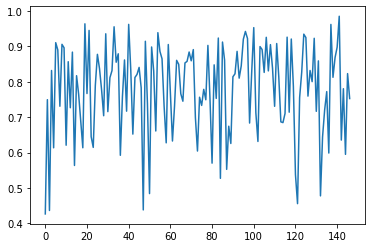

In [119]:
data.Freedom.plot()

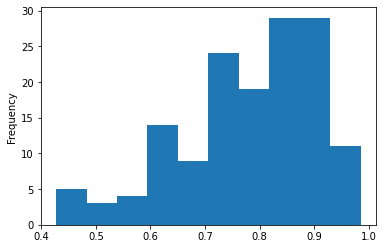

In [120]:
data.Freedom.plot(kind="hist")
# Il y a moins de valeurs de Freedom à 0,5 et beaucoup de valeurs sont comprises entre 0,8 et 0,9.

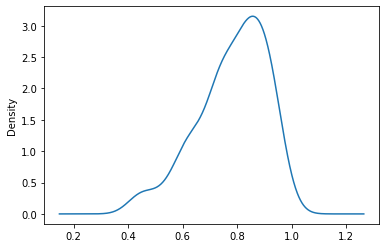

In [121]:
data.Freedom.plot(kind="density")

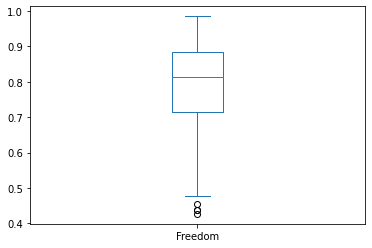

In [122]:
data.Freedom.plot(kind="box")
# Présence d'outliers en partie inférieure

In [123]:
# Generosity

data.Generosity

0     -0.112198
1     -0.032643
2     -0.191522
3     -0.182600
4     -0.133958
         ...   
142   -0.206035
143   -0.007056
144   -0.007056
145    0.128904
146   -0.069670
Name: Generosity, Length: 147, dtype: float64

In [124]:
data.Generosity.describe()
# Il y a 147 valeurs, sa moyenne est de -0,007, son écart type 0,16, la valeur minimale est de -0,29, 25% des 
# valeurs sont inférieures ou égales à -0,13, 50 % des valeurs sont inférieures ou égales à -O,03, 75 % des
# valeurs sont inférieures ou égales à 0,09, la valeur maximale est de 0,63.

count    147.000000
mean      -0.007056
std        0.155640
min       -0.291227
25%       -0.134812
50%       -0.027940
75%        0.093126
max        0.629577
Name: Generosity, dtype: float64

In [125]:
data.Generosity.median()
# La mediane est de -0,03.

-0.027939947322011

In [126]:
data.Generosity.var()
# La variance est de 0,02.

0.02422371150777321

In [127]:
taux_de_dispersion=data.Generosity.std()/data.Generosity.mean()*100     
taux_de_dispersion
# Les valeurs de Freedom sont très dispersées à -2205,7 %.

-2205.7096205744715

In [128]:
# Test de shapiro:
scipy.stats.shapiro(data.Generosity) 
# La P-value de 0,0002 < à 5% donc Generosity ne suit pas la loi normale.

(0.9590048789978027, 0.0002335084427613765)

In [129]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Generosity,"norm")
#  La P-value de 5,49e-21 est inférieure à 5% donc Generosity ne suit pas la loi normale.

KstestResult(statistic=0.3931408059192682, pvalue=5.486340354155886e-21)

In [130]:
data.Generosity.skew()
# La courbe Generosity est asymétrique vers la droite

0.8097301089398664

In [131]:
data.Generosity.kurtosis()
# La courbe Generosity est platykurtic

1.2595429057587482

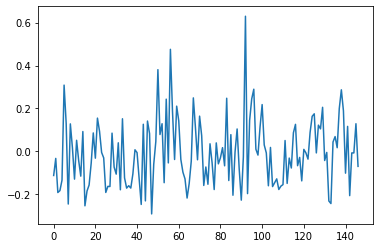

In [132]:
data.Generosity.plot()

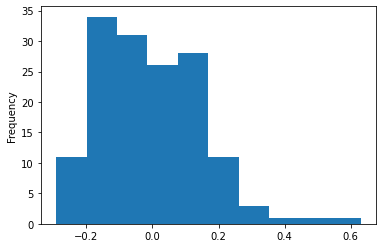

In [133]:
data.Generosity.plot(kind="hist")
# Il y a moins de valeurs de Generosity entre 0,28 et 0,62 et beaucoup de valeurs sont comprises entre -0,2 et -0,12.

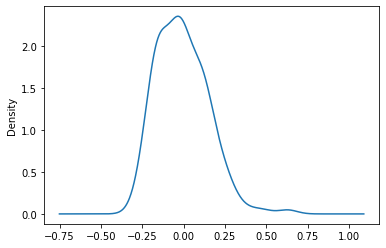

In [134]:
data.Generosity.plot(kind="density")

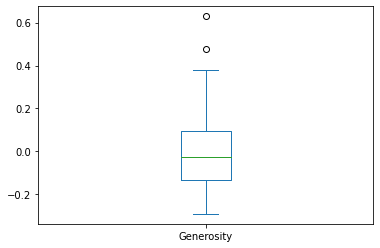

In [135]:
data.Generosity.plot(kind="box")
# Présence de valeurs aberrantes en partie supérieure.

In [136]:
# Corruption

data.Corruption

0      0.954393
1      0.876135
2      0.699774
3      0.841052
4      0.864683
         ...   
142    0.843969
143    0.782116
144    0.782116
145    0.739541
146    0.751208
Name: Corruption, Length: 147, dtype: float64

In [137]:
data.Corruption.describe()
# Il y a 147 valeurs, sa moyenne est de 0,73, son écart type 0,18, la valeur minimale est de 0,16, 25% des 
# valeurs sont inférieures ou égales à 0,69, 50 % des valeurs sont inférieures ou égales à 0,78, 75 % des
# valeurs sont inférieures ou égales à 0,85, la valeur maximale est de 0,95.

count    147.000000
mean       0.733157
std        0.177733
min        0.161791
25%        0.686302
50%        0.782116
75%        0.849544
max        0.954393
Name: Corruption, dtype: float64

In [138]:
data.Corruption.median()
# La médiane est de 0,78

0.782116115093231

In [139]:
data.Corruption.var()
# La variance est de 0,03 

0.03158897325974741

In [140]:
taux_de_dispersion=data.Corruption.std()/data.Corruption.mean()*100     
taux_de_dispersion
# Les valeurs de Corruption sont peu dispersées à 24,24 %.

24.242125549553876

In [141]:
# Test de shapiro:
scipy.stats.shapiro(data.Corruption) 
# La P-value de 1,51e-12 < à 5% donc Corruption ne suit pas la loi normale.

(0.8095976114273071, 1.50989594091544e-12)

In [142]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Corruption,"norm")
#  La P-value de 1,03e-48 est inférieure à 5% donc Corruption ne suit pas la loi normale.

KstestResult(statistic=0.586957079200268, pvalue=1.0260110099043254e-48)

In [143]:
data.Corruption.skew()
# La courbe Corruption est asymétrique vers la gauche

-1.6536850630573579

In [144]:
data.Corruption.kurtosis()
# La courbe Corruption est platykurtic

2.2140828916898854

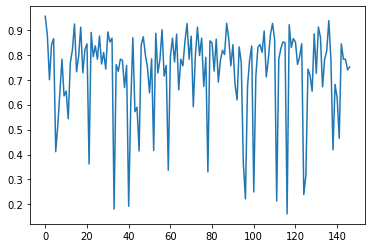

In [145]:
data.Corruption.plot()

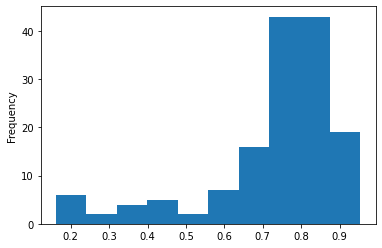

In [146]:
data.Corruption.plot(kind="hist")
# Il y a moins de valeurs de Corruption entre 0,23 et 0,32 puis 0,48 et 0,56 et beaucoup de valeurs sont comprises entre 0,72 et 0,86.

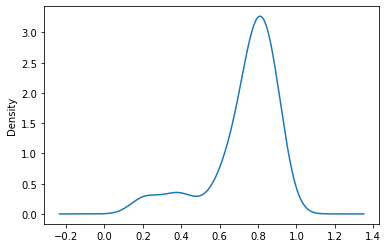

In [147]:
data.Corruption.plot(kind="density")

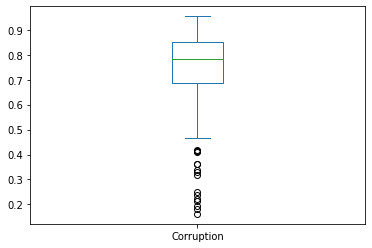

In [148]:
data.Corruption.plot(kind="box")
# Présence d'outliers en partie inférieure

In [149]:
# PositiveAffect

data.PositiveAffect

0      0.496349
1      0.669241
2      0.641980
3      0.809423
4      0.625014
         ...   
142    0.725643
143    0.704992
144    0.455182
145    0.684623
146    0.806428
Name: PositiveAffect, Length: 147, dtype: float64

In [150]:
data.PositiveAffect.describe()
# Il y a 147 valeurs, sa moyenne est de 0,7, son écart type 0,11, la valeur minimale est de 0,42, 25% des 
# valeurs sont inférieures ou égales à 0,61, 50 % des valeurs sont inférieures ou égales à 0,72, 75 % des
# valeurs sont inférieures ou égales à 0,79, la valeur maximale est de 0,9.

count    147.000000
mean       0.704992
std        0.108126
min        0.420962
25%        0.614916
50%        0.720678
75%        0.792171
max        0.902772
Name: PositiveAffect, dtype: float64

In [151]:
data.PositiveAffect.median()
# La mediane est de 0,72

0.720678210258484

In [152]:
data.PositiveAffect.var()
# La variance est de 0,01

0.011691126242218205

In [153]:
taux_de_dispersion=data.PositiveAffect.std()/data.PositiveAffect.mean()*100     
taux_de_dispersion
# Les valeurs de PositiveAffect sont peu dispersées à 15,34 %.

15.33711524168061

In [154]:
# Test de shapiro:
scipy.stats.shapiro(data.PositiveAffect) 
# La P-value de 0.003 < à 5% donc PositiveAffect ne suit pas la loi normale.

(0.9702593684196472, 0.0027841050177812576)

In [155]:
#Test de Kolmogorov:
scipy.stats.kstest(data.PositiveAffect,"norm")
#  La P-value de 1,44e-65 est inférieure à 5% donc PositiveAffect ne suit pas la loi normale.

KstestResult(statistic=0.6697675811644214, pvalue=1.4361585327358193e-65)

In [156]:
data.PositiveAffect.skew()
# La courbe PositiveAffect est symétrique

-0.3387130670873005

In [157]:
data.PositiveAffect.kurtosis()
# La courbe PositiveAffect est platykurtic

-0.692577521887559

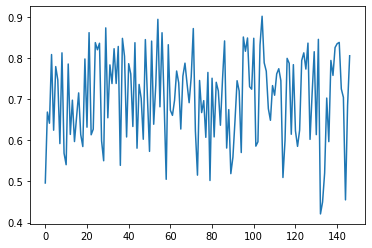

In [158]:
data.PositiveAffect.plot()

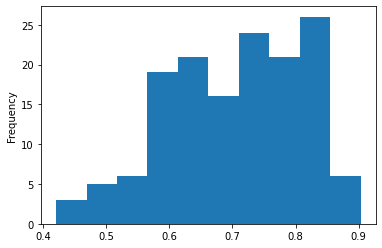

In [159]:
data.PositiveAffect.plot(kind="hist")
# Il y a moins de valeurs de PositiveAffect entre 0,42 et 0,47 et beaucoup de valeurs sont comprises entre 0,8 et 0,85.

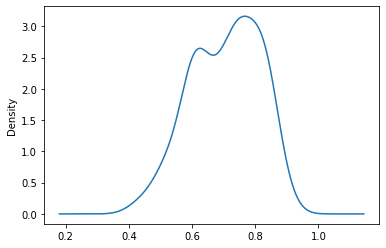

In [160]:
data.PositiveAffect.plot(kind="density")

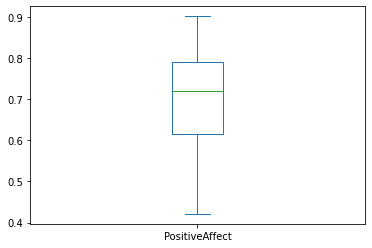

In [161]:
data.PositiveAffect.plot(kind="box")
# Absence d'outliers

In [162]:
# NegativeAffect

data.NegativeAffect

0      0.371326
1      0.333884
2      0.288710
3      0.291717
4      0.437149
         ...   
142    0.362985
143    0.279024
144    0.295064
145    0.387189
146    0.224051
Name: NegativeAffect, Length: 147, dtype: float64

In [163]:
data.NegativeAffect.describe()
# Il y a 147 valeurs, sa moyenne est de 0,29, son écart type 0,09, la valeur minimale est de 0,11, 25% des 
# valeurs sont inférieures ou égales à 0,22, 50 % des valeurs sont inférieures ou égales à 0,28, 75 % des
# valeurs sont inférieures ou égales à 0,35, la valeur maximale est de 0,6.

count    147.000000
mean       0.291148
std        0.090305
min        0.114123
25%        0.224706
50%        0.279024
75%        0.346927
max        0.599335
Name: NegativeAffect, dtype: float64

In [164]:
data.NegativeAffect.median()
# La médiane est de 0,28

0.2790243476629255

In [165]:
data.NegativeAffect.var()
# La variance est de 0,008

0.008155060309407956

In [166]:
taux_de_dispersion=data.NegativeAffect.std()/data.NegativeAffect.mean()*100     
taux_de_dispersion
# Les valeurs de NegativeAffect sont peu dispersées à 31,01 %.

31.017024318709048

In [167]:
# Test de shapiro:
scipy.stats.shapiro(data.NegativeAffect) 
# La P-value de 0.0001 < à 5% donc NegativeAffect ne suit pas la loi normale.

(0.9548596739768982, 0.00010074807505588979)

In [168]:
#Test de Kolmogorov:
scipy.stats.kstest(data.NegativeAffect,"norm")
#  La P-value de 1,24e-42 est inférieure à 5% donc NegativeAffect ne suit pas la loi normale.

KstestResult(statistic=0.5520890337204378, pvalue=1.2372908243821314e-42)

In [169]:
data.NegativeAffect.skew()
# La courbe NegativeAffect est asymétrique vers la droite

0.8341542381238993

In [170]:
data.NegativeAffect.kurtosis()
# La courbe NegativeAffect est platykurtic

0.8189979125722777

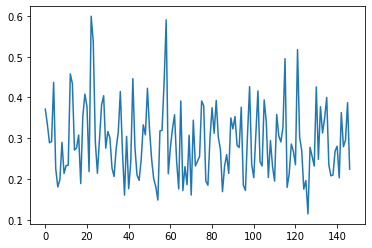

In [171]:
data.NegativeAffect.plot()

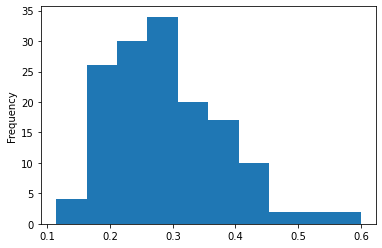

In [172]:
data.NegativeAffect.plot(kind="hist")
# Il y a moins de valeurs de NegativeAffect entre 0,45 et 0,6 et beaucoup de valeurs sont comprises entre 0,27 et 0,3.

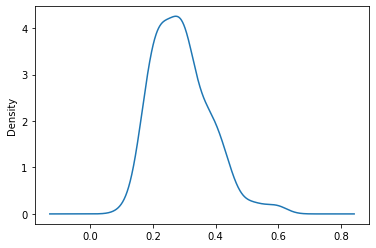

In [173]:
data.NegativeAffect.plot(kind="density")

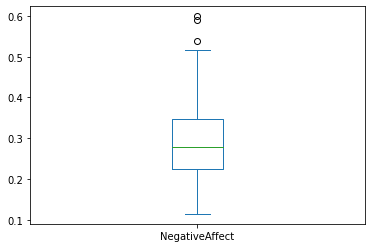

In [174]:
data.NegativeAffect.plot(kind="box")
# Présence de valeur aberrantes en partie supérieure

In [175]:
# ConfidenceInGovernment

data.ConfidenceInGovernment

0      0.261179
1      0.457738
2      0.502155
3      0.305430
4      0.246901
         ...   
142    0.241124
143    0.502155
144    0.247787
145    0.717004
146    0.682647
Name: ConfidenceInGovernment, Length: 147, dtype: float64

In [176]:
data.ConfidenceInGovernment.describe()
# Il y a 147 valeurs, sa moyenne est de 0,5, son écart type 0,19, la valeur minimale est de 0,11, 25% des 
# valeurs sont inférieures ou égales à 0,36, 50 % des valeurs sont inférieures ou égales à 0,5, 75 % des
# valeurs sont inférieures ou égales à 0,62, la valeur maximale est de 0,98.

count    147.000000
mean       0.502155
std        0.194681
min        0.110937
25%        0.355066
50%        0.502155
75%        0.617711
max        0.981398
Name: ConfidenceInGovernment, dtype: float64

In [177]:
data.ConfidenceInGovernment.median()
# La médiane est de 0,5

0.5021553373714881

In [178]:
data.ConfidenceInGovernment.var()
# La variance est de 0,04

0.03790077559024547

In [179]:
taux_de_dispersion=data.ConfidenceInGovernment.std()/data.ConfidenceInGovernment.mean()*100     
taux_de_dispersion
# Les valeurs de ConfidenceInGovernment sont peu dispersées à 38,77 %.

38.769121984826896

In [180]:
# Test de shapiro:
scipy.stats.shapiro(data.ConfidenceInGovernment) 
# La P-value de 0.06 > à 5% donc ConfidenceInGovernment suit la loi normale.

(0.9828478097915649, 0.06353763490915298)

In [181]:
#Test de Kolmogorov:
scipy.stats.kstest(data.ConfidenceInGovernment,"norm")
#  La P-value de 3,28e-42 est inférieure à 5% donc ConfidenceInGovernment ne suit pas la loi normale.

KstestResult(statistic=0.5495430187353462, pvalue=3.277667624782643e-42)

In [182]:
data.ConfidenceInGovernment.skew()
# La courbe ConfidenceInGovernment est symétrique 

0.28897920011420075

In [183]:
data.ConfidenceInGovernment.kurtosis()
# La courbe ConfidenceInGovernment est platykurtic

-0.41907139285876127

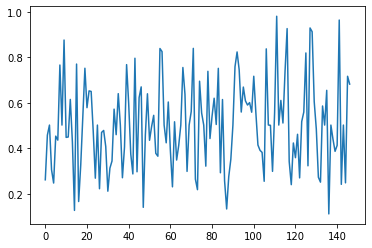

In [184]:
data.ConfidenceInGovernment.plot()

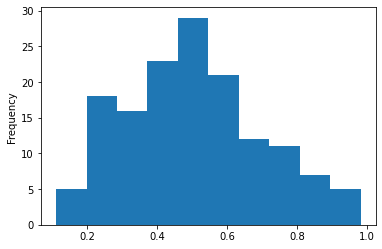

In [185]:
data.ConfidenceInGovernment.plot(kind="hist")
# Il y a moins de valeurs de ConfidenceInGovernment entre 0,08 et 0,2 et beaucoup de valeurs sont comprises entre 0,45 et 0,55.

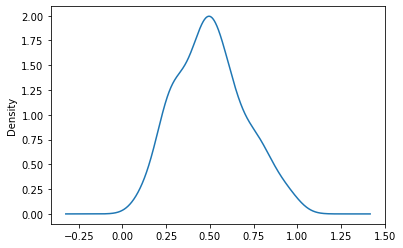

In [186]:
data.ConfidenceInGovernment.plot(kind="density")

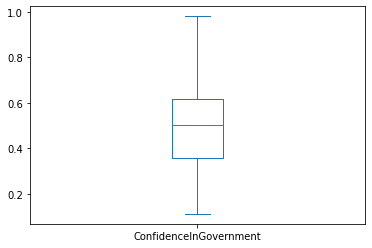

In [187]:
data.ConfidenceInGovernment.plot(kind="box")
# Absence d'outliers

In [188]:
# ANALYSE MULTIVARIEE

In [189]:
# Associations entre variables catégorielles

In [190]:
# Region et Country

In [191]:
t=pd.crosstab(data.Region,data.Country)

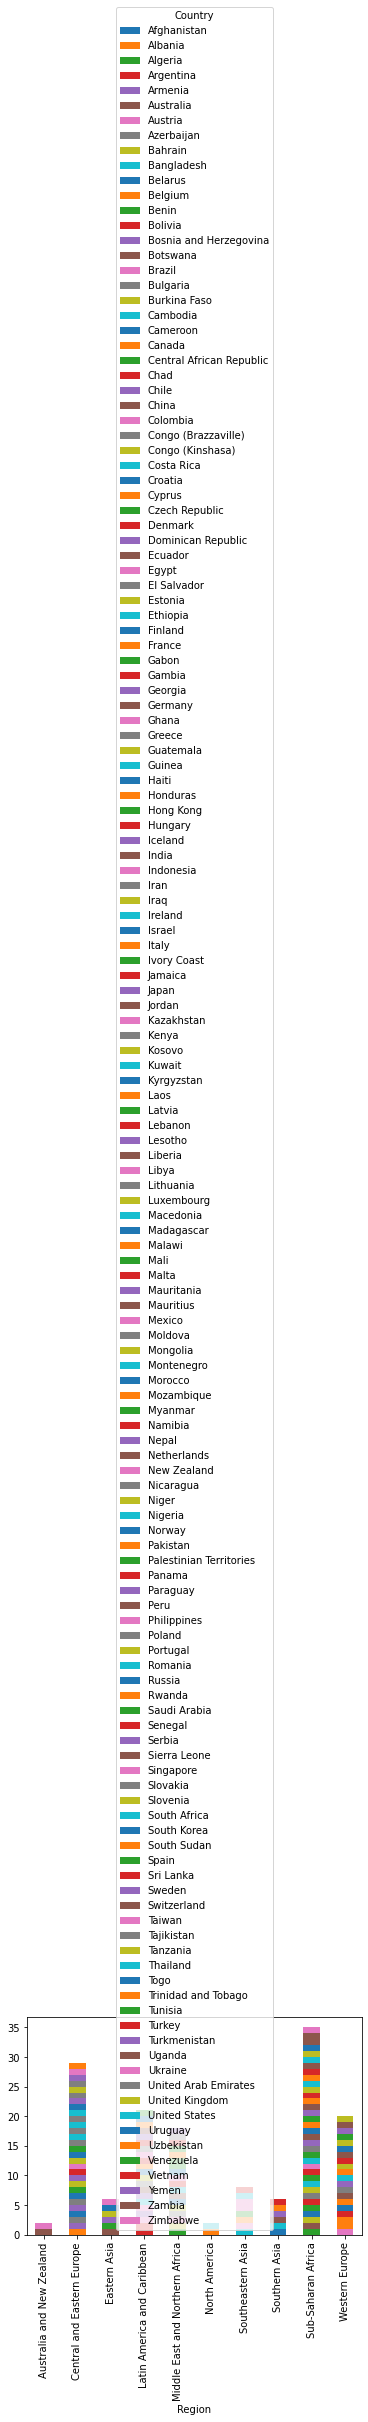

In [192]:
t.plot.bar(stacked=True)
# La région d'Afrique sub Saharrienne contient le plus de pays tandis que les régions d'Australie 
# Nouvelle Zéaland et d'Amérique du Nord contiennent le moins de pays.

In [193]:
# Test de Khi-deux:

tab=pd.crosstab(data.Region, data.Country,normalize = "columns").round(2)*100
tab

Country                          Afghanistan  Albania  Algeria  Argentina  \
Region                                                                      
Australia and New Zealand                0.0      0.0      0.0        0.0   
Central and Eastern Europe               0.0    100.0      0.0        0.0   
Eastern Asia                             0.0      0.0      0.0        0.0   
Latin America and Caribbean              0.0      0.0      0.0      100.0   
Middle East and Northern Africa          0.0      0.0    100.0        0.0   
North America                            0.0      0.0      0.0        0.0   
Southeastern Asia                        0.0      0.0      0.0        0.0   
Southern Asia                          100.0      0.0      0.0        0.0   
Sub-Saharan Africa                       0.0      0.0      0.0        0.0   
Western Europe                           0.0      0.0      0.0        0.0   

Country                          Armenia  Australia  Austria  Azerbaijan  \
Region                                                                     
Australia and New Zealand            0.0      100.0      0.0         0.0   
Central and Eastern Europe         100.0        0.0      0.0       100.0   
Eastern Asia                         0.0        0.0      0.0         0.0   
Latin America and Caribbean          0.0        0.0      0.0         0.0   
Middle East and Northern Africa      0.0        0.0      0.0         0.0   
North America                        0.0        0.0      0.0         0.0   
Southeastern Asia                    0.0        0.0      0.0         0.0   
Southern Asia                        0.0        0.0      0.0         0.0   
Sub-Saharan Africa                   0.0        0.0      0.0         0.0   
Western Europe                       0.0        0.0    100.0         0.0   

Country                          Bahrain  Bangladesh  ...  \
Region                                                ...   
Australia and New Zealand            0.0         0.0  ...   
Central and Eastern Europe           0.0         0.0  ...   
Eastern Asia                         0.0         0.0  ...   
Latin America and Caribbean          0.0         0.0  ...   
Middle East and Northern Africa    100.0         0.0  ...   
North America                        0.0         0.0  ...   
Southeastern Asia                    0.0         0.0  ...   
Southern Asia                        0.0       100.0  ...   
Sub-Saharan Africa                   0.0         0.0  ...   
Western Europe                       0.0         0.0  ...   

Country                          United Arab Emirates  United Kingdom  \
Region                                                                  
Australia and New Zealand                         0.0             0.0   
Central and Eastern Europe                        0.0             0.0   
Eastern Asia                                      0.0             0.0   
Latin America and Caribbean                       0.0             0.0   
Middle East and Northern Africa                 100.0             0.0   
North America                                     0.0             0.0   
Southeastern Asia                                 0.0             0.0   
Southern Asia                                     0.0             0.0   
Sub-Saharan Africa                                0.0             0.0   
Western Europe                                    0.0           100.0   

Country                          United States  Uruguay  Uzbekistan  \
Region                                                                
Australia and New Zealand                  0.0      0.0         0.0   
Central and Eastern Europe                 0.0      0.0       100.0   
Eastern Asia                               0.0      0.0         0.0   
Latin America and Caribbean                0.0    100.0         0.0   
Middle East and Northern Africa            0.0      0.0         0.0   
North America                            100.0      0.0

In [194]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [195]:
sqtab = sm.stats.SquareTable(tab)
sqtab.summary()
# La P-value est de 0 donc inférieure à 5% alors le résultat est statistiquement significatif.

<class 'statsmodels.iolib.table.SimpleTable'>

In [196]:
# Associations entre variables quantitatives

In [197]:
data_quanti=data.select_dtypes(include="float64")

In [198]:
data_quanti.head()

Happiness       GDP  SocialSupport     Health   Freedom  Generosity  \
0   2.661718  7.497755       0.490880  52.799999  0.427011   -0.112198   
1   4.639548  9.376145       0.637698  68.400002  0.749611   -0.032643   
2   5.248912  9.540639       0.806754  65.699997  0.436670   -0.191522   
3   6.039330  9.848709       0.906699  68.599998  0.831966   -0.182600   
4   4.287736  9.081095       0.697925  66.599998  0.613697   -0.133958   

   Corruption  PositiveAffect  NegativeAffect  ConfidenceInGovernment  
0    0.954393        0.496349        0.371326                0.261179  
1    0.876135        0.669241        0.333884                0.457738  
2    0.699774        0.641980        0.288710                0.502155  
3    0.841052        0.809423        0.291717                0.305430  
4    0.864683        0.625014        0.437149                0.246901

In [199]:
data_quanti.corr()*100

Happiness         GDP  SocialSupport      Health  \
Happiness               100.000000   74.056691      76.141683   75.549472   
GDP                      74.056691  100.000000      75.021447   83.624722   
SocialSupport            76.141683   75.021447     100.000000   72.302707   
Health                   75.549472   83.624722      72.302707  100.000000   
Freedom                  53.473085   30.478500      39.777102   35.813834   
Generosity               16.932985    0.411960       6.598592    3.681476   
Corruption              -40.700467  -33.405026     -24.315850  -34.128939   
PositiveAffect           52.060615   26.817023      41.726921   29.661303   
NegativeAffect          -57.803016  -53.636540     -65.264529  -57.484041   
ConfidenceInGovernment  -14.917068  -25.450226     -21.167843  -25.898327   

                           Freedom  Generosity  Corruption  PositiveAffect  \
Happiness                53.473085   16.932985  -40.700467       52.060615   
GDP                      30.478500    0.411960  -33.405026       26.817023   
SocialSupport            39.777102    6.598592  -24.315850       41.726921   
Health                   35.813834    3.681476  -34.128939       29.661303   
Freedom                 100.000000   32.704503  -44.674724       68.684457   
Generosity               32.704503  100.000000  -39.371094       28.088133   
Corruption              -44.674724  -39.371094  100.000000      -30.177283   
PositiveAffect           68.684457   28.088133  -30.177283      100.000000   
NegativeAffect          -42.069685  -13.659806   33.190522      -42.179615   
ConfidenceInGovernment   42.640591   38.323223  -46.822794       19.181396   

                        NegativeAffect  ConfidenceInGovernment  
Happiness                   -57.803016              -14.917068  
GDP                         -53.636540              -25.450226  
SocialSupport               -65.264529              -21.167843  
Health                      -57.484041              -25.898327  
Freedom                     -42.069685               42.640591  
Generosity                  -13.659806               38.323223  
Corruption                   33.190522              -46.822794  
PositiveAffect              -42.179615               19.181396  
NegativeAffect              100.000000                0.449329  
ConfidenceInGovernment        0.449329              100.000000

Text(0.5, 1.0, 'Correlation')

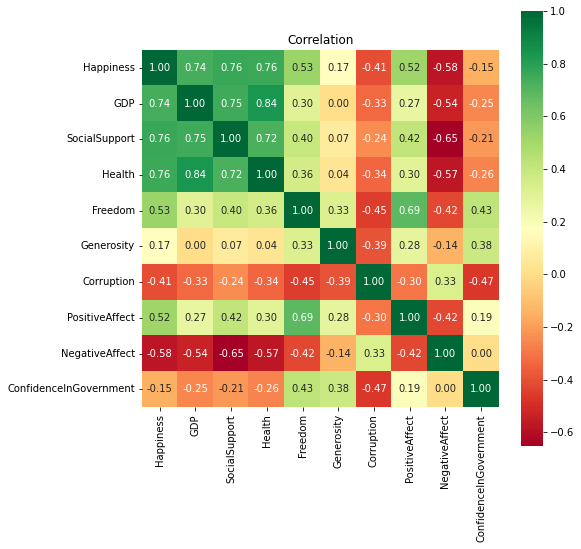

In [200]:
rcParams['figure.figsize'] = (8, 8)
sns.heatmap(data_quanti.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')
plt.title('Correlation')

Valeurs liées:
- GDP/Health

Valeurs assez liées:
- Happiness/GDP
  Happiness/SocialSupport
  Happiness/Health

- GDP/Happiness
  GDP/SocialSupport
  GDP/Health

- SocialSupport/Health


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

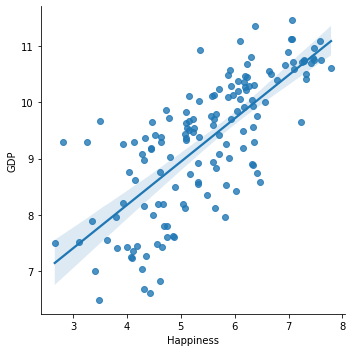

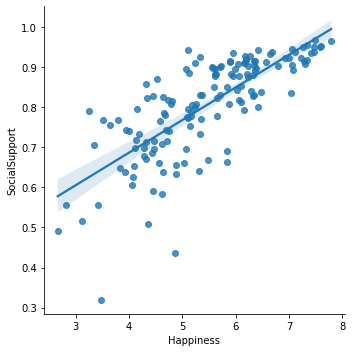

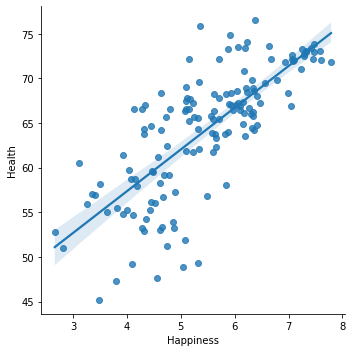

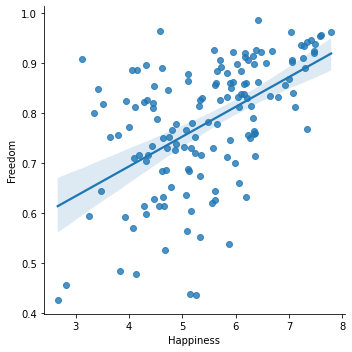

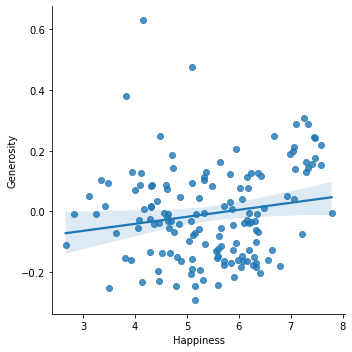

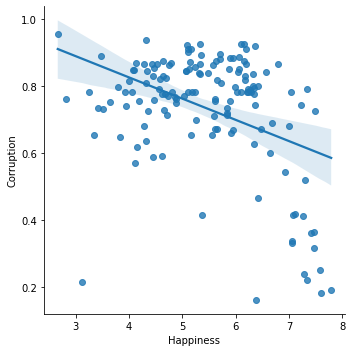

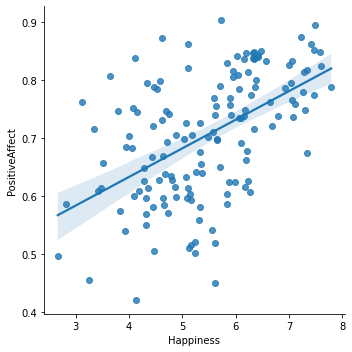

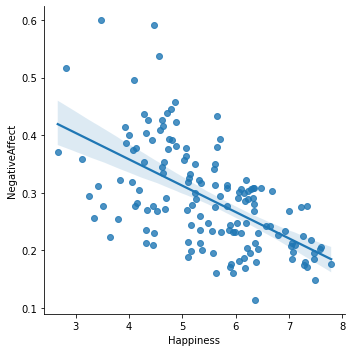

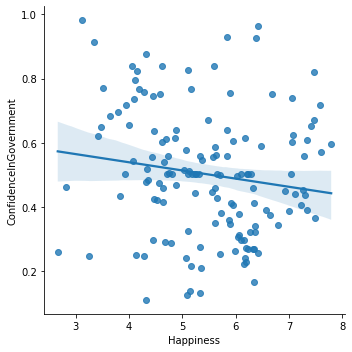

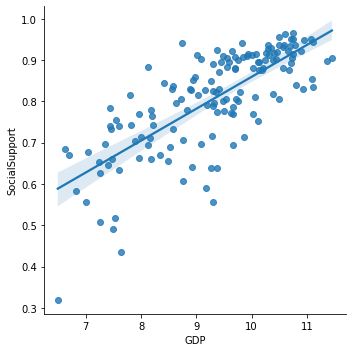

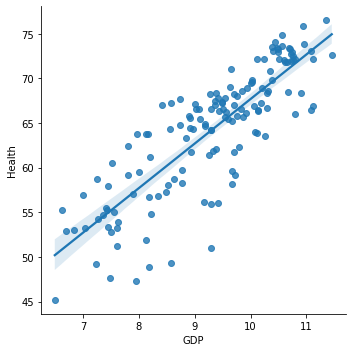

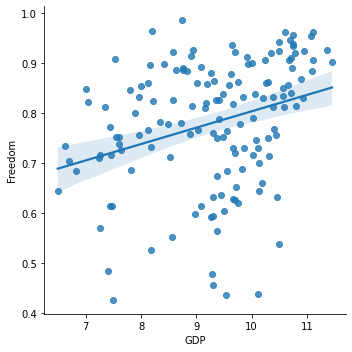

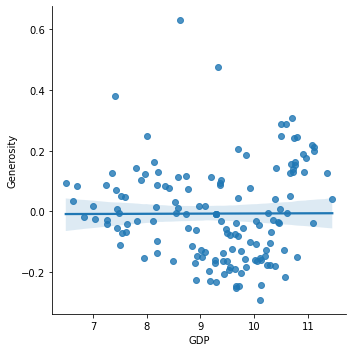

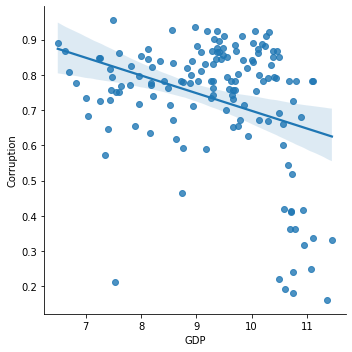

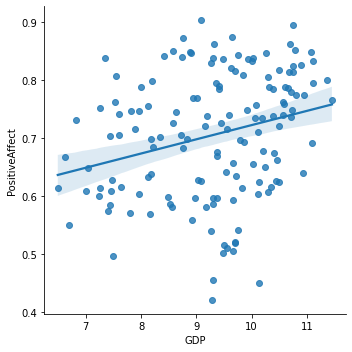

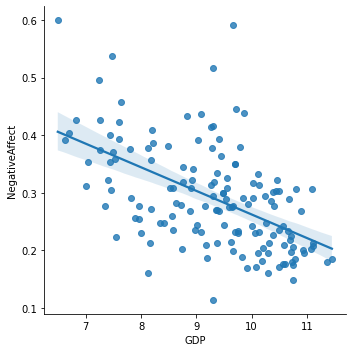

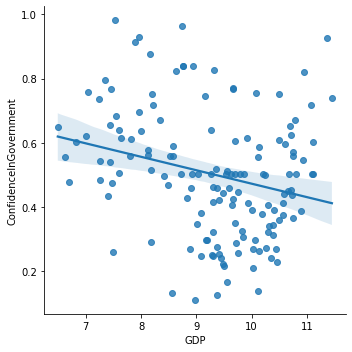

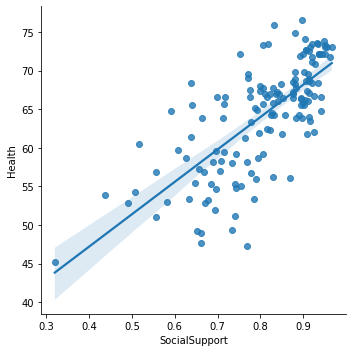

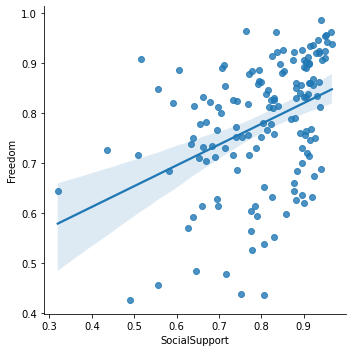

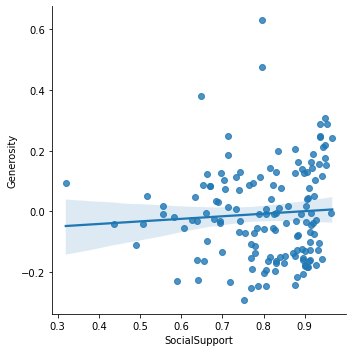

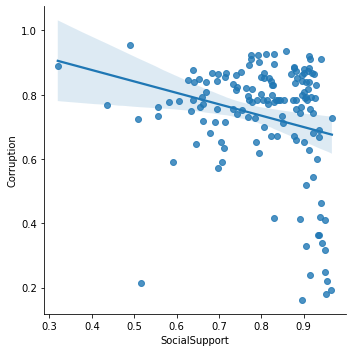

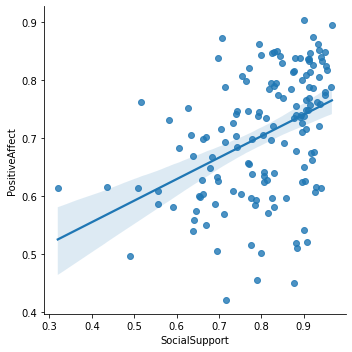

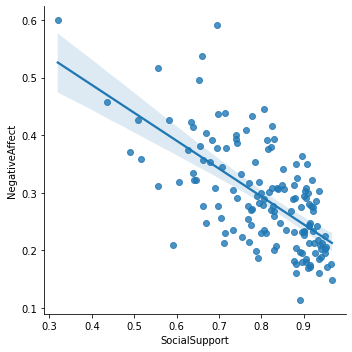

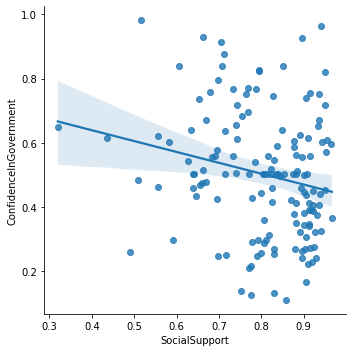

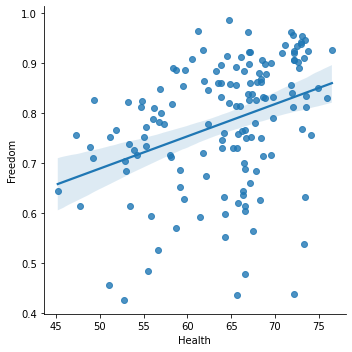

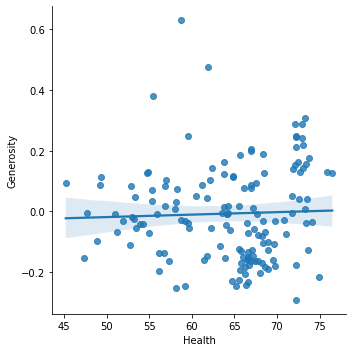

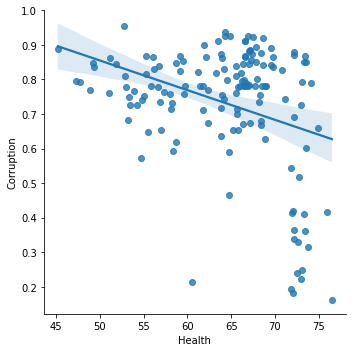

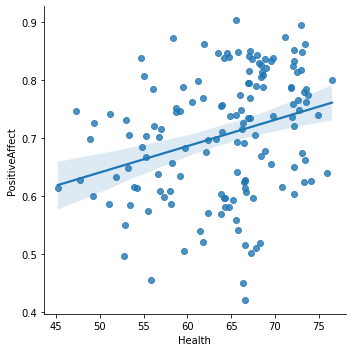

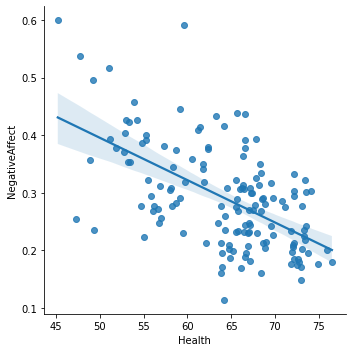

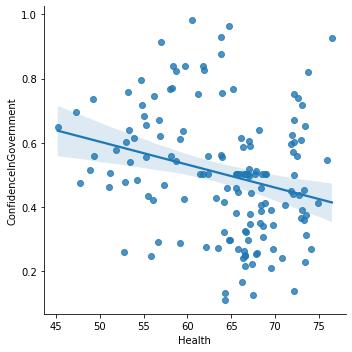

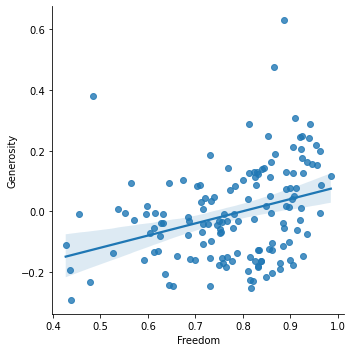

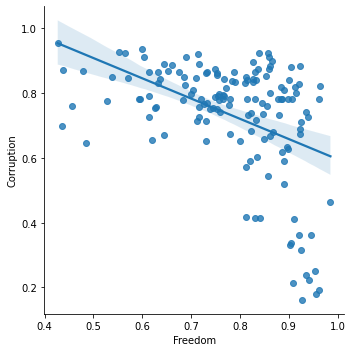

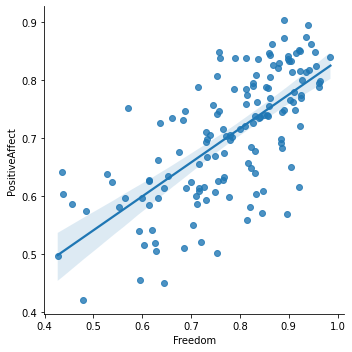

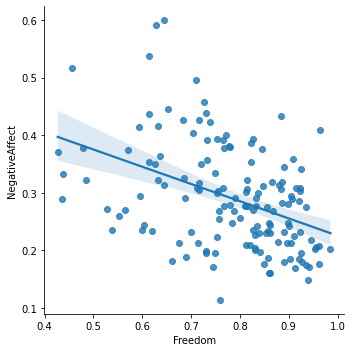

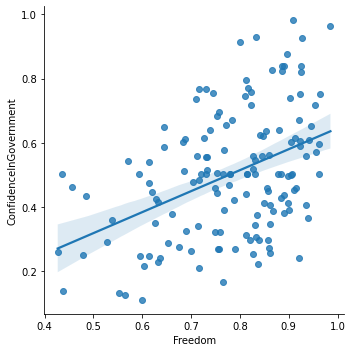

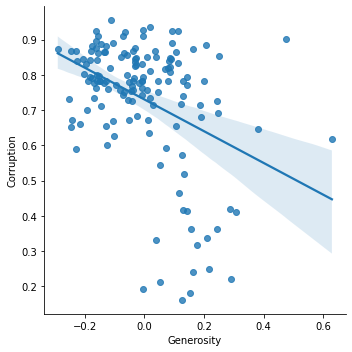

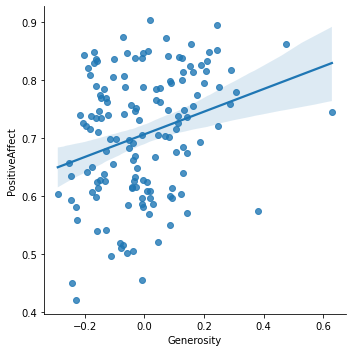

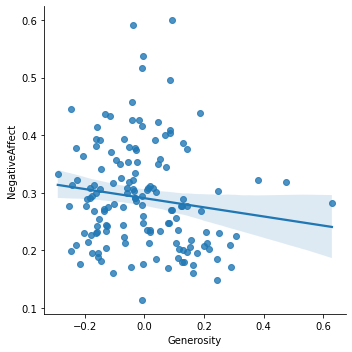

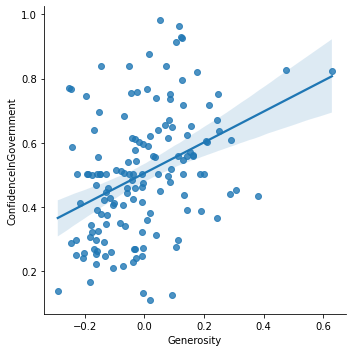

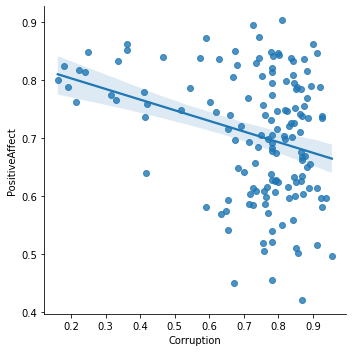

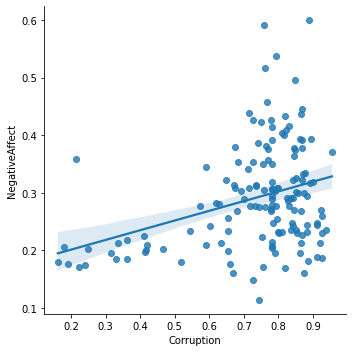

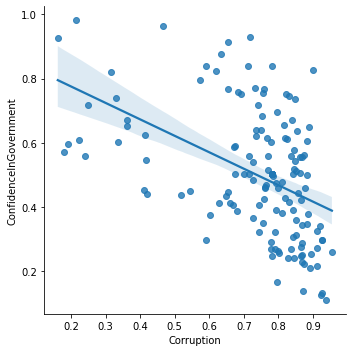

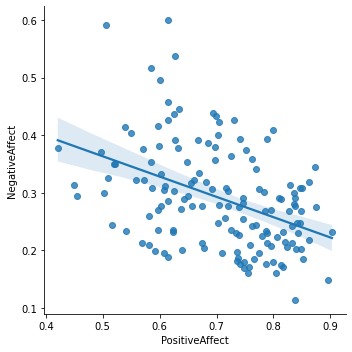

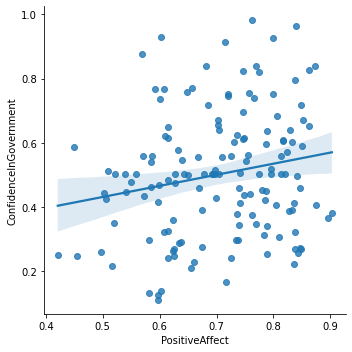

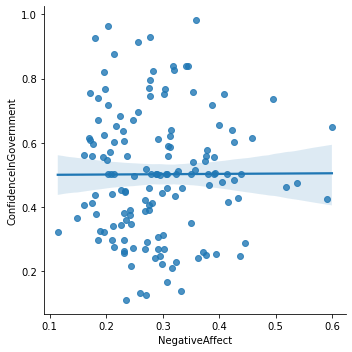

In [201]:
# Régression linéaire

sns.lmplot(x="Happiness", y="GDP", data=data_quanti)
sns.lmplot(x="Happiness", y="SocialSupport", data=data_quanti)
sns.lmplot(x="Happiness", y="Health", data=data_quanti)
sns.lmplot(x="Happiness", y="Freedom", data=data_quanti)
sns.lmplot(x="Happiness", y="Generosity", data=data_quanti)
sns.lmplot(x="Happiness", y="Corruption", data=data_quanti)
sns.lmplot(x="Happiness", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="Happiness", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="Happiness", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="GDP", y="SocialSupport", data=data_quanti)
sns.lmplot(x="GDP", y="Health", data=data_quanti)
sns.lmplot(x="GDP", y="Freedom", data=data_quanti)
sns.lmplot(x="GDP", y="Generosity", data=data_quanti)
sns.lmplot(x="GDP", y="Corruption", data=data_quanti)
sns.lmplot(x="GDP", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="GDP", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="GDP", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="SocialSupport", y="Health", data=data_quanti)
sns.lmplot(x="SocialSupport", y="Freedom", data=data_quanti)
sns.lmplot(x="SocialSupport", y="Generosity", data=data_quanti)
sns.lmplot(x="SocialSupport", y="Corruption", data=data_quanti)
sns.lmplot(x="SocialSupport", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="SocialSupport", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="SocialSupport", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="Health", y="Freedom", data=data_quanti)
sns.lmplot(x="Health", y="Generosity", data=data_quanti)
sns.lmplot(x="Health", y="Corruption", data=data_quanti)
sns.lmplot(x="Health", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="Health", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="Health", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="Freedom", y="Generosity", data=data_quanti)
sns.lmplot(x="Freedom", y="Corruption", data=data_quanti)
sns.lmplot(x="Freedom", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="Freedom", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="Freedom", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="Generosity", y="Corruption", data=data_quanti)
sns.lmplot(x="Generosity", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="Generosity", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="Generosity", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="Corruption", y="PositiveAffect", data=data_quanti)
sns.lmplot(x="Corruption", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="Corruption", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="PositiveAffect", y="NegativeAffect", data=data_quanti)
sns.lmplot(x="PositiveAffect", y="ConfidenceInGovernment", data=data_quanti)

sns.lmplot(x="NegativeAffect", y="ConfidenceInGovernment", data=data_quanti)

In [202]:
# Test de Pearson
def p(X, Y):
    p = scipy.stats.pearsonr(X, Y)
    print(p)

# Happiness
p(data.Happiness, data.GDP)
# La P-value de 8.231143958608688e-27 est inférieure à 5% donc il y a dépendance linéaire.

(0.7405669055358518, 8.231143958608688e-27)


In [203]:
p(data.Happiness, data.SocialSupport)
# La P-value de 4.3717991169095706e-29 est inférieure à 5% donc il y a dépendance linéaire.

(0.7614168262536201, 4.3717991169095706e-29)


In [204]:
p(data.Happiness, data.Health)
# La P-value de 2.041476717523228e-28 est inférieure à 5% donc il y a dépendance linéaire.

(0.7554947224514914, 2.041476717523228e-28)


In [205]:
p(data.Happiness, data.Freedom)
# La P-value de 3.0281309452016433e-12 est inférieure à 5% donc il y a dépendance linéaire.

(0.5347308516581425, 3.0281309452016433e-12)


In [206]:
p(data.Happiness, data.Corruption)
# La P-value de 3.1243322600083285e-07 est inférieure à 5% donc il y a dépendance linéaire.

(-0.4070046713408827, 3.1243322600083285e-07)


In [207]:
p(data.Happiness, data.PositiveAffect)
# La P-value de 1.3893087568463686e-11 est inférieure à 5% donc il y a dépendance linéaire.

(0.5206061456494862, 1.3893087568463686e-11)


In [208]:
p(data.Happiness, data.NegativeAffect)
# La P-value de 1.7746601320095386e-14 est inférieure à 5% donc il y a dépendance linéaire.

(-0.5780301570628373, 1.7746601320095386e-14)


In [209]:
p(data.Happiness, data.ConfidenceInGovernment)
# La P-value de 0.07134712008436558 est supérieure à 5% donc il n'y a pas de dépendance linéaire.

(-0.14917067711072043, 0.07134712008436558)


In [210]:
# GDP

p(data.GDP, data.SocialSupport)
# La P-value de 7.776798382072971e-28 est inférieure à 5% donc il y a dépendance linéaire.

(0.7502144687066916, 7.776798382072971e-28)


In [211]:
p(data.GDP, data.Health)
# La P-value de 1.1497394790497992e-39 est inférieure à 5% donc il y a dépendance linéaire.

(0.8362472184210027, 1.1497394790497992e-39)


In [212]:
p(data.GDP, data.Freedom)
# La P-value de  0.00017439471347210754 est inférieure à 5% donc il y a dépendance linéaire.

(0.30478499836697037, 0.00017439471347210754)


In [213]:
p(data.GDP, data.Corruption)
# La P-value de 3.5497130962221274e-05 est inférieure à 5% donc il y a dépendance linéaire.

(-0.33405026124593834, 3.5497130962221274e-05)


In [214]:
p(data.GDP, data.PositiveAffect)
# La P-value de 0.0010234491088197922 est inférieure à 5% donc il y a dépendance linéaire.

(0.2681702254585314, 0.0010234491088197922)


In [215]:
p(data.GDP, data.NegativeAffect)
# La P-value de 2.527048451589686e-12 est inférieure à 5% donc il y a dépendance linéaire.

(-0.5363653978606875, 2.527048451589686e-12)


In [216]:
p(data.GDP, data.ConfidenceInGovernment)
# La P-value de 0.0018663123569872255 est inférieure à 5% donc il y a dépendance linéaire.

(-0.25450226319645125, 0.0018663123569872255)


In [217]:
# SociaSupport

p(data.SocialSupport, data.Health)
# La P-value de 4.6406487004833555e-25 est inférieure à 5% donc il y a dépendance linéaire.

(0.7230270740672573, 4.6406487004833555e-25)


In [218]:
p(data.SocialSupport, data.Freedom)
# La P-value de 6.070034395562326e-07 est inférieure à 5% donc il y a dépendance linéaire.

(0.39777101661224545, 6.070034395562326e-07)


In [219]:
p(data.SocialSupport, data.PositiveAffect)
# La P-value de 1.4580443023313772e-07 est inférieure à 5% donc il y a dépendance linéaire.

(0.41726920534619977, 1.4580443023313772e-07)


In [220]:
p(data.SocialSupport, data.NegativeAffect)
# La P-value de 3.3574980393191585e-19  est inférieure à 5% donc il y a dépendance linéaire.

(-0.6526452870150513, 3.3574980393191585e-19)


In [221]:
p(data.SocialSupport, data.ConfidenceInGovernment)
# La P-value de 0.010059151045100164 est inférieure à 5% donc il y a dépendance linéaire.

(-0.21167843124462338, 0.010059151045100164)


In [222]:
#Health

p(data.Health, data.Freedom)
# La P-value de 8.437536198759442e-06 est inférieure à 5% donc il y a dépendance linéaire.

(0.35813834020462215, 8.437536198759442e-06)


In [223]:
p(data.Health, data.Corruption)
# La P-value de 2.3336402467643805e-05 est inférieure à 5% donc il y a dépendance linéaire.

(-0.3412893897989148, 2.3336402467643805e-05)


In [224]:
p(data.Health, data.PositiveAffect)
# La P-value de 0.00026430275644333327 est inférieure à 5% donc il y a dépendance linéaire.

(0.2966130308603927, 0.00026430275644333327)


In [225]:
p(data.Health, data.NegativeAffect)
# La P-value de 2.6597005475011582e-14 est inférieure à 5% donc il y a dépendance linéaire.

(-0.5748404103924312, 2.6597005475011582e-14)


In [226]:
p(data.Health, data.ConfidenceInGovernment)
# La P-value de 0.0015379793146312961 est inférieure à 5% donc il y a dépendance linéaire.

(-0.25898327033447177, 0.0015379793146312961)


In [227]:
# Freedom

p(data.Freedom, data.Generosity)
# La P-value de 5.2745553102964454e-05 est inférieure à 5% donc il y a dépendance linéaire.

(0.3270450348638358, 5.2745553102964454e-05)


In [228]:
p(data.Freedom, data.Corruption)
# La P-value de 1.411667193748796e-08 est inférieure à 5% donc il y a dépendance linéaire.

(-0.4467472387903115, 1.411667193748796e-08)


In [229]:
p(data.Freedom, data.PositiveAffect)
# La P-value de 7.690221291218805e-22 est inférieure à 5% donc il y a dépendance linéaire.

(0.6868445721969746, 7.690221291218805e-22)


In [230]:
p(data.Freedom, data.NegativeAffect)
# La P-value de 1.1239945151633296e-07 est inférieure à 5% donc il y a dépendance linéaire.

(-0.42069685155377773, 1.1239945151633296e-07)


In [231]:
p(data.Freedom, data.ConfidenceInGovernment)
# La P-value de 7.239919882612021e-08 est inférieure à 5% donc il y a dépendance linéaire.

(0.42640591038744036, 7.239919882612021e-08)


In [232]:
# Generosity

p(data.Generosity, data.Corruption)
# La P-value de 8.077657965614555e-07 est inférieure à 5% donc il y a dépendance linéaire.

(-0.39371093944803276, 8.077657965614555e-07)


In [233]:
p(data.Generosity, data.PositiveAffect)
# La P-value de 0.0005687915200204612 est inférieure à 5% donc il y a dépendance linéaire.

(0.28088133493604917, 0.0005687915200204612)


In [234]:
p(data.Generosity, data.NegativeAffect)
# La P-value de 0.09899050358085626 est supérieure à 5% donc il n'y a pas de dépendance linéaire.

(-0.13659805858945248, 0.09899050358085626)


In [235]:
p(data.Generosity, data.ConfidenceInGovernment)
# La P-value de 1.6596492855561738e-06 est inférieure à 5% donc il y a dépendance linéaire.

(0.38323222767698056, 1.6596492855561738e-06)


In [236]:
# Corruption

p(data.Corruption, data.PositiveAffect)
# La P-value de 0.0002035679315087321 est inférieure à 5% donc il y a dépendance linéaire.

(-0.3017728342607028, 0.0002035679315087321)


In [237]:
p(data.Corruption, data.NegativeAffect)
# La P-value de 4.0114589772592284e-05 est inférieure à 5% donc il y a dépendance linéaire.

(0.331905222189251, 4.0114589772592284e-05)


In [238]:
p(data.Corruption, data.ConfidenceInGovernment)
# La P-value de 2.2270012104015714e-09 est inférieure à 5% donc il y a dépendance linéaire.

(-0.4682279369176043, 2.2270012104015714e-09)


In [239]:
# NegativeAffect

p(data.NegativeAffect, data.PositiveAffect)
# La P-value de 1.0333672125668772e-07 est inférieure à 5% donc il y a dépendance linéaire.

(-0.42179614759722706, 1.0333672125668772e-07)


In [240]:
p(data.NegativeAffect, data.ConfidenceInGovernment)
# La P-value de 0.9569244862327199 est supérieure à 5% donc il n'y a pas de dépendance linéaire.

(0.004493286579766877, 0.9569244862327199)


In [241]:
# PositiveAffect

p(data.PositiveAffect, data.ConfidenceInGovernment)
# La P-value de  0.019942824701123636 est inférieure à 5% donc il y a dépendance linéaire.

(0.19181395562331693, 0.019942824701123636)


In [242]:
# Association variables catégorielles et variables quantitatives 

In [243]:
# Analayse par région

In [244]:
data.groupby("Region").describe()["Happiness"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  7.292110  0.049600  7.257038   
Central and Eastern Europe        29.0  5.579568  0.652803  4.287736   
Eastern Asia                       6.0  5.656567  0.470594  5.099061   
Latin America and Caribbean       21.0  6.002161  0.667449  3.823866   
Middle East and Northern Africa   18.0  5.149707  1.208129  2.816622   
North America                      2.0  7.203314  0.299183  6.991759   
Southeastern Asia                  8.0  5.193576  0.746812  4.154342   
Southern Asia                      6.0  4.319351  1.027764  2.661718   
Sub-Saharan Africa                35.0  4.397149  0.649422  3.108374   
Western Europe                    20.0  6.891960  0.702476  5.148242   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        7.274574  7.292110  7.309646  7.327183  
Central and Eastern Europe       5.152279  5.614799  6.089905  6.789568  
Eastern Asia                     5.341007  5.618181  5.901479  6.359451  
Latin America and Caribbean      5.713295  6.157342  6.336010  7.225182  
Middle East and Northern Africa  4.503832  5.201451  5.982142  7.331036  
North America                    7.097537  7.203314  7.309091  7.414868  
Southeastern Asia                4.613816  5.136840  5.680426  6.378438  
Southern Asia                    4.112026  4.320358  4.635256  5.830871  
Sub-Saharan Africa               4.039569  4.441306  4.762117  6.174118  
Western Europe                   6.533960  7.067853  7.462622  7.788252

In [245]:
Happiness_mean=data.groupby("Region").mean()["Happiness"]
Happiness_mean
# Les personnes sont plus contente en Australie et Nouvelle Zealand
# Les personnes sont moins contente en Asie du sud

Region
Australia and New Zealand          7.292110
Central and Eastern Europe         5.579568
Eastern Asia                       5.656567
Latin America and Caribbean        6.002161
Middle East and Northern Africa    5.149707
North America                      7.203314
Southeastern Asia                  5.193576
Southern Asia                      4.319351
Sub-Saharan Africa                 4.397149
Western Europe                     6.891960
Name: Happiness, dtype: float64

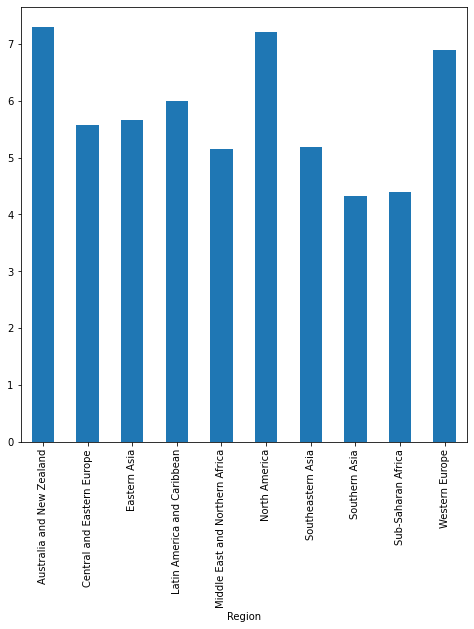

In [246]:
Happiness_mean.plot(kind="bar")

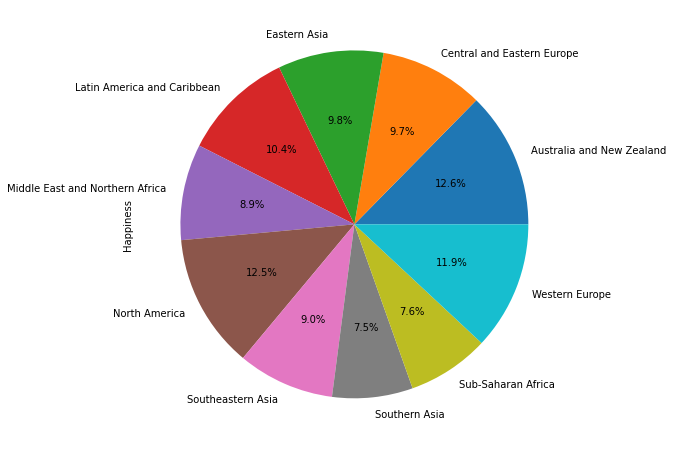

In [247]:
fig, ax = plt.subplots(figsize=(8,8))
Happiness_mean.plot(kind='pie', autopct='%1.1f%%')


In [248]:
data.groupby("Region").describe()["GDP"]

count       mean       std        min  \
Region                                                                   
Australia and New Zealand          2.0  10.600119  0.150561  10.493656   
Central and Eastern Europe        29.0   9.611540  0.666511   7.971401   
Eastern Asia                       6.0  10.051459  0.697545   9.298247   
Latin America and Caribbean       21.0   9.305069  0.661392   7.410451   
Middle East and Northern Africa   18.0   9.831745  0.706188   8.920658   
North America                      2.0  10.796625  0.147475  10.692345   
Southeastern Asia                  8.0   9.204281  0.979849   8.201131   
Southern Asia                      6.0   8.353837  0.677633   7.497755   
Sub-Saharan Africa                35.0   7.862872  0.879922   6.494117   
Western Europe                    20.0  10.683490  0.309797  10.109460   

                                       25%        50%        75%        max  
Region                                                                       
Australia and New Zealand        10.546887  10.600119  10.653350  10.706581  
Central and Eastern Europe        9.189713   9.705603  10.129182  10.392249  
Eastern Asia                      9.443527  10.062869  10.550921  10.934087  
Latin America and Caribbean       8.912447   9.439296   9.760568  10.266848  
Middle East and Northern Africa   9.298247   9.599879  10.339146  11.116818  
North America                    10.744485  10.796625  10.848765  10.900906  
Southeastern Asia                 8.703074   8.849719   9.416385  11.356686  
Southern Asia                     7.892513   8.345729   8.707187   9.364697  
Sub-Saharan Africa                7.309436   7.608030   8.201074   9.918018  
Western Europe                   10.496417  10.690242  10.764806  11.454002

In [249]:
GDP_mean=data.groupby("Region").mean()["GDP"]
GDP_mean
# Le PIB est le plus haut en Amerique du Nord
# Le PIB est le plus bas en Afrique sub Saharienne

Region
Australia and New Zealand          10.600119
Central and Eastern Europe          9.611540
Eastern Asia                       10.051459
Latin America and Caribbean         9.305069
Middle East and Northern Africa     9.831745
North America                      10.796625
Southeastern Asia                   9.204281
Southern Asia                       8.353837
Sub-Saharan Africa                  7.862872
Western Europe                     10.683490
Name: GDP, dtype: float64

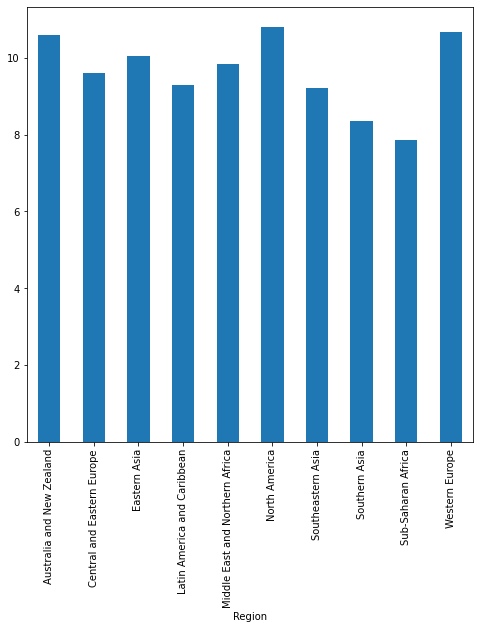

In [250]:
GDP_mean.plot(kind="bar")

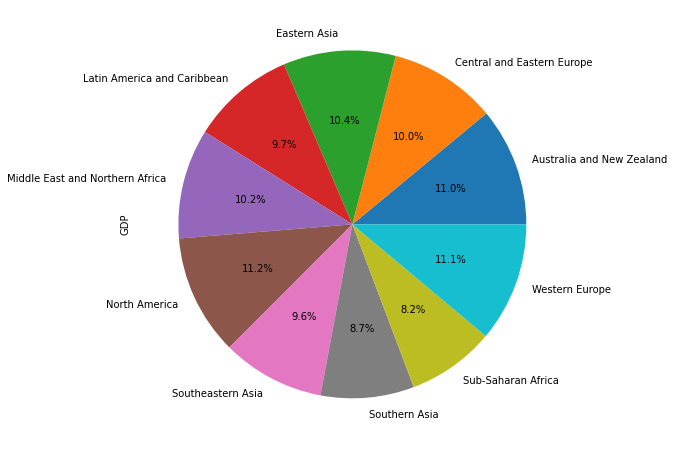

In [251]:
fig, ax = plt.subplots(figsize=(8,8))
GDP_mean.plot(kind='pie', autopct='%1.1f%%')


In [252]:
data.groupby("Region").describe()["SocialSupport"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.952439  0.003509  0.949958   
Central and Eastern Europe        29.0  0.842154  0.095330  0.590495   
Eastern Asia                       6.0  0.851227  0.057461  0.772033   
Latin America and Caribbean       21.0  0.862411  0.065548  0.646985   
Middle East and Northern Africa   18.0  0.777522  0.096868  0.556823   
North America                      2.0  0.927376  0.009013  0.921003   
Southeastern Asia                  8.0  0.811752  0.061900  0.707336   
Southern Asia                      6.0  0.689936  0.127032  0.490880   
Sub-Saharan Africa                35.0  0.686494  0.117525  0.319589   
Western Europe                    20.0  0.915138  0.050317  0.752900   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.951199  0.952439  0.953680  0.954921  
Central and Eastern Europe       0.792087  0.881854  0.908455  0.942131  
Eastern Asia                     0.812964  0.856514  0.888830  0.924251  
Latin America and Caribbean      0.830123  0.894368  0.909250  0.921697  
Middle East and Northern Africa  0.715020  0.810709  0.838947  0.916441  
North America                    0.924189  0.927376  0.930562  0.933749  
Southeastern Asia                0.787662  0.800377  0.857589  0.897350  
Southern Asia                    0.627641  0.701408  0.790426  0.822771  
Sub-Saharan Africa               0.653864  0.697002  0.748953  0.910142  
Western Europe                   0.904866  0.926567  0.945027  0.966753

In [253]:
SocialSupport_mean=data.groupby("Region").mean()["SocialSupport"]
SocialSupport_mean
# Les aides sociales sont les plus hautes en Australie et Nouvelle Zealand
# Les aides sociales sont les plus basses en Afrique sub Saharienne

Region
Australia and New Zealand          0.952439
Central and Eastern Europe         0.842154
Eastern Asia                       0.851227
Latin America and Caribbean        0.862411
Middle East and Northern Africa    0.777522
North America                      0.927376
Southeastern Asia                  0.811752
Southern Asia                      0.689936
Sub-Saharan Africa                 0.686494
Western Europe                     0.915138
Name: SocialSupport, dtype: float64

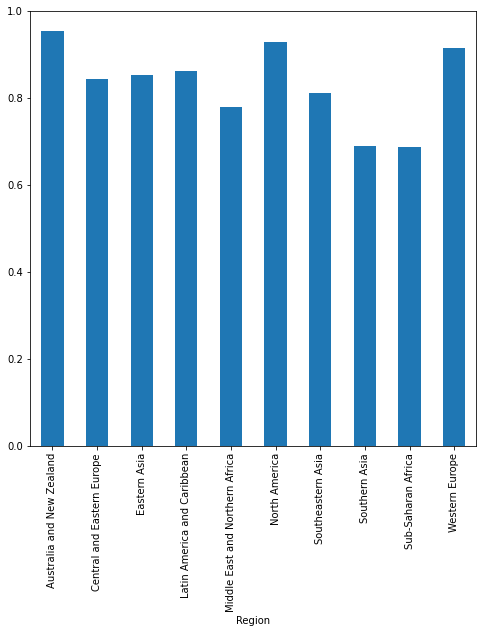

In [254]:
SocialSupport_mean.plot(kind="bar")

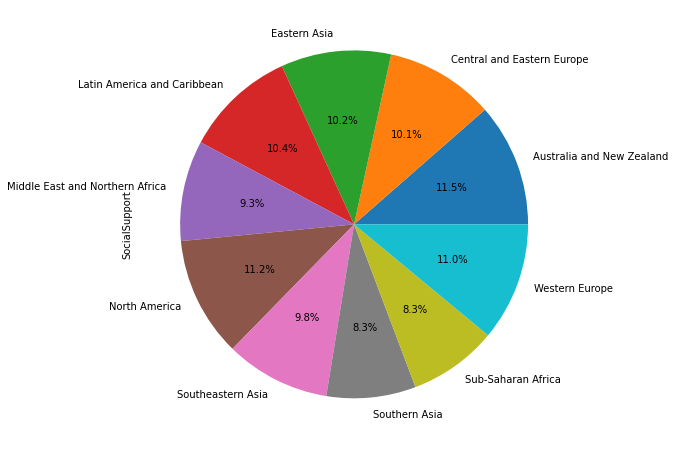

In [255]:
fig, ax = plt.subplots(figsize=(8,8))
SocialSupport_mean.plot(kind='pie', autopct='%1.1f%%')


In [256]:
data.groupby("Region").describe()["Health"]

count       mean       std        min  \
Region                                                                   
Australia and New Zealand          2.0  73.150002  0.212134  73.000000   
Central and Eastern Europe        29.0  66.454459  2.186783  61.799999   
Eastern Asia                       6.0  69.899711  5.777392  62.099998   
Latin America and Caribbean       21.0  66.509524  3.215728  55.500000   
Middle East and Northern Africa   18.0  64.366163  4.954754  51.000000   
North America                      2.0  70.900002  3.535534  68.400002   
Southeastern Asia                  8.0  64.137500  6.052847  58.299999   
Southern Asia                      6.0  60.633333  4.946380  52.799999   
Sub-Saharan Africa                35.0  54.748572  4.258235  45.200001   
Western Europe                    20.0  72.649999  0.710449  71.800003   

                                       25%        50%        75%        max  
Region                                                                       
Australia and New Zealand        73.075001  73.150002  73.225002  73.300003  
Central and Eastern Europe       64.699997  66.599998  68.300003  70.800003  
Eastern Asia                     65.393207  71.150002  74.500002  75.907318  
Latin America and Caribbean      65.500000  67.099998  68.199997  71.099998  
Middle East and Northern Africa  62.772735  65.849998  66.599998  73.099998  
North America                    69.650002  70.900002  72.150002  73.400002  
Southeastern Asia                60.575001  61.850000  67.174999  76.500000  
Southern Asia                    58.499999  61.050001  63.450000  67.000000  
Sub-Saharan Africa               52.950001  55.000000  57.150000  66.099998  
Western Europe                   72.174997  72.349998  73.174999  74.099998

In [257]:
Health_mean=data.groupby("Region").mean()["Health"]
Health_mean
# Les personnes d'Australie et de Nouvelle Zealand sont en meilleure santé
# Les personnes d'Afrique sub Saharienne sont en moins bonne santé

Region
Australia and New Zealand          73.150002
Central and Eastern Europe         66.454459
Eastern Asia                       69.899711
Latin America and Caribbean        66.509524
Middle East and Northern Africa    64.366163
North America                      70.900002
Southeastern Asia                  64.137500
Southern Asia                      60.633333
Sub-Saharan Africa                 54.748572
Western Europe                     72.649999
Name: Health, dtype: float64

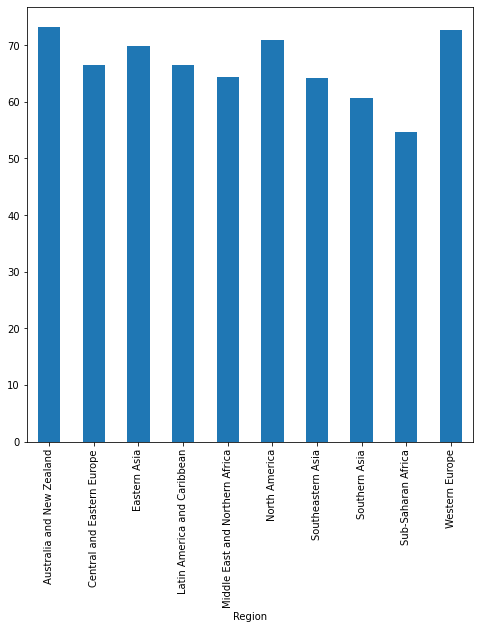

In [258]:
Health_mean.plot(kind="bar")

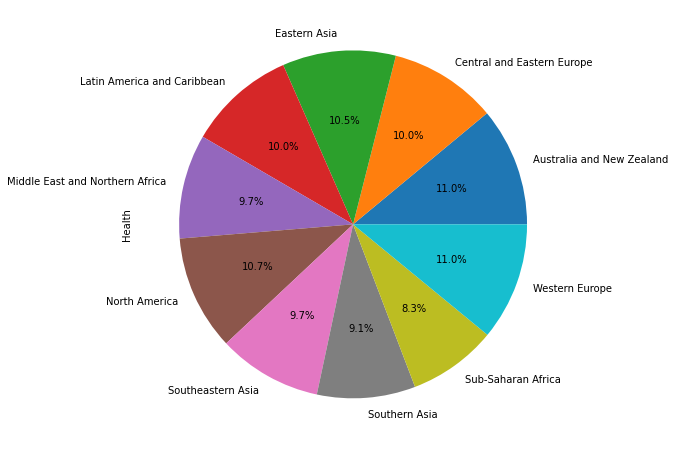

In [259]:
fig, ax = plt.subplots(figsize=(8,8))
Health_mean.plot(kind='pie', autopct='%1.1f%%')


In [260]:
data.groupby("Region").describe()["Freedom"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.926415  0.022436  0.910550   
Central and Eastern Europe        29.0  0.743388  0.107171  0.552825   
Eastern Asia                       6.0  0.755011  0.128989  0.538114   
Latin America and Caribbean       21.0  0.832745  0.105263  0.484429   
Middle East and Northern Africa   18.0  0.693932  0.155175  0.436670   
North America                      2.0  0.906821  0.054199  0.868497   
Southeastern Asia                  8.0  0.895140  0.055430  0.780577   
Southern Asia                      6.0  0.765660  0.178367  0.427011   
Sub-Saharan Africa                35.0  0.747365  0.087638  0.527447   
Western Europe                    20.0  0.854937  0.126525  0.438300   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.918482  0.926415  0.934347  0.942279  
Central and Eastern Europe       0.684846  0.731030  0.831786  0.985178  
Eastern Asia                     0.695884  0.795156  0.844712  0.877618  
Latin America and Caribbean      0.826552  0.860676  0.897852  0.935618  
Middle East and Northern Africa  0.597532  0.687535  0.805281  0.962017  
North America                    0.887659  0.906821  0.925983  0.945145  
Southeastern Asia                0.880765  0.906949  0.925809  0.963775  
Southern Asia                    0.741262  0.836112  0.875675  0.896217  
Sub-Saharan Africa               0.707427  0.753213  0.811364  0.912308  
Western Europe                   0.828601  0.903944  0.927393  0.962199

In [261]:
Freedom_mean=data.groupby("Region").mean()["Freedom"]
Freedom_mean
# Les personnes en Australie et Nouvelle Zealand sont les plus libres
# Les personnes du moyen orient et d'afrique du nord sont les moins libres

Region
Australia and New Zealand          0.926415
Central and Eastern Europe         0.743388
Eastern Asia                       0.755011
Latin America and Caribbean        0.832745
Middle East and Northern Africa    0.693932
North America                      0.906821
Southeastern Asia                  0.895140
Southern Asia                      0.765660
Sub-Saharan Africa                 0.747365
Western Europe                     0.854937
Name: Freedom, dtype: float64

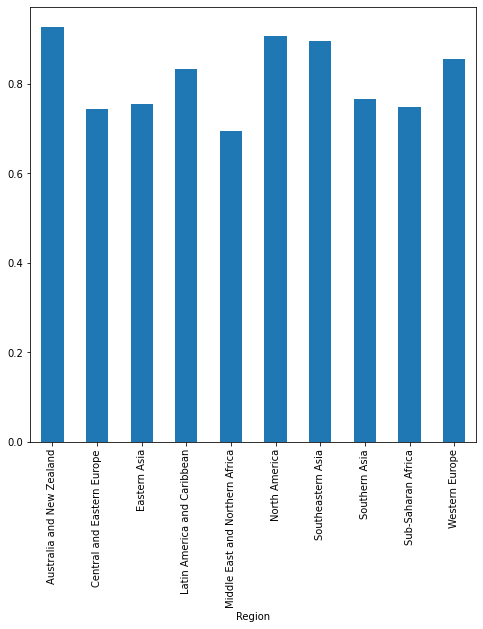

In [262]:
Freedom_mean.plot(kind="bar")

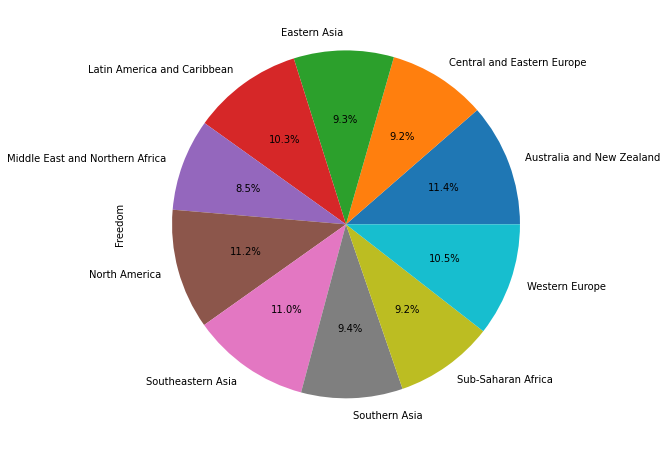

In [263]:
fig, ax = plt.subplots(figsize=(8,8))
Freedom_mean.plot(kind='pie', autopct='%1.1f%%')


In [264]:
data.groupby("Region").describe()["Generosity"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.299239  0.013483  0.289706   
Central and Eastern Europe        29.0 -0.066776  0.110990 -0.245216   
Eastern Asia                       6.0 -0.028791  0.145934 -0.217277   
Latin America and Caribbean       21.0 -0.083541  0.133999 -0.206035   
Middle East and Northern Africa   18.0 -0.051005  0.142798 -0.242939   
North America                      2.0  0.171924  0.023912  0.155016   
Southeastern Asia                  8.0  0.180270  0.254860 -0.146240   
Southern Asia                      6.0  0.018879  0.092914 -0.112198   
Sub-Saharan Africa                35.0 -0.012117  0.113979 -0.253493   
Western Europe                    20.0  0.083539  0.157914 -0.291227   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.294473  0.299239  0.304006  0.308773  
Central and Eastern Europe      -0.154710 -0.082078 -0.003630  0.164256  
Eastern Asia                    -0.145183  0.001167  0.080678  0.128979  
Latin America and Caribbean     -0.170793 -0.123325 -0.030261  0.380741  
Middle East and Northern Africa -0.157442 -0.046026 -0.007056  0.199403  
North America                    0.163470  0.171924  0.180379  0.188833  
Southeastern Asia                0.053036  0.105979  0.272912  0.629577  
Southern Asia                   -0.036148  0.023167  0.073708  0.144507  
Sub-Saharan Africa              -0.068395 -0.017152  0.080420  0.249234  
Western Europe                  -0.013280  0.136245  0.212596  0.286916

In [265]:
Generosity_mean=data.groupby("Region").mean()["Generosity"]
Generosity_mean
# Les personnes d 'Australie et de Nouvelle Zealand sont les plus généreux
# Les personnes d'Amerique Latine et des Caraïbes sont les moins généreux

Region
Australia and New Zealand          0.299239
Central and Eastern Europe        -0.066776
Eastern Asia                      -0.028791
Latin America and Caribbean       -0.083541
Middle East and Northern Africa   -0.051005
North America                      0.171924
Southeastern Asia                  0.180270
Southern Asia                      0.018879
Sub-Saharan Africa                -0.012117
Western Europe                     0.083539
Name: Generosity, dtype: float64

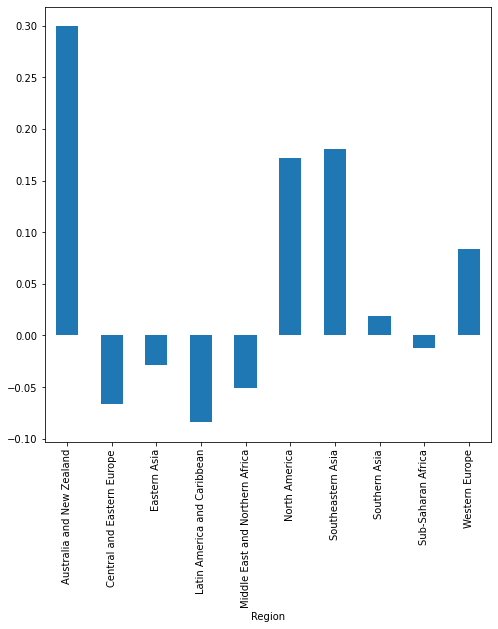

In [266]:
Generosity_mean.plot(kind="bar")

In [267]:
#fig, ax = plt.subplots(figsize=(8,8))
#Generosity_mean.plot(kind='pie', autopct='%1.1f%%')
# Ne fonctionne pas avec les valeurs négatives

In [268]:
data.groupby("Region").describe()["Corruption"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.316617  0.133968  0.221887   
Central and Eastern Europe        29.0  0.811611  0.116317  0.464642   
Eastern Asia                       6.0  0.719258  0.166549  0.415810   
Latin America and Caribbean       21.0  0.794996  0.077510  0.626582   
Middle East and Northern Africa   18.0  0.777513  0.062386  0.670911   
North America                      2.0  0.521613  0.225678  0.362034   
Southeastern Asia                  8.0  0.683846  0.239460  0.161791   
Southern Asia                      6.0  0.783088  0.109510  0.635014   
Sub-Saharan Africa                35.0  0.771472  0.118433  0.213757   
Western Europe                    20.0  0.519219  0.247933  0.181148   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.269252  0.316617  0.363982  0.411347  
Central and Eastern Europe       0.755680  0.855697  0.891560  0.936764  
Eastern Asia                     0.680094  0.762448  0.833547  0.864952  
Latin America and Caribbean      0.760490  0.800893  0.841052  0.911336  
Middle East and Northern Africa  0.758149  0.782116  0.790018  0.910727  
North America                    0.441824  0.521613  0.601402  0.681191  
Southeastern Asia                0.612020  0.746641  0.836721  0.900416  
Southern Asia                    0.727990  0.775490  0.828358  0.954393  
Sub-Saharan Africa               0.744783  0.792390  0.841098  0.889566  
Western Europe                   0.326676  0.468458  0.742951  0.880971

In [269]:
Corruption_mean=data.groupby("Region").mean()["Corruption"]
Corruption_mean
# Il y a plus de Corruption en Europe de l'est et centrale
# Il y a moins de corruption en Australie et Nouvelle Zealand

Region
Australia and New Zealand          0.316617
Central and Eastern Europe         0.811611
Eastern Asia                       0.719258
Latin America and Caribbean        0.794996
Middle East and Northern Africa    0.777513
North America                      0.521613
Southeastern Asia                  0.683846
Southern Asia                      0.783088
Sub-Saharan Africa                 0.771472
Western Europe                     0.519219
Name: Corruption, dtype: float64

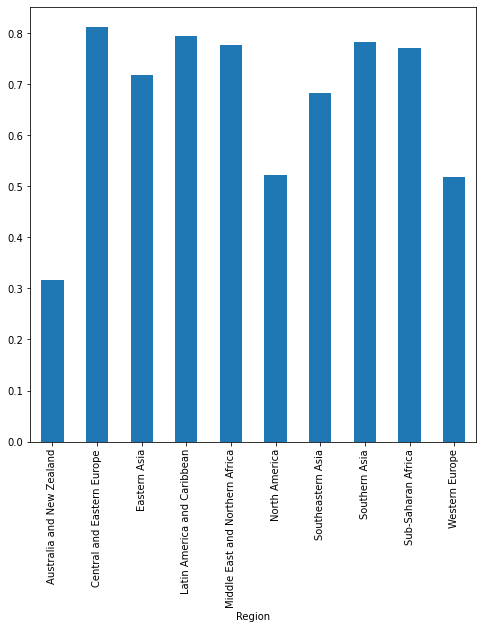

In [270]:
Corruption_mean.plot(kind="bar")

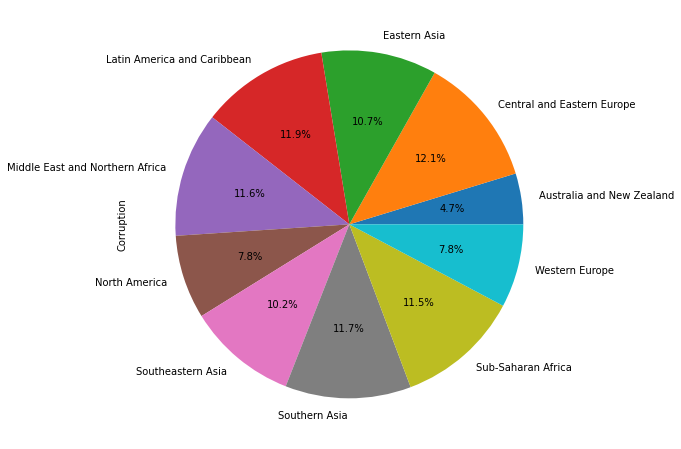

In [271]:
fig, ax = plt.subplots(figsize=(8,8))
Corruption_mean.plot(kind='pie', autopct='%1.1f%%')


In [272]:
data.groupby("Region").describe()["PositiveAffect"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.798755  0.026412  0.780079   
Central and Eastern Europe        29.0  0.649410  0.094375  0.502460   
Eastern Asia                       6.0  0.722806  0.091830  0.623378   
Latin America and Caribbean       21.0  0.802202  0.075486  0.573367   
Middle East and Northern Africa   18.0  0.613183  0.119555  0.420962   
North America                      2.0  0.844664  0.025610  0.826555   
Southeastern Asia                  8.0  0.796256  0.056460  0.704992   
Southern Asia                      6.0  0.616494  0.105722  0.496349   
Sub-Saharan Africa                35.0  0.685607  0.071474  0.550526   
Western Europe                    20.0  0.761427  0.078279  0.602939   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.789417  0.798755  0.808093  0.817431  
Central and Eastern Europe       0.592359  0.623313  0.735184  0.838989  
Eastern Asia                     0.648441  0.707776  0.800920  0.837277  
Latin America and Caribbean      0.769282  0.835861  0.845866  0.902772  
Middle East and Northern Africa  0.521414  0.612282  0.693268  0.813571  
North America                    0.835610  0.844664  0.853719  0.862773  
Southeastern Asia                0.763148  0.799366  0.827887  0.872792  
Southern Asia                    0.569265  0.578372  0.658110  0.794952  
Sub-Saharan Africa               0.621113  0.697735  0.743784  0.838287  
Western Europe                   0.732613  0.769907  0.816078  0.895255

In [273]:
PositiveAffect_mean=data.groupby("Region").mean()["PositiveAffect"]
PositiveAffect_mean
# Il y a plus d'effets positifs en Amérique du Nord
# Il y a moins d'effet positif au Moyen Oriant et Caraïbes

Region
Australia and New Zealand          0.798755
Central and Eastern Europe         0.649410
Eastern Asia                       0.722806
Latin America and Caribbean        0.802202
Middle East and Northern Africa    0.613183
North America                      0.844664
Southeastern Asia                  0.796256
Southern Asia                      0.616494
Sub-Saharan Africa                 0.685607
Western Europe                     0.761427
Name: PositiveAffect, dtype: float64

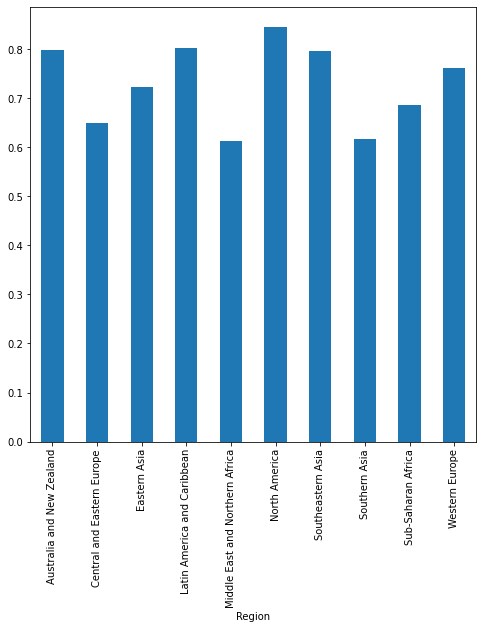

In [274]:
PositiveAffect_mean.plot(kind="bar")

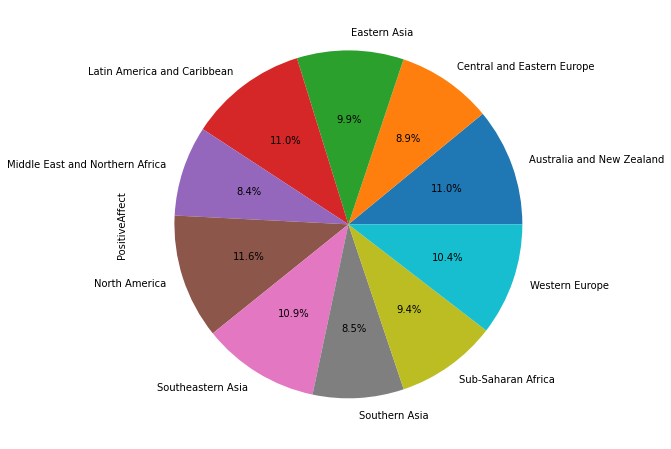

In [275]:
fig, ax = plt.subplots(figsize=(8,8))
PositiveAffect_mean.plot(kind='pie', autopct='%1.1f%%')


In [276]:
data.groupby("Region").describe()["NegativeAffect"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.198539  0.037932  0.171717   
Central and Eastern Europe        29.0  0.245761  0.068017  0.160164   
Eastern Asia                       6.0  0.192110  0.042884  0.114123   
Latin America and Caribbean       21.0  0.294147  0.052417  0.230991   
Middle East and Northern Africa   18.0  0.354163  0.096579  0.207598   
North America                      2.0  0.243125  0.035559  0.217981   
Southeastern Asia                  8.0  0.298067  0.071379  0.179325   
Southern Asia                      6.0  0.309469  0.061824  0.213506   
Sub-Saharan Africa                35.0  0.349701  0.095417  0.168721   
Western Europe                    20.0  0.230139  0.057357  0.148160   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.185128  0.198539  0.211950  0.225361  
Central and Eastern Europe       0.195119  0.230836  0.285601  0.437149  
Eastern Asia                     0.181782  0.207096  0.213903  0.234826  
Latin America and Caribbean      0.248383  0.291042  0.308448  0.433944  
Middle East and Northern Africa  0.291086  0.317781  0.408747  0.590539  
North America                    0.230553  0.243125  0.255697  0.268269  
Southeastern Asia                0.267168  0.300729  0.341523  0.408284  
Southern Asia                    0.279381  0.313139  0.357979  0.375978  
Sub-Saharan Africa               0.274287  0.357456  0.402144  0.599335  
Western Europe                   0.184507  0.207674  0.295834  0.332831

In [277]:
NegativeAffect_mean=data.groupby("Region").mean()["NegativeAffect"]
NegativeAffect_mean
# Il y a plus d'effet négatif au Moyen Oriant et Afrique du Nord
# Il y a moins d'effet négatif en Asie de l'est

Region
Australia and New Zealand          0.198539
Central and Eastern Europe         0.245761
Eastern Asia                       0.192110
Latin America and Caribbean        0.294147
Middle East and Northern Africa    0.354163
North America                      0.243125
Southeastern Asia                  0.298067
Southern Asia                      0.309469
Sub-Saharan Africa                 0.349701
Western Europe                     0.230139
Name: NegativeAffect, dtype: float64

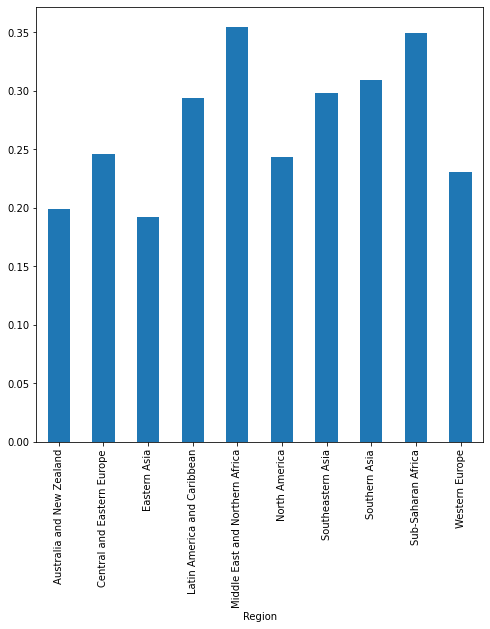

In [278]:
NegativeAffect_mean.plot(kind="bar")

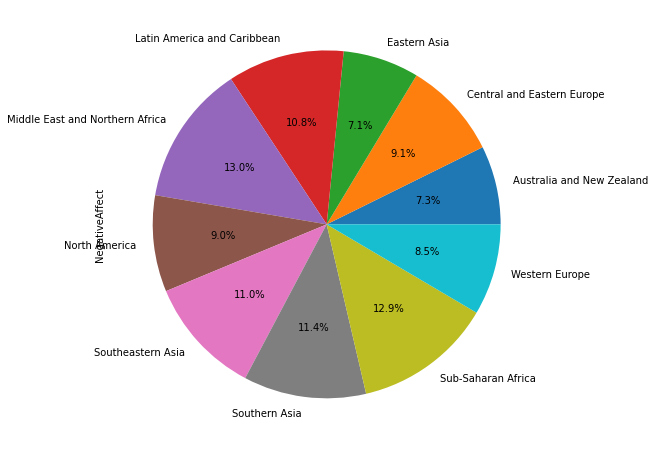

In [279]:
fig, ax = plt.subplots(figsize=(8,8))
NegativeAffect_mean.plot(kind='pie', autopct='%1.1f%%')


In [280]:
data.groupby("Region").describe()["ConfidenceInGovernment"]

count      mean       std       min  \
Region                                                                 
Australia and New Zealand          2.0  0.531211  0.110032  0.453407   
Central and Eastern Europe        29.0  0.416975  0.217884  0.110937   
Eastern Asia                       6.0  0.402691  0.104754  0.275058   
Latin America and Caribbean       21.0  0.366941  0.123608  0.165490   
Middle East and Northern Africa   18.0  0.445190  0.104485  0.217718   
North America                      2.0  0.519635  0.188232  0.386535   
Southeastern Asia                  8.0  0.764285  0.140996  0.502155   
Southern Asia                      6.0  0.601951  0.227509  0.261179   
Sub-Saharan Africa                35.0  0.616832  0.148676  0.286989   
Western Europe                    20.0  0.508622  0.188648  0.139881   

                                      25%       50%       75%       max  
Region                                                                   
Australia and New Zealand        0.492309  0.531211  0.570113  0.609015  
Central and Eastern Europe       0.296396  0.351550  0.502480  0.964690  
Eastern Asia                     0.331762  0.385536  0.479739  0.545041  
Latin America and Caribbean      0.268283  0.381784  0.435077  0.640513  
Middle East and Northern Africa  0.416813  0.502155  0.502155  0.586161  
North America                    0.453085  0.519635  0.586186  0.652736  
Southeastern Asia                0.715602  0.824971  0.838281  0.926998  
Southern Asia                    0.527551  0.558507  0.769353  0.876646  
Sub-Saharan Africa               0.528655  0.615089  0.706152  0.981398  
Western Europe                   0.372356  0.530275  0.634590  0.819707

In [281]:
ConfidenceInGovernment_mean=data.groupby("Region").mean()["ConfidenceInGovernment"]
ConfidenceInGovernment_mean
# Les personnes d'Asie du Sud Est de l'Asie ont le plus confiance dans leur gouvernement
# Les personnes d'Amerique Latine et des Caraïbes ont le moins confiance dans leur gouvernement

Region
Australia and New Zealand          0.531211
Central and Eastern Europe         0.416975
Eastern Asia                       0.402691
Latin America and Caribbean        0.366941
Middle East and Northern Africa    0.445190
North America                      0.519635
Southeastern Asia                  0.764285
Southern Asia                      0.601951
Sub-Saharan Africa                 0.616832
Western Europe                     0.508622
Name: ConfidenceInGovernment, dtype: float64

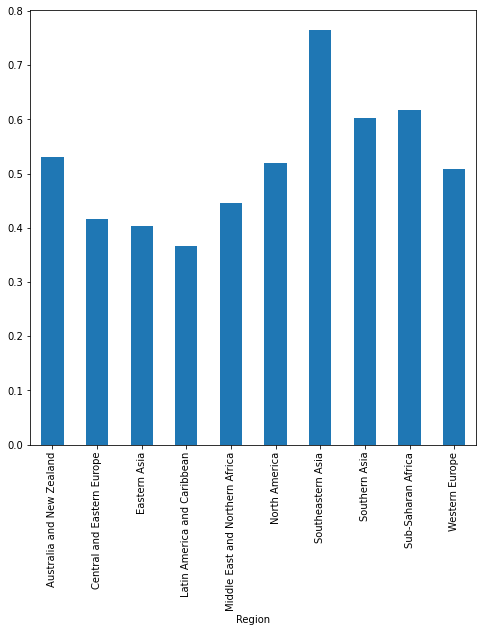

In [282]:
ConfidenceInGovernment_mean.plot(kind="bar")

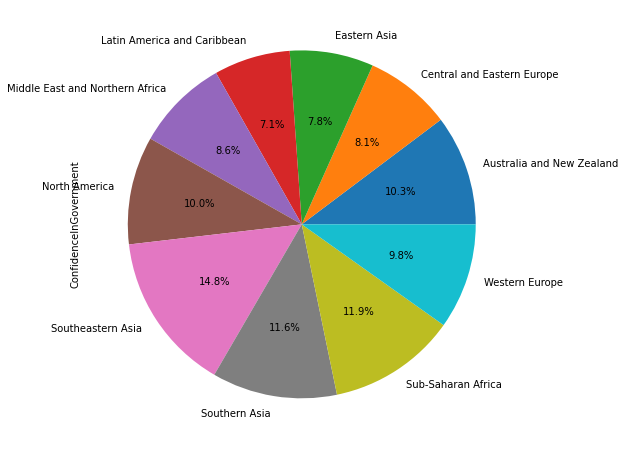

In [283]:
fig, ax = plt.subplots(figsize=(8,8))
ConfidenceInGovernment_mean.plot(kind='pie', autopct='%1.1f%%')


In [284]:
data_mean=data.groupby("Region").mean()
data_mean

Happiness        GDP  SocialSupport  \
Region                                                                 
Australia and New Zealand         7.292110  10.600119       0.952439   
Central and Eastern Europe        5.579568   9.611540       0.842154   
Eastern Asia                      5.656567  10.051459       0.851227   
Latin America and Caribbean       6.002161   9.305069       0.862411   
Middle East and Northern Africa   5.149707   9.831745       0.777522   
North America                     7.203314  10.796625       0.927376   
Southeastern Asia                 5.193576   9.204281       0.811752   
Southern Asia                     4.319351   8.353837       0.689936   
Sub-Saharan Africa                4.397149   7.862872       0.686494   
Western Europe                    6.891960  10.683490       0.915138   

                                    Health   Freedom  Generosity  Corruption  \
Region                                                                         
Australia and New Zealand        73.150002  0.926415    0.299239    0.316617   
Central and Eastern Europe       66.454459  0.743388   -0.066776    0.811611   
Eastern Asia                     69.899711  0.755011   -0.028791    0.719258   
Latin America and Caribbean      66.509524  0.832745   -0.083541    0.794996   
Middle East and Northern Africa  64.366163  0.693932   -0.051005    0.777513   
North America                    70.900002  0.906821    0.171924    0.521613   
Southeastern Asia                64.137500  0.895140    0.180270    0.683846   
Southern Asia                    60.633333  0.765660    0.018879    0.783088   
Sub-Saharan Africa               54.748572  0.747365   -0.012117    0.771472   
Western Europe                   72.649999  0.854937    0.083539    0.519219   

                                 PositiveAffect  NegativeAffect  \
Region                                                            
Australia and New Zealand              0.798755        0.198539   
Central and Eastern Europe             0.649410        0.245761   
Eastern Asia                           0.722806        0.192110   
Latin America and Caribbean            0.802202        0.294147   
Middle East and Northern Africa        0.613183        0.354163   
North America                          0.844664        0.243125   
Southeastern Asia                      0.796256        0.298067   
Southern Asia                          0.616494        0.309469   
Sub-Saharan Africa                     0.685607        0.349701   
Western Europe                         0.761427        0.230139   

                                 ConfidenceInGovernment  
Region                                                   
Australia and New Zealand                      0.531211  
Central and Eastern Europe                     0.416975  
Eastern Asia                                   0.402691  
Latin America and Caribbean                    0.366941  
Middle East and Northern Africa                0.445190  
North America                                  0.519635  
Southeastern Asia                              0.764285  
Southern Asia                                  0.601951  
Sub-Saharan Africa                             0.616832  
Western Europe                                 0.508622

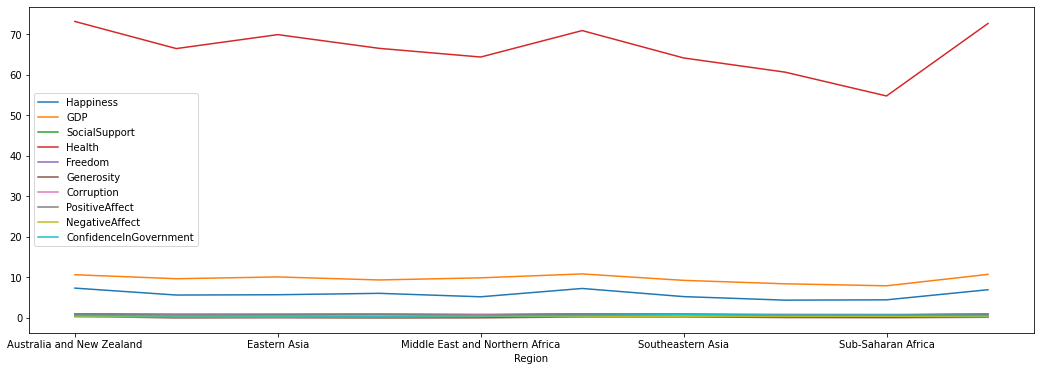

In [285]:
data_mean.plot(figsize=(18,6))

In [286]:
data_max=data.groupby("Region").max()
data_max

Country  Happiness        GDP  \
Region                                                                  
Australia and New Zealand           New Zealand   7.327183  10.706581   
Central and Eastern Europe           Uzbekistan   6.789568  10.392249   
Eastern Asia                             Taiwan   6.359451  10.934087   
Latin America and Caribbean           Venezuela   7.225182  10.266848   
Middle East and Northern Africa           Yemen   7.331036  11.116818   
North America                     United States   7.414868  10.900906   
Southeastern Asia                       Vietnam   6.378438  11.356686   
Southern Asia                         Sri Lanka   5.830871   9.364697   
Sub-Saharan Africa                     Zimbabwe   6.174118   9.918018   
Western Europe                   United Kingdom   7.788252  11.454002   

                                 SocialSupport     Health   Freedom  \
Region                                                                
Australia and New Zealand             0.954921  73.300003  0.942279   
Central and Eastern Europe            0.942131  70.800003  0.985178   
Eastern Asia                          0.924251  75.907318  0.877618   
Latin America and Caribbean           0.921697  71.099998  0.935618   
Middle East and Northern Africa       0.916441  73.099998  0.962017   
North America                         0.933749  73.400002  0.945145   
Southeastern Asia                     0.897350  76.500000  0.963775   
Southern Asia                         0.822771  67.000000  0.896217   
Sub-Saharan Africa                    0.910142  66.099998  0.912308   
Western Europe                        0.966753  74.099998  0.962199   

                                 Generosity  Corruption  PositiveAffect  \
Region                                                                    
Australia and New Zealand          0.308773    0.411347        0.817431   
Central and Eastern Europe         0.164256    0.936764        0.838989   
Eastern Asia                       0.128979    0.864952        0.837277   
Latin America and Caribbean        0.380741    0.911336        0.902772   
Middle East and Northern Africa    0.199403    0.910727        0.813571   
North America                      0.188833    0.681191        0.862773   
Southeastern Asia                  0.629577    0.900416        0.872792   
Southern Asia                      0.144507    0.954393        0.794952   
Sub-Saharan Africa                 0.249234    0.889566        0.838287   
Western Europe                     0.286916    0.880971        0.895255   

                                 NegativeAffect  ConfidenceInGovernment  
Region                                                                   
Australia and New Zealand              0.225361                0.609015  
Central and Eastern Europe             0.437149                0.964690  
Eastern Asia                           0.234826                0.545041  
Latin America and Caribbean            0.433944                0.640513  
Middle East and Northern Africa        0.590539                0.586161  
North America                          0.268269                0.652736  
Southeastern Asia                      0.408284                0.926998  
Southern Asia                          0.375978                0.876646  
Sub-Saharan Africa                     0.599335                0.981398  
Western Europe                         0.332831                0.819707

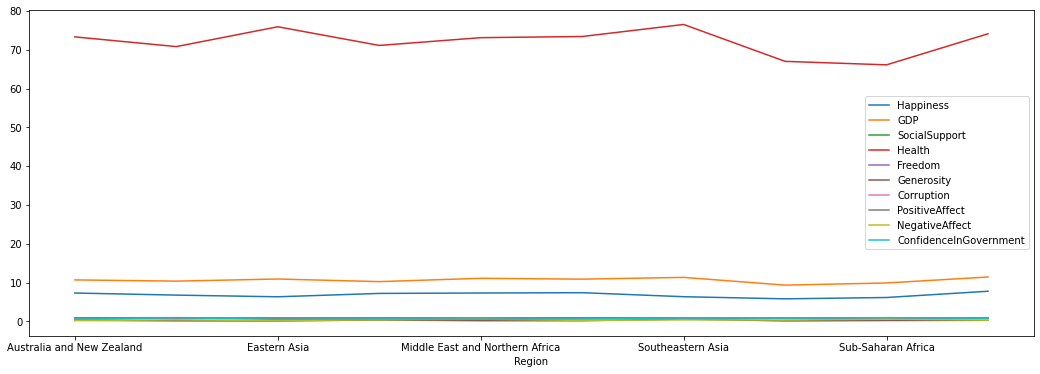

In [287]:
data_max.plot(figsize=(18,6))

In [288]:
# ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [289]:
def model(float, objet):
    model = ols('float ~objet', data=data).fit()
    anova_table = sm.stats.anova_lm(model)
    p_value=anova_table["PR(>F)"][0]
    if p_value > 0.05:
      print("les variables sont indépendantes")
    else :
      print("les variables sont dépendantes")
    print(anova_table)

In [290]:
model(data.Happiness, data.Region)

les variables sont dépendantes
             df      sum_sq    mean_sq          F        PR(>F)
objet       9.0  110.266138  12.251793  21.045624  5.880809e-22
Residual  137.0   79.755090   0.582154        NaN           NaN


In [291]:
model(data.GDP, data.Region)

les variables sont dépendantes
             df      sum_sq    mean_sq          F        PR(>F)
objet       9.0  135.165186  15.018354  29.686658  4.030142e-28
Residual  137.0   69.307717   0.505896        NaN           NaN


In [292]:
model(data.SocialSupport, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq          F        PR(>F)
objet       9.0  1.023024  0.113669  13.639526  1.824961e-15
Residual  137.0  1.141733  0.008334        NaN           NaN


In [293]:
model(data.Health, data.Region)

les variables sont dépendantes
             df       sum_sq     mean_sq          F        PR(>F)
objet       9.0  5335.737176  592.859686  41.815522  4.435953e-35
Residual  137.0  1942.383425   14.177981        NaN           NaN


In [294]:
model(data.Freedom, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq         F    PR(>F)
objet       9.0  0.566249  0.062917  4.828715  0.000013
Residual  137.0  1.785065  0.013030       NaN       NaN


In [295]:
model(data.Generosity, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq         F    PR(>F)
objet       9.0  0.965390  0.107266  5.715216  0.000001
Residual  137.0  2.571272  0.018768       NaN       NaN


In [296]:
model(data.Corruption, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq         F        PR(>F)
objet       9.0  1.733075  0.192564  9.163609  8.674855e-11
Residual  137.0  2.878915  0.021014       NaN           NaN


In [297]:
model(data.PositiveAffect, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq          F        PR(>F)
objet       9.0  0.688736  0.076526  10.297014  4.907145e-12
Residual  137.0  1.018168  0.007432        NaN           NaN


In [298]:
model(data.NegativeAffect, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq         F        PR(>F)
objet       9.0  0.408854  0.045428  7.960852  2.049549e-09
Residual  137.0  0.781785  0.005706       NaN           NaN


In [299]:
model(data.ConfidenceInGovernment, data.Region)

les variables sont dépendantes
             df    sum_sq   mean_sq         F        PR(>F)
objet       9.0  1.784996  0.198333  7.248628  1.409848e-08
Residual  137.0  3.748517  0.027361       NaN           NaN


In [300]:
# Analyse par pays

In [301]:
data.groupby("Country").describe()["Happiness"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  2.661718  NaN  2.661718  2.661718  2.661718  2.661718   
Albania        1.0  4.639548  NaN  4.639548  4.639548  4.639548  4.639548   
Algeria        1.0  5.248912  NaN  5.248912  5.248912  5.248912  5.248912   
Argentina      1.0  6.039330  NaN  6.039330  6.039330  6.039330  6.039330   
Armenia        1.0  4.287736  NaN  4.287736  4.287736  4.287736  4.287736   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  5.070751  NaN  5.070751  5.070751  5.070751  5.070751   
Vietnam        1.0  5.175279  NaN  5.175279  5.175279  5.175279  5.175279   
Yemen          1.0  3.253560  NaN  3.253560  3.253560  3.253560  3.253560   
Zambia         1.0  3.932777  NaN  3.932777  3.932777  3.932777  3.932777   
Zimbabwe       1.0  3.638300  NaN  3.638300  3.638300  3.638300  3.638300   

                  max  
Country                
Afghanistan  2.661718  
Albania      4.639548  
Algeria      5.248912  
Argentina    6.039330  
Armenia      4.287736  
...               ...  
Venezuela    5.070751  
Vietnam      5.175279  
Yemen        3.253560  
Zambia       3.932777  
Zimbabwe     3.638300  

[147 rows x 8 columns]

In [302]:
Happiness_mean=data.groupby("Country").mean()["Happiness"]
Happiness_mean.sort_values()
# L'Afghanistan est le pays le moins heureux

Country
Afghanistan    2.661718
South Sudan    2.816622
Rwanda         3.108374
Yemen          3.253560
Tanzania       3.347121
                 ...   
Switzerland    7.473593
Iceland        7.476214
Norway         7.578745
Denmark        7.593702
Finland        7.788252
Name: Happiness, Length: 147, dtype: float64

In [303]:
Happiness_mean.sort_values(ascending=False)
# La finlande est le pays le plus heureux 

Country
Finland        7.788252
Denmark        7.593702
Norway         7.578745
Iceland        7.476214
Switzerland    7.473593
                 ...   
Tanzania       3.347121
Yemen          3.253560
Rwanda         3.108374
South Sudan    2.816622
Afghanistan    2.661718
Name: Happiness, Length: 147, dtype: float64

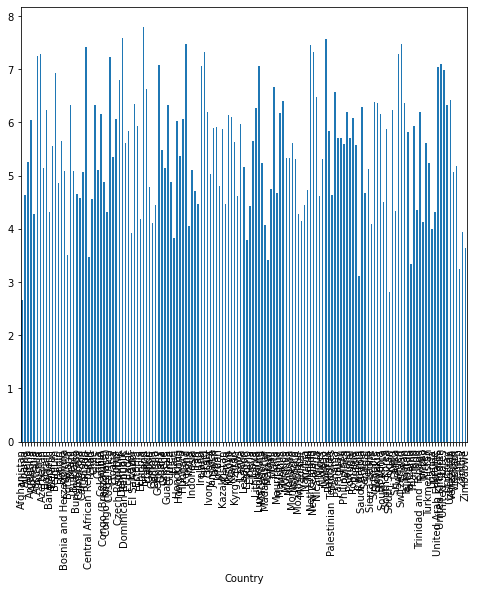

In [304]:
Happiness_mean.plot(kind="bar")

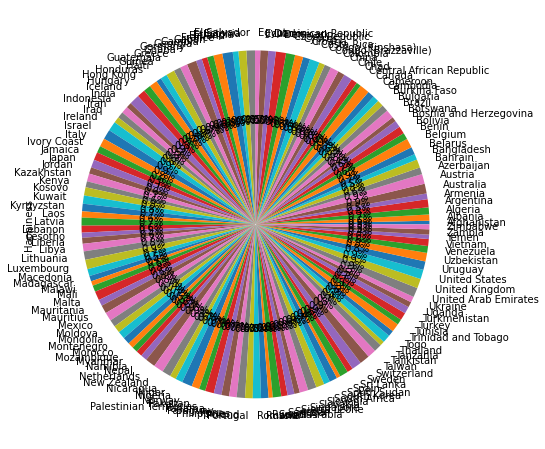

In [305]:
fig, ax = plt.subplots(figsize=(8,8))
Happiness_mean.plot(kind='pie', autopct='%1.1f%%')


In [306]:
data.groupby("Country").describe()["GDP"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  7.497755  NaN  7.497755  7.497755  7.497755  7.497755   
Albania        1.0  9.376145  NaN  9.376145  9.376145  9.376145  9.376145   
Algeria        1.0  9.540639  NaN  9.540639  9.540639  9.540639  9.540639   
Argentina      1.0  9.848709  NaN  9.848709  9.848709  9.848709  9.848709   
Armenia        1.0  9.081095  NaN  9.081095  9.081095  9.081095  9.081095   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  9.439296  NaN  9.439296  9.439296  9.439296  9.439296   
Vietnam        1.0  8.727759  NaN  8.727759  8.727759  8.727759  8.727759   
Yemen          1.0  9.298247  NaN  9.298247  9.298247  9.298247  9.298247   
Zambia         1.0  8.213179  NaN  8.213179  8.213179  8.213179  8.213179   
Zimbabwe       1.0  7.549491  NaN  7.549491  7.549491  7.549491  7.549491   

                  max  
Country                
Afghanistan  7.497755  
Albania      9.376145  
Algeria      9.540639  
Argentina    9.848709  
Armenia      9.081095  
...               ...  
Venezuela    9.439296  
Vietnam      8.727759  
Yemen        9.298247  
Zambia       8.213179  
Zimbabwe     7.549491  

[147 rows x 8 columns]

In [307]:
GDP_mean=data.groupby("Country").mean()["GDP"]
GDP_mean.sort_values().sort_values()
# La République Centre Afrique est le pays où le PIB est le plus bas

Country
Central African Republic     6.494117
Liberia                      6.623784
Congo (Kinshasa)             6.694727
Niger                        6.830874
Malawi                       6.998548
                              ...    
Kuwait                      11.090272
United Arab Emirates        11.116818
Ireland                     11.117440
Singapore                   11.356686
Luxembourg                  11.454002
Name: GDP, Length: 147, dtype: float64

In [308]:
GDP_mean.sort_values().sort_values(ascending=False)
# Le Luxembourg est le pays où le PIB est le plus élevé

Country
Luxembourg                  11.454002
Singapore                   11.356686
Ireland                     11.117440
United Arab Emirates        11.116818
Kuwait                      11.090272
                              ...    
Malawi                       6.998548
Niger                        6.830874
Congo (Kinshasa)             6.694727
Liberia                      6.623784
Central African Republic     6.494117
Name: GDP, Length: 147, dtype: float64

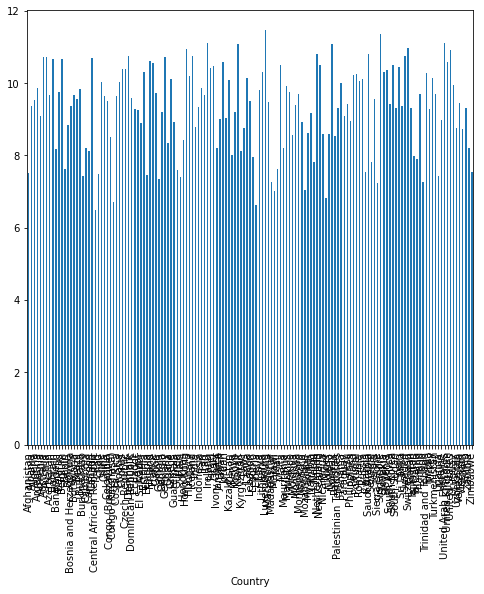

In [309]:
GDP_mean.plot(kind="bar")

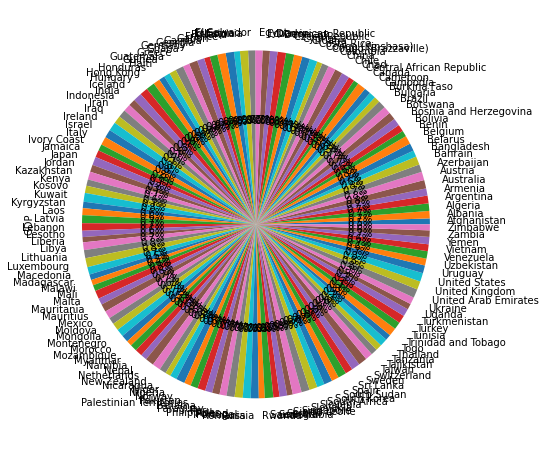

In [310]:
fig, ax = plt.subplots(figsize=(8,8))
GDP_mean.plot(kind='pie', autopct='%1.1f%%')


In [311]:
data.groupby("Country").describe()["SocialSupport"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  0.490880  NaN  0.490880  0.490880  0.490880  0.490880   
Albania        1.0  0.637698  NaN  0.637698  0.637698  0.637698  0.637698   
Algeria        1.0  0.806754  NaN  0.806754  0.806754  0.806754  0.806754   
Argentina      1.0  0.906699  NaN  0.906699  0.906699  0.906699  0.906699   
Armenia        1.0  0.697925  NaN  0.697925  0.697925  0.697925  0.697925   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  0.895879  NaN  0.895879  0.895879  0.895879  0.895879   
Vietnam        1.0  0.805164  NaN  0.805164  0.805164  0.805164  0.805164   
Yemen          1.0  0.789555  NaN  0.789555  0.789555  0.789555  0.789555   
Zambia         1.0  0.743754  NaN  0.743754  0.743754  0.743754  0.743754   
Zimbabwe       1.0  0.754147  NaN  0.754147  0.754147  0.754147  0.754147   

                  max  
Country                
Afghanistan  0.490880  
Albania      0.637698  
Algeria      0.806754  
Argentina    0.906699  
Armenia      0.697925  
...               ...  
Venezuela    0.895879  
Vietnam      0.805164  
Yemen        0.789555  
Zambia       0.743754  
Zimbabwe     0.754147  

[147 rows x 8 columns]

In [312]:
SocialSupport_mean=data.groupby("Country").mean()["SocialSupport"]
SocialSupport_mean.sort_values()
# Les aides sociales sont les moins élevées en République Centre Afrique

Country
Central African Republic    0.319589
Benin                       0.435879
Afghanistan                 0.490880
Togo                        0.507805
Rwanda                      0.516550
                              ...   
Norway                      0.950128
Denmark                     0.952100
New Zealand                 0.954921
Finland                     0.963826
Iceland                     0.966753
Name: SocialSupport, Length: 147, dtype: float64

In [313]:
SocialSupport_mean.sort_values(ascending=False)
# Les aides sociales sont les plus élevées en Iceland

Country
Iceland                     0.966753
Finland                     0.963826
New Zealand                 0.954921
Denmark                     0.952100
Norway                      0.950128
                              ...   
Rwanda                      0.516550
Togo                        0.507805
Afghanistan                 0.490880
Benin                       0.435879
Central African Republic    0.319589
Name: SocialSupport, Length: 147, dtype: float64

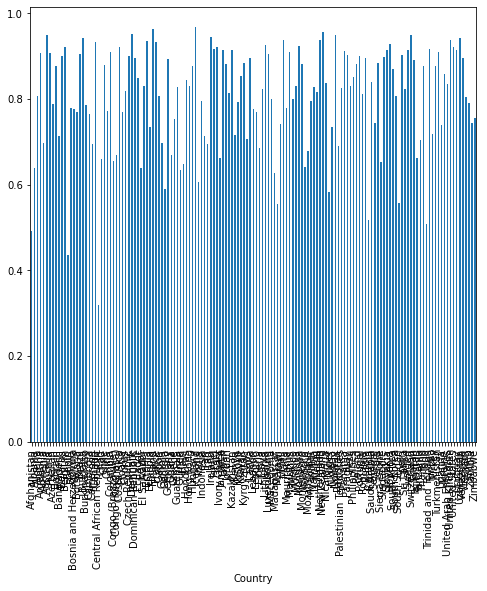

In [314]:
SocialSupport_mean.plot(kind="bar")

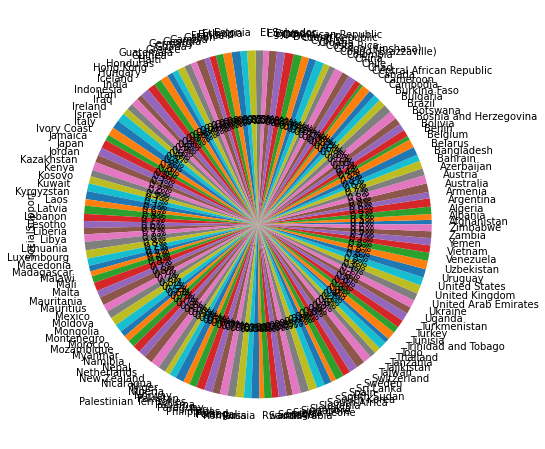

In [315]:
fig, ax = plt.subplots(figsize=(8,8))
SocialSupport_mean.plot(kind='pie', autopct='%1.1f%%')


In [316]:
data.groupby("Country").describe()["Health"]

count       mean  std        min        25%        50%  \
Country                                                               
Afghanistan    1.0  52.799999  NaN  52.799999  52.799999  52.799999   
Albania        1.0  68.400002  NaN  68.400002  68.400002  68.400002   
Algeria        1.0  65.699997  NaN  65.699997  65.699997  65.699997   
Argentina      1.0  68.599998  NaN  68.599998  68.599998  68.599998   
Armenia        1.0  66.599998  NaN  66.599998  66.599998  66.599998   
...            ...        ...  ...        ...        ...        ...   
Venezuela      1.0  66.300003  NaN  66.300003  66.300003  66.300003   
Vietnam        1.0  67.699997  NaN  67.699997  67.699997  67.699997   
Yemen          1.0  55.900002  NaN  55.900002  55.900002  55.900002   
Zambia         1.0  54.799999  NaN  54.799999  54.799999  54.799999   
Zimbabwe       1.0  55.000000  NaN  55.000000  55.000000  55.000000   

                   75%        max  
Country                            
Afghanistan  52.799999  52.799999  
Albania      68.400002  68.400002  
Algeria      65.699997  65.699997  
Argentina    68.599998  68.599998  
Armenia      66.599998  66.599998  
...                ...        ...  
Venezuela    66.300003  66.300003  
Vietnam      67.699997  67.699997  
Yemen        55.900002  55.900002  
Zambia       54.799999  54.799999  
Zimbabwe     55.000000  55.000000  

[147 rows x 8 columns]

In [317]:
Health_mean=data.groupby("Country").mean()["Health"]
Health_mean.sort_values()
# La santé est la plus mauvaise en République Centre Afrique

Country
Central African Republic    45.200001
Lesotho                     47.299999
Chad                        47.700001
Ivory Coast                 48.900002
Sierra Leone                49.200001
                              ...    
Switzerland                 73.800003
Spain                       74.099998
Japan                       74.900002
Hong Kong                   75.907318
Singapore                   76.500000
Name: Health, Length: 147, dtype: float64

In [318]:
Health_mean.sort_values(ascending=False)
# La santé est la meilleure à Singapour

Country
Singapore                   76.500000
Hong Kong                   75.907318
Japan                       74.900002
Spain                       74.099998
Switzerland                 73.800003
                              ...    
Sierra Leone                49.200001
Ivory Coast                 48.900002
Chad                        47.700001
Lesotho                     47.299999
Central African Republic    45.200001
Name: Health, Length: 147, dtype: float64

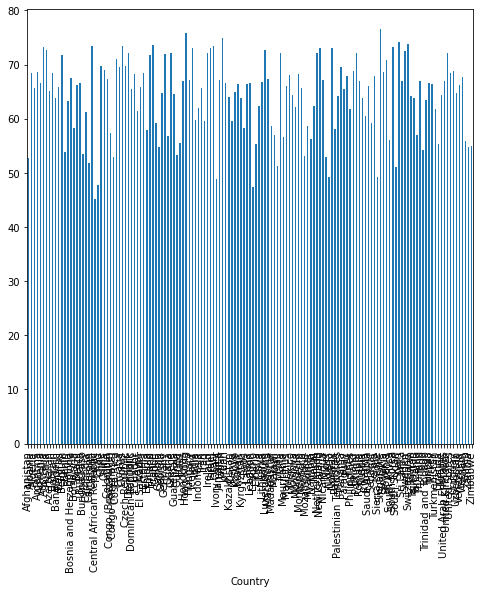

In [319]:
Health_mean.plot(kind="bar")

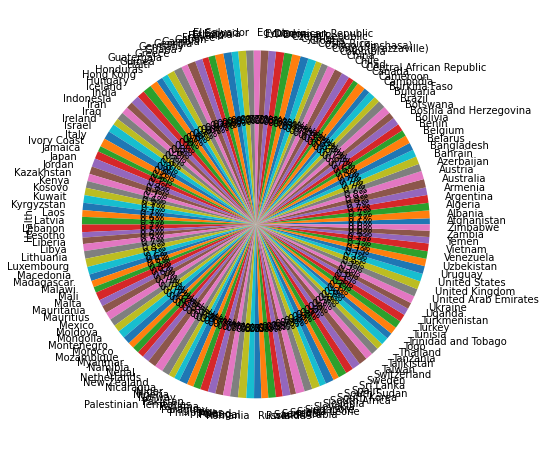

In [320]:
fig, ax = plt.subplots(figsize=(8,8))
Health_mean.plot(kind='pie', autopct='%1.1f%%')


In [321]:
data.groupby("Country").describe()["Freedom"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  0.427011  NaN  0.427011  0.427011  0.427011  0.427011   
Albania        1.0  0.749611  NaN  0.749611  0.749611  0.749611  0.749611   
Algeria        1.0  0.436670  NaN  0.436670  0.436670  0.436670  0.436670   
Argentina      1.0  0.831966  NaN  0.831966  0.831966  0.831966  0.831966   
Armenia        1.0  0.613697  NaN  0.613697  0.613697  0.613697  0.613697   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  0.635505  NaN  0.635505  0.635505  0.635505  0.635505   
Vietnam        1.0  0.780577  NaN  0.780577  0.780577  0.780577  0.780577   
Yemen          1.0  0.595191  NaN  0.595191  0.595191  0.595191  0.595191   
Zambia         1.0  0.823169  NaN  0.823169  0.823169  0.823169  0.823169   
Zimbabwe       1.0  0.752826  NaN  0.752826  0.752826  0.752826  0.752826   

                  max  
Country                
Afghanistan  0.427011  
Albania      0.749611  
Algeria      0.436670  
Argentina    0.831966  
Armenia      0.613697  
...               ...  
Venezuela    0.635505  
Vietnam      0.780577  
Yemen        0.595191  
Zambia       0.823169  
Zimbabwe     0.752826  

[147 rows x 8 columns]

In [322]:
Freedom_mean=data.groupby("Country").mean()["Freedom"]
Freedom_mean.sort_values()
# Il y a moins de liberté en Afghanistan

Country
Afghanistan             0.427011
Algeria                 0.436670
Greece                  0.438300
South Sudan             0.456011
Tunisia                 0.477957
                          ...   
Denmark                 0.955416
United Arab Emirates    0.962017
Finland                 0.962199
Cambodia                0.963775
Uzbekistan              0.985178
Name: Freedom, Length: 147, dtype: float64

In [323]:
Freedom_mean.sort_values(ascending=False)
# Il y a plus de liberté en Uzbekistan

Country
Uzbekistan              0.985178
Cambodia                0.963775
Finland                 0.962199
United Arab Emirates    0.962017
Denmark                 0.955416
                          ...   
Tunisia                 0.477957
South Sudan             0.456011
Greece                  0.438300
Algeria                 0.436670
Afghanistan             0.427011
Name: Freedom, Length: 147, dtype: float64

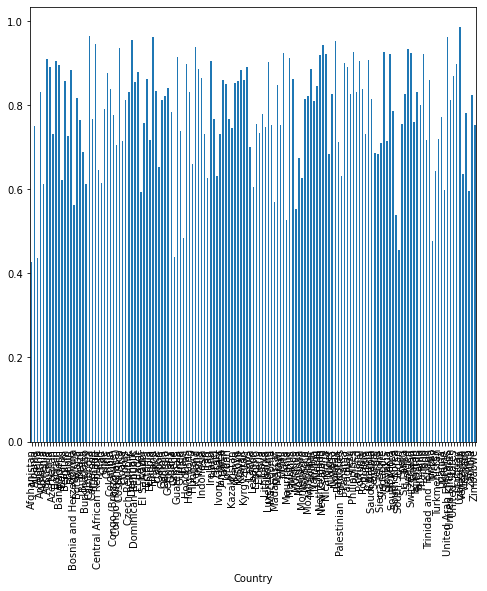

In [324]:
Freedom_mean.plot(kind="bar")

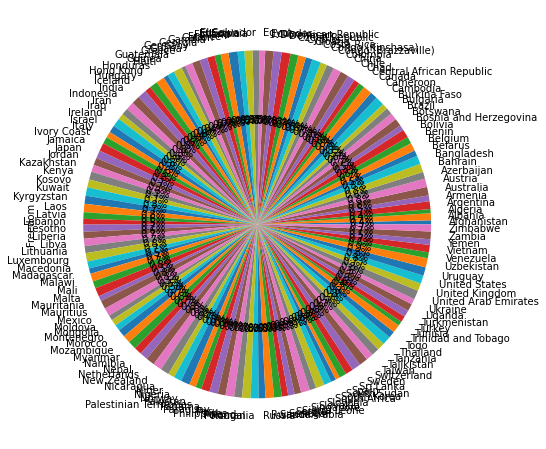

In [325]:
fig, ax = plt.subplots(figsize=(8,8))
Freedom_mean.plot(kind='pie', autopct='%1.1f%%')


In [326]:
data.groupby("Country").describe()["Generosity"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0 -0.112198  NaN -0.112198 -0.112198 -0.112198 -0.112198   
Albania        1.0 -0.032643  NaN -0.032643 -0.032643 -0.032643 -0.032643   
Algeria        1.0 -0.191522  NaN -0.191522 -0.191522 -0.191522 -0.191522   
Argentina      1.0 -0.182600  NaN -0.182600 -0.182600 -0.182600 -0.182600   
Armenia        1.0 -0.133958  NaN -0.133958 -0.133958 -0.133958 -0.133958   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0 -0.206035  NaN -0.206035 -0.206035 -0.206035 -0.206035   
Vietnam        1.0 -0.007056  NaN -0.007056 -0.007056 -0.007056 -0.007056   
Yemen          1.0 -0.007056  NaN -0.007056 -0.007056 -0.007056 -0.007056   
Zambia         1.0  0.128904  NaN  0.128904  0.128904  0.128904  0.128904   
Zimbabwe       1.0 -0.069670  NaN -0.069670 -0.069670 -0.069670 -0.069670   

                  max  
Country                
Afghanistan -0.112198  
Albania     -0.032643  
Algeria     -0.191522  
Argentina   -0.182600  
Armenia     -0.133958  
...               ...  
Venezuela   -0.206035  
Vietnam     -0.007056  
Yemen       -0.007056  
Zambia       0.128904  
Zimbabwe    -0.069670  

[147 rows x 8 columns]

In [327]:
Generosity_mean=data.groupby("Country").mean()["Generosity"]
Generosity_mean.sort_values()
# La Grèce est la moins généreuse

Country
Greece        -0.291227
Botswana      -0.253493
Gabon         -0.247074
Azerbaijan    -0.245216
Turkey        -0.242939
                 ...   
New Zealand    0.289706
Australia      0.308773
Haiti          0.380741
Indonesia      0.475461
Myanmar        0.629577
Name: Generosity, Length: 147, dtype: float64

In [328]:
Generosity_mean.sort_values(ascending=False)
# Le Myanmar est le plus généreux

Country
Myanmar        0.629577
Indonesia      0.475461
Haiti          0.380741
Australia      0.308773
New Zealand    0.289706
                 ...   
Turkey        -0.242939
Azerbaijan    -0.245216
Gabon         -0.247074
Botswana      -0.253493
Greece        -0.291227
Name: Generosity, Length: 147, dtype: float64

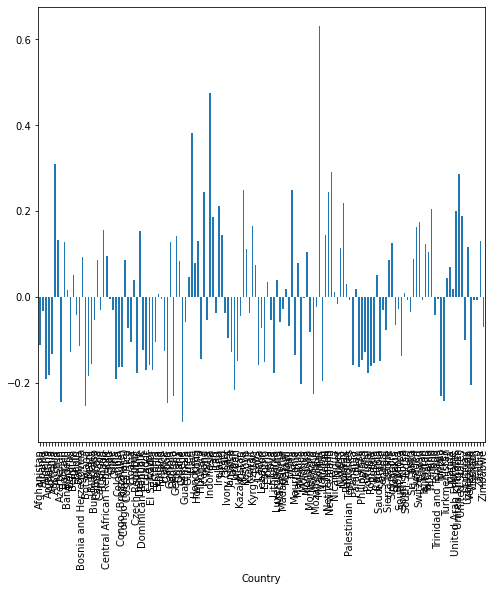

In [329]:
Generosity_mean.plot(kind="bar")

In [330]:
#fig, ax = plt.subplots(figsize=(8,8))
#Generosity_mean.plot(kind='pie', autopct='%1.1f%%')


In [331]:
data.groupby("Country").describe()["Corruption"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  0.954393  NaN  0.954393  0.954393  0.954393  0.954393   
Albania        1.0  0.876135  NaN  0.876135  0.876135  0.876135  0.876135   
Algeria        1.0  0.699774  NaN  0.699774  0.699774  0.699774  0.699774   
Argentina      1.0  0.841052  NaN  0.841052  0.841052  0.841052  0.841052   
Armenia        1.0  0.864683  NaN  0.864683  0.864683  0.864683  0.864683   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  0.843969  NaN  0.843969  0.843969  0.843969  0.843969   
Vietnam        1.0  0.782116  NaN  0.782116  0.782116  0.782116  0.782116   
Yemen          1.0  0.782116  NaN  0.782116  0.782116  0.782116  0.782116   
Zambia         1.0  0.739541  NaN  0.739541  0.739541  0.739541  0.739541   
Zimbabwe       1.0  0.751208  NaN  0.751208  0.751208  0.751208  0.751208   

                  max  
Country                
Afghanistan  0.954393  
Albania      0.876135  
Algeria      0.699774  
Argentina    0.841052  
Armenia      0.864683  
...               ...  
Venezuela    0.843969  
Vietnam      0.782116  
Yemen        0.782116  
Zambia       0.739541  
Zimbabwe     0.751208  

[147 rows x 8 columns]

In [332]:
Corruption_mean=data.groupby("Country").mean()["Corruption"]
Corruption_mean.sort_values()
# Singapour est le pays le moins corrompu

Country
Singapore      0.161791
Denmark        0.181148
Finland        0.192413
Rwanda         0.213757
New Zealand    0.221887
                 ...   
Kosovo         0.925192
Romania        0.925658
Moldova        0.926334
Ukraine        0.936764
Afghanistan    0.954393
Name: Corruption, Length: 147, dtype: float64

In [333]:
Corruption_mean.sort_values(ascending=False)
# L'Afghanistan est le pays le plus corrompu

Country
Afghanistan    0.954393
Ukraine        0.936764
Moldova        0.926334
Romania        0.925658
Kosovo         0.925192
                 ...   
New Zealand    0.221887
Rwanda         0.213757
Finland        0.192413
Denmark        0.181148
Singapore      0.161791
Name: Corruption, Length: 147, dtype: float64

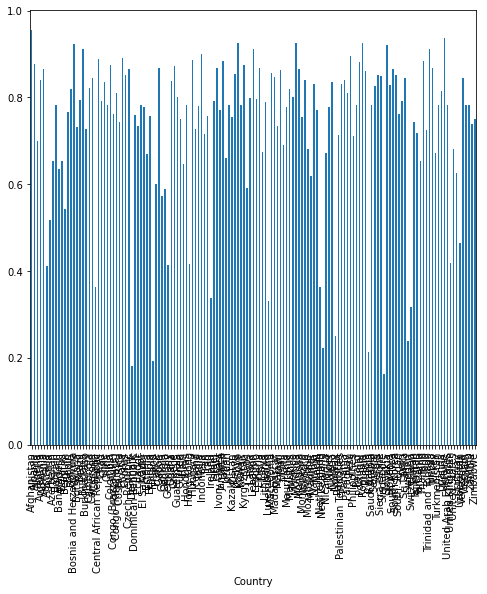

In [334]:
Corruption_mean.plot(kind="bar")

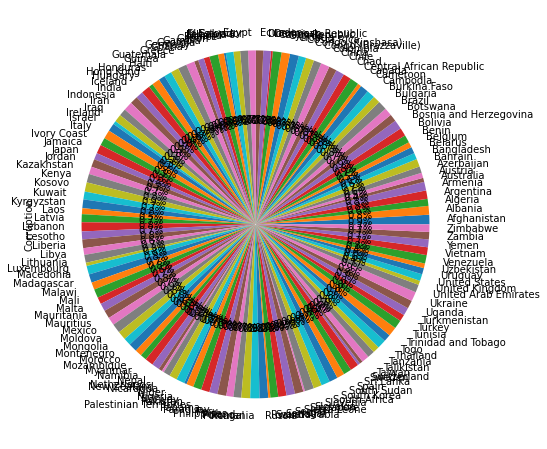

In [335]:
fig, ax = plt.subplots(figsize=(8,8))
Corruption_mean.plot(kind='pie', autopct='%1.1f%%')


In [336]:
data.groupby("Country").describe()["PositiveAffect"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  0.496349  NaN  0.496349  0.496349  0.496349  0.496349   
Albania        1.0  0.669241  NaN  0.669241  0.669241  0.669241  0.669241   
Algeria        1.0  0.641980  NaN  0.641980  0.641980  0.641980  0.641980   
Argentina      1.0  0.809423  NaN  0.809423  0.809423  0.809423  0.809423   
Armenia        1.0  0.625014  NaN  0.625014  0.625014  0.625014  0.625014   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  0.725643  NaN  0.725643  0.725643  0.725643  0.725643   
Vietnam        1.0  0.704992  NaN  0.704992  0.704992  0.704992  0.704992   
Yemen          1.0  0.455182  NaN  0.455182  0.455182  0.455182  0.455182   
Zambia         1.0  0.684623  NaN  0.684623  0.684623  0.684623  0.684623   
Zimbabwe       1.0  0.806428  NaN  0.806428  0.806428  0.806428  0.806428   

                  max  
Country                
Afghanistan  0.496349  
Albania      0.669241  
Algeria      0.641980  
Argentina    0.809423  
Armenia      0.625014  
...               ...  
Venezuela    0.725643  
Vietnam      0.704992  
Yemen        0.455182  
Zambia       0.684623  
Zimbabwe     0.806428  

[147 rows x 8 columns]

In [337]:
PositiveAffect_mean=data.groupby("Country").mean()["PositiveAffect"]
PositiveAffect_mean.sort_values()
# La Tunisie a le moins d'effet positif

Country
Tunisia        0.420962
Turkey         0.449801
Yemen          0.455182
Afghanistan    0.496349
Macedonia      0.502460
                 ...   
Canada         0.862773
Laos           0.872792
Costa Rica     0.874396
Iceland        0.895255
Paraguay       0.902772
Name: PositiveAffect, Length: 147, dtype: float64

In [338]:
PositiveAffect_mean.sort_values(ascending=False)
# Le Paraguay a le plus d'effet positif

Country
Paraguay       0.902772
Iceland        0.895255
Costa Rica     0.874396
Laos           0.872792
Canada         0.862773
                 ...   
Macedonia      0.502460
Afghanistan    0.496349
Yemen          0.455182
Turkey         0.449801
Tunisia        0.420962
Name: PositiveAffect, Length: 147, dtype: float64

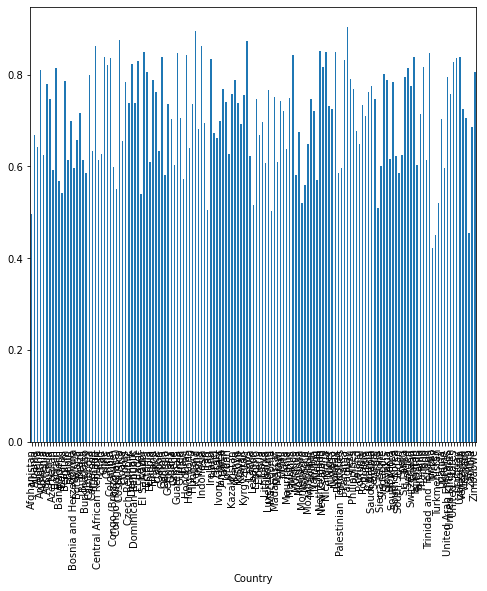

In [339]:
PositiveAffect_mean.plot(kind="bar")

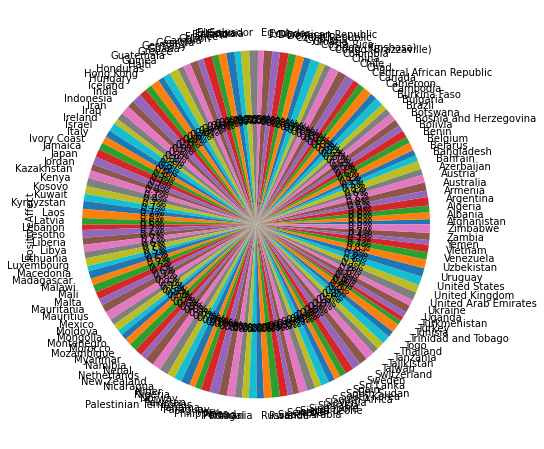

In [340]:
fig, ax = plt.subplots(figsize=(8,8))
PositiveAffect_mean.plot(kind='pie', autopct='%1.1f%%')


In [341]:
data.groupby("Country").describe()["NegativeAffect"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  0.371326  NaN  0.371326  0.371326  0.371326  0.371326   
Albania        1.0  0.333884  NaN  0.333884  0.333884  0.333884  0.333884   
Algeria        1.0  0.288710  NaN  0.288710  0.288710  0.288710  0.288710   
Argentina      1.0  0.291717  NaN  0.291717  0.291717  0.291717  0.291717   
Armenia        1.0  0.437149  NaN  0.437149  0.437149  0.437149  0.437149   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  0.362985  NaN  0.362985  0.362985  0.362985  0.362985   
Vietnam        1.0  0.279024  NaN  0.279024  0.279024  0.279024  0.279024   
Yemen          1.0  0.295064  NaN  0.295064  0.295064  0.295064  0.295064   
Zambia         1.0  0.387189  NaN  0.387189  0.387189  0.387189  0.387189   
Zimbabwe       1.0  0.224051  NaN  0.224051  0.224051  0.224051  0.224051   

                  max  
Country                
Afghanistan  0.371326  
Albania      0.333884  
Algeria      0.288710  
Argentina    0.291717  
Armenia      0.437149  
...               ...  
Venezuela    0.362985  
Vietnam      0.279024  
Yemen        0.295064  
Zambia       0.387189  
Zimbabwe     0.224051  

[147 rows x 8 columns]

In [342]:
NegativeAffect_mean=data.groupby("Country").mean()["NegativeAffect"]
NegativeAffect_mean.sort_values()
# Taiwan a le moins d'effet négatif

Country
Taiwan                      0.114123
Iceland                     0.148160
Estonia                     0.160164
Kyrgyzstan                  0.160438
Mauritius                   0.168721
                              ...   
Sierra Leone                0.495040
South Sudan                 0.517364
Chad                        0.538245
Iraq                        0.590539
Central African Republic    0.599335
Name: NegativeAffect, Length: 147, dtype: float64

In [343]:
NegativeAffect_mean.sort_values(ascending=False)
# La République Centre Afrique a le plus d'effet négatif

Country
Central African Republic    0.599335
Iraq                        0.590539
Chad                        0.538245
South Sudan                 0.517364
Sierra Leone                0.495040
                              ...   
Mauritius                   0.168721
Kyrgyzstan                  0.160438
Estonia                     0.160164
Iceland                     0.148160
Taiwan                      0.114123
Name: NegativeAffect, Length: 147, dtype: float64

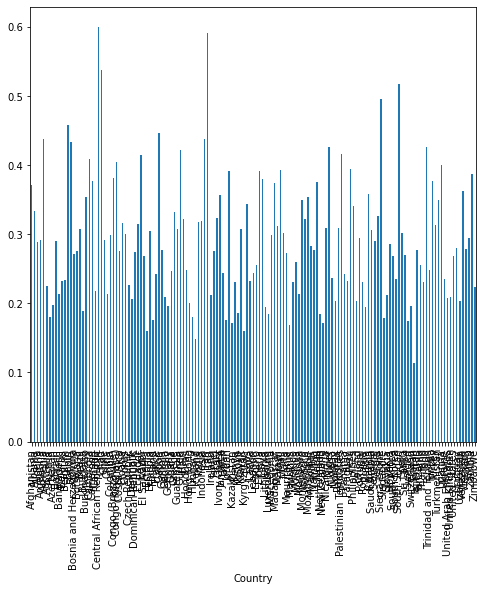

In [344]:
NegativeAffect_mean.plot(kind="bar")

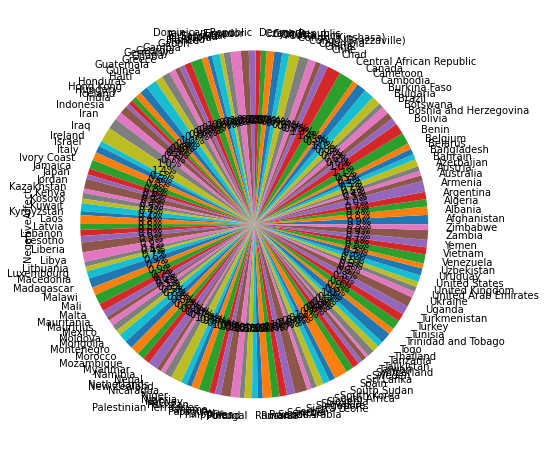

In [345]:
fig, ax = plt.subplots(figsize=(8,8))
NegativeAffect_mean.plot(kind='pie', autopct='%1.1f%%')


In [346]:
data.groupby("Country").describe()["ConfidenceInGovernment"]

count      mean  std       min       25%       50%       75%  \
Country                                                                     
Afghanistan    1.0  0.261179  NaN  0.261179  0.261179  0.261179  0.261179   
Albania        1.0  0.457738  NaN  0.457738  0.457738  0.457738  0.457738   
Algeria        1.0  0.502155  NaN  0.502155  0.502155  0.502155  0.502155   
Argentina      1.0  0.305430  NaN  0.305430  0.305430  0.305430  0.305430   
Armenia        1.0  0.246901  NaN  0.246901  0.246901  0.246901  0.246901   
...            ...       ...  ...       ...       ...       ...       ...   
Venezuela      1.0  0.241124  NaN  0.241124  0.241124  0.241124  0.241124   
Vietnam        1.0  0.502155  NaN  0.502155  0.502155  0.502155  0.502155   
Yemen          1.0  0.247787  NaN  0.247787  0.247787  0.247787  0.247787   
Zambia         1.0  0.717004  NaN  0.717004  0.717004  0.717004  0.717004   
Zimbabwe       1.0  0.682647  NaN  0.682647  0.682647  0.682647  0.682647   

                  max  
Country                
Afghanistan  0.261179  
Albania      0.457738  
Algeria      0.502155  
Argentina    0.305430  
Armenia      0.246901  
...               ...  
Venezuela    0.241124  
Vietnam      0.502155  
Yemen        0.247787  
Zambia       0.717004  
Zimbabwe     0.682647  

[147 rows x 8 columns]

In [347]:
ConfidenceInGovernment_mean=data.groupby("Country").mean()["ConfidenceInGovernment"]
ConfidenceInGovernment_mean.sort_values()
# L'Ukraine a le moins confiance dans leur gouvernement

Country
Ukraine                   0.110937
Bosnia and Herzegovina    0.126380
Moldova                   0.132730
Greece                    0.139881
Brazil                    0.165490
                            ...   
Tanzania                  0.913339
Singapore                 0.926998
Tajikistan                0.929793
Uzbekistan                0.964690
Rwanda                    0.981398
Name: ConfidenceInGovernment, Length: 147, dtype: float64

In [348]:
ConfidenceInGovernment_mean.sort_values(ascending=False)
# Le Rwanda a le plus confiance dans son gouvernement

Country
Rwanda                    0.981398
Uzbekistan                0.964690
Tajikistan                0.929793
Singapore                 0.926998
Tanzania                  0.913339
                            ...   
Brazil                    0.165490
Greece                    0.139881
Moldova                   0.132730
Bosnia and Herzegovina    0.126380
Ukraine                   0.110937
Name: ConfidenceInGovernment, Length: 147, dtype: float64

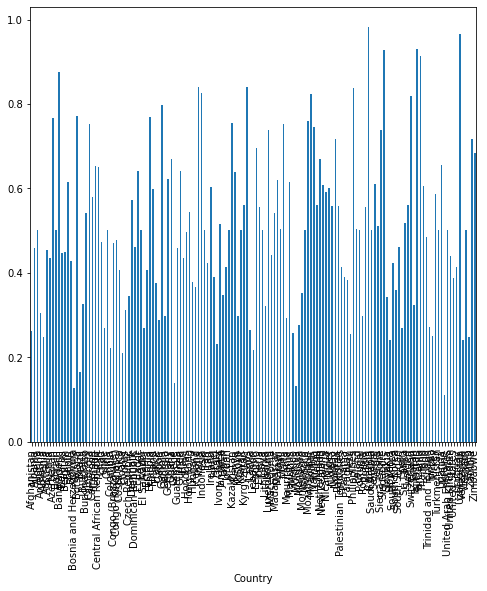

In [349]:
ConfidenceInGovernment_mean.plot(kind="bar")

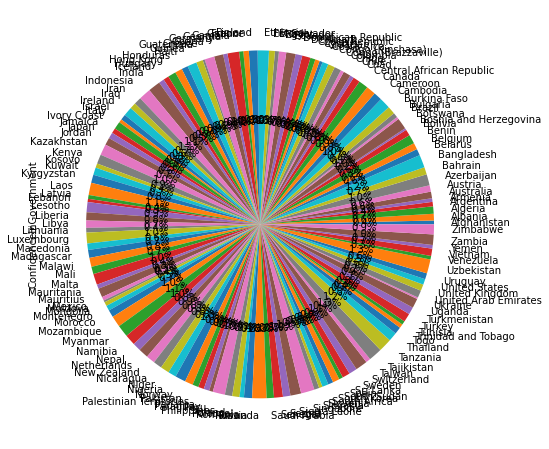

In [350]:
fig, ax = plt.subplots(figsize=(8,8))
ConfidenceInGovernment_mean.plot(kind='pie', autopct='%1.1f%%')


In [351]:
# ANOVA

In [352]:
def model(float, objet):
    model = ols('float ~objet', data=data).fit()
    anova_table = sm.stats.anova_lm(model)
    p_value=anova_table["PR(>F)"][0]
    if p_value > 0.05:
      print("les variables sont indépendantes")
    else :
      print("les variables sont dépendantes")
    print(anova_table)

In [353]:
model(data.Happiness, data.Country)

les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  1.900212e+02  1.301515  0.0     NaN
Residual    0.0  3.344159e-26       inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [354]:
model(data.GDP, data.Country)

les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  2.044729e+02  1.400499  0.0     NaN
Residual    0.0  9.900757e-26       inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [355]:
model(data.SocialSupport, data.Country)

les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  2.164756e+00  0.014827  0.0     NaN
Residual    0.0  7.060490e-28       inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [356]:
model(data.Health, data.Country)

les variables sont dépendantes
             df        sum_sq    mean_sq    F  PR(>F)
objet     146.0  7.278121e+03  49.850141  0.0     NaN
Residual    0.0  5.600988e-24        inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [357]:
model(data.Freedom, data.Country)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  2.351313e+00  0.016105  0.0     NaN
Residual    0.0  8.036582e-28       inf  NaN     NaN


In [358]:
model(data.Generosity, data.Country)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  3.536662e+00  0.024224  0.0     NaN
Residual    0.0  3.160923e-29       inf  NaN     NaN


In [359]:
model(data.Corruption, data.Country)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  4.611990e+00  0.031589  0.0     NaN
Residual    0.0  7.280015e-28       inf  NaN     NaN


In [360]:
model(data.PositiveAffect, data.Country)

les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  1.706904e+00  0.011691  0.0     NaN
Residual    0.0  6.314585e-28       inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [361]:
model(data.NegativeAffect, data.Country)

les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  1.190639e+00  0.008155  0.0     NaN
Residual    0.0  1.483392e-28       inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [362]:
model(data.ConfidenceInGovernment, data.Country)

les variables sont dépendantes
             df        sum_sq   mean_sq    F  PR(>F)
objet     146.0  5.533513e+00  0.037901  0.0     NaN
Residual    0.0  4.254071e-28       inf  NaN     NaN


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [363]:
# 2. Standardisez ou mettez aux mêmes échelles vos données  si besoin

In [364]:
X=data_quanti

In [365]:
# SEM: Standart Error of Mean
X.sem()

Happiness                 0.094095
GDP                       0.097607
SocialSupport             0.010043
Health                    0.582337
Freedom                   0.010467
Generosity                0.012837
Corruption                0.014659
PositiveAffect            0.008918
NegativeAffect            0.007448
ConfidenceInGovernment    0.016057
dtype: float64

In [366]:
# Standardisation

XX=(X-X.mean())/X.std()

In [367]:
XX.head()

Happiness       GDP  SocialSupport    Health   Freedom  Generosity  \
0  -2.453196 -1.521423      -2.581039 -1.613342 -2.786069   -0.675548   
1  -0.719534  0.065824      -1.375304  0.596145 -0.244010   -0.164396   
2  -0.185398  0.204822       0.013054  0.213733 -2.709952   -1.185211   
3   0.507441  0.465142       0.833847  0.624471  0.404941   -1.127885   
4  -1.027914 -0.183495      -0.880697  0.341204 -1.314999   -0.815355   

   Corruption  PositiveAffect  NegativeAffect  ConfidenceInGovernment  
0    1.244764       -1.929646        0.887859           -1.237802e+00  
1    0.804452       -0.330649        0.473243           -2.281566e-01  
2   -0.187826       -0.582775       -0.026994           -5.702774e-16  
3    0.607065        0.965823        0.006306           -1.010498e+00  
4    0.740022       -0.739684        1.616748           -1.311140e+00

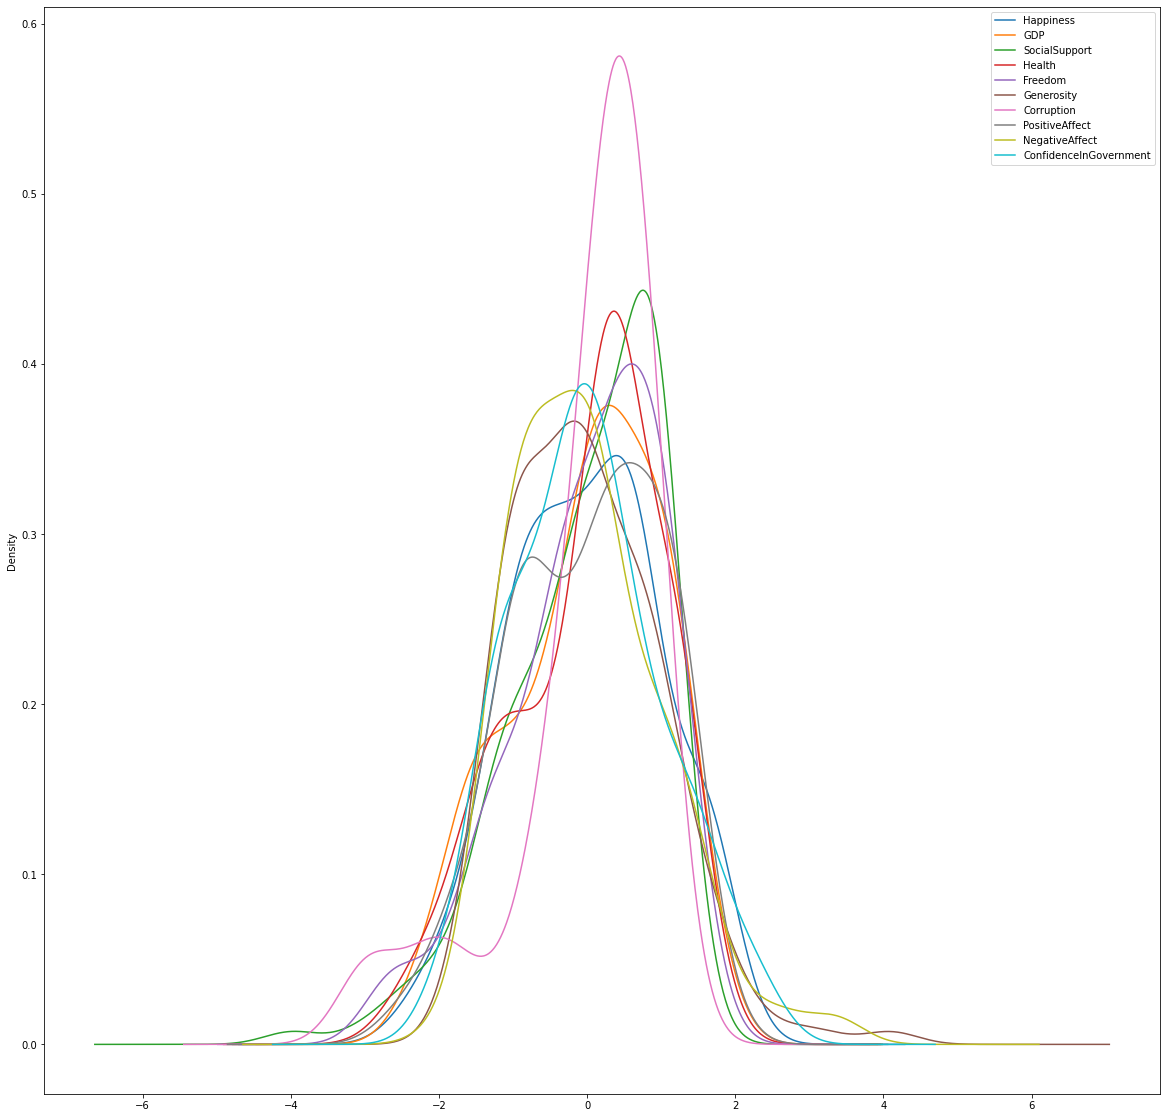

In [368]:
XX.plot(kind='density', subplots=False, layout=(5,7), sharex=True, sharey=True, figsize=(20,20))
plt.show()

In [369]:
XX.mean()

Happiness                -7.099385e-17
GDP                       1.850372e-15
SocialSupport            -6.480077e-16
Health                    4.984675e-16
Freedom                  -1.623796e-16
Generosity               -1.963660e-17
Corruption               -7.656385e-17
PositiveAffect            4.569285e-16
NegativeAffect            4.758099e-17
ConfidenceInGovernment   -2.998357e-16
dtype: float64

In [370]:
erreur_type2= np.std(XX)/np.sqrt(XX.shape[0])
erreur_type2

# Les données sont toutes à la même échelle

Happiness                 0.082198
GDP                       0.082198
SocialSupport             0.082198
Health                    0.082198
Freedom                   0.082198
Generosity                0.082198
Corruption                0.082198
PositiveAffect            0.082198
NegativeAffect            0.082198
ConfidenceInGovernment    0.082198
dtype: float64

In [371]:
# 3. Effectuez une analyse en composantes principales avec les
# principales variables caractéristiques des pays et interprétez l'ensemble de
# vos résultats. Combien de variables sont  importantes dans votre étude? . Justifiez.

In [372]:
# PCA

In [373]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.decomposition import PCA


In [374]:
#Centrage et réduction

X_scaled = scaler.fit_transform(X)

In [375]:
X_scaled

array([[-2.46158294e+00, -1.52662409e+00, -2.58986338e+00, ...,
        -1.93624287e+00,  8.90894172e-01, -1.24203390e+00],
       [-7.21994133e-01,  6.60493399e-02, -1.38000615e+00, ...,
        -3.31779535e-01,  4.74860611e-01, -2.28936614e-01],
       [-1.86031609e-01,  2.05522194e-01,  1.30982956e-02, ...,
        -5.84767548e-01, -2.70866443e-02, -5.72227099e-16],
       ...,
       [-1.94103187e+00,  0.00000000e+00, -1.28629112e-01, ...,
        -2.31827486e+00,  4.35102488e-02, -1.31105608e+00],
       [-1.34363029e+00, -9.20021409e-01, -5.06053625e-01, ...,
        -1.89028777e-01,  1.06715096e+00,  1.10736545e+00],
       [-1.60263599e+00, -1.48275723e+00, -4.20408814e-01, ...,
         9.41338135e-01, -7.45534957e-01,  9.30281950e-01]])

In [376]:
X_scaled.shape

(147, 10)

In [377]:
#Instanciation de l'ACP
# pca = PCA(svd_solver='full').fit(X_scaled) # où sont calculés PCA1 et PCA2? pas besoin du Scree Plot ?
# X_projected = pca.transform(X_scaled)

In [378]:
pca = PCA(n_components=2)     # PCA en 2 dimensions

In [379]:
X_pca = pca.fit_transform(X_scaled)

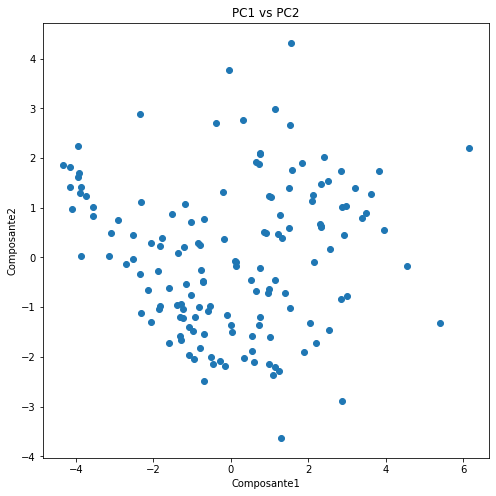

In [380]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('Composante1')
plt.ylabel('Composante2')
plt.title('PC1 vs PC2')
plt.show()

In [381]:
print(pca.explained_variance_ratio_)
# Col 1 = 46% de données utiles
# Col 2 = 22% de données utiles

[0.46364345 0.21775115]


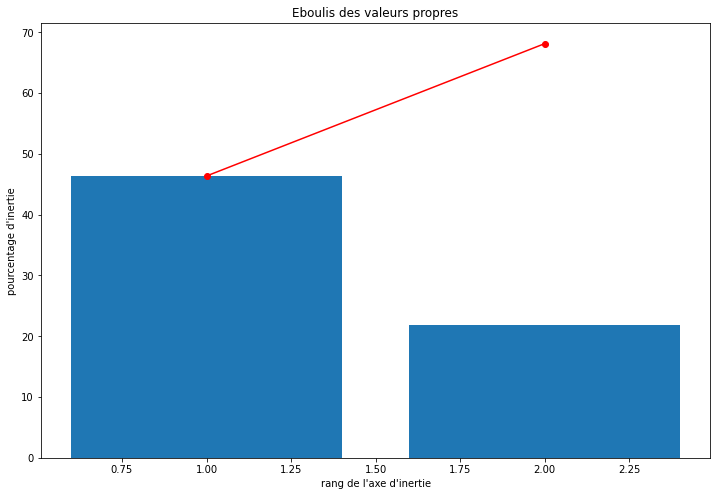

In [382]:
#Variances expliquées
varexpl = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [383]:
#pip install mlxtend
#from mlxtend.plotting import plot_pca_correlation_graph
#from sklearn.preprocessing import StandardScaler

# Using the pca above computed (PC1, PC2)

#fig, correlation_matrix = plot_pca_correlation_graph(
    #X_scaled[0:147], 
    #X.columns,
    #dimensions=(1, 2),
    #figure_axis_size=6
#)
#correlation_matrix

In [384]:
X_pcadf=pd.DataFrame(data=X_pca,columns=['pca1','pca2'])

In [385]:
X_pcadf.head()

pca1      pca2
0  5.386918 -1.322872
1  1.148312 -0.444351
2  1.019801 -1.602534
3 -1.069674 -1.402076
4  2.200229 -1.715798

In [386]:
# finaldf=pd.concat([X_pcadf, data[["Country"]]], axis=1)

In [387]:
finaldf=pd.concat([X_pcadf, data["Country"]], axis=1)

In [388]:
finaldf

pca1      pca2      Country
0    5.386918 -1.322872  Afghanistan
1    1.148312 -0.444351      Albania
2    1.019801 -1.602534      Algeria
3   -1.069674 -1.402076    Argentina
4    2.200229 -1.715798      Armenia
..        ...       ...          ...
142  0.589417 -2.095567    Venezuela
143  0.116570 -0.070141      Vietnam
144  2.537761 -1.449131        Yemen
145  1.839524  1.906326       Zambia
146  1.494757  1.396904     Zimbabwe

[147 rows x 3 columns]

In [389]:
import plotly.express as px

In [390]:
fig = px.scatter(finaldf, x='pca1', y='pca2', color=data["Country"])
fig.show()

In [391]:
# Avec 100% des données conservées par le PCA

In [392]:
pca2 = PCA(svd_solver='full')

In [393]:
X_pca2 = pca2.fit_transform(X_scaled)

In [394]:
X_pca2.shape

(147, 10)

In [395]:
X_pca2

array([[ 5.38691769, -1.32287206,  0.72554528, ...,  0.37124045,
         0.06623494,  0.26078171],
       [ 1.14831161, -0.44435129,  0.03999945, ...,  0.7478834 ,
         0.21908281, -0.11488731],
       [ 1.01980102, -1.6025338 ,  1.22621801, ...,  0.7829884 ,
         0.86999041, -0.6165385 ],
       ...,
       [ 2.53776114, -1.44913127,  1.45885951, ..., -0.088471  ,
        -1.17969362,  0.9402507 ],
       [ 1.83952386,  1.90632644, -0.05217163, ...,  0.16170319,
        -0.54655271,  0.20502685],
       [ 1.49475666,  1.39690393, -1.16579656, ...,  0.5238588 ,
        -0.37447966, -0.2075125 ]])

In [396]:
pca2.explained_variance_ratio_
# col1 = 46 % de données utiles
# col2 = 22 % de données utiles
# col3 = 9 % de données utiles
# col4 = 7 % de données utiles
# col5 = 5 % de données utiles
# col6 = 3 % de données utiles
# col7 = 3 % de données utiles
# col8 = 2 % de données utiles
# col9 = 2 % de données utiles
# col10= 1 % de données utiles

# Il est logique de faire le PCA en 2 dimensions car col1 et col2 on les variances les plus élevées.

array([0.46364345, 0.21775115, 0.08622828, 0.06636637, 0.05228083,
       0.03474515, 0.02588438, 0.02245485, 0.01596818, 0.01467736])

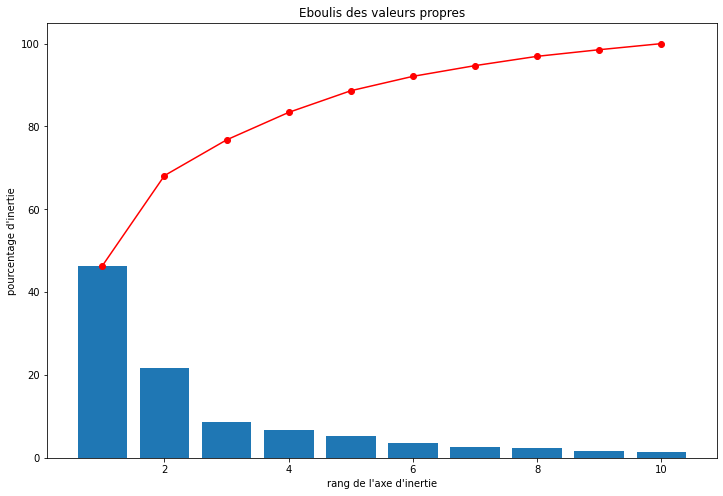

In [397]:
#Variances expliquées
varexpl = pca2.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

# La courbe monte de façon importante entre les deux premières valeurs sonc nous allons utilisé ces deux dernières.

In [398]:
# 4. Effectuez un algorithme de clustering k-means avec un
# nombre de cluster de 4. Interprétez vos résultats.

In [399]:
from sklearn.cluster import KMeans

In [400]:
cluster_model = KMeans(n_clusters= 4)
cluster_model.fit(X_pca)
clusters = cluster_model.predict(X_pca)

In [401]:
clusters

array([2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 3, 0, 2, 2, 0, 1, 1, 0, 0, 0, 3,
       0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 0, 3, 1, 2, 0,
       2, 3, 0, 2, 1, 0, 0, 1, 1, 1, 3, 0, 0, 0, 2, 3, 1, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 3, 2, 0, 0, 0, 3, 2, 1, 1, 2,
       1, 2, 2, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 2, 0, 3, 1, 1, 2, 1, 0, 1, 1, 3, 3, 1, 0, 0, 1, 0, 1,
       2, 2, 2, 0, 2, 3, 3, 3, 1, 3, 2, 1, 2, 0, 0], dtype=int32)

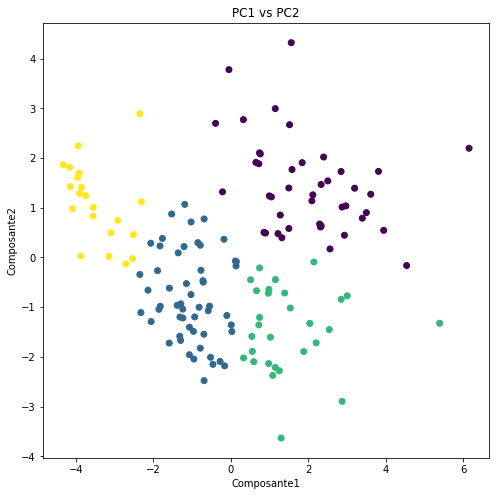

In [402]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters)
plt.xlabel('Composante1')
plt.ylabel('Composante2')
plt.title('PC1 vs PC2')
plt.show()

# La figure nous montre 4 clusters. L'algorithme a formé ces clusters en étudiant les similitudes des données. 
# Chaque clusters regroupent des données similaires entre elles.

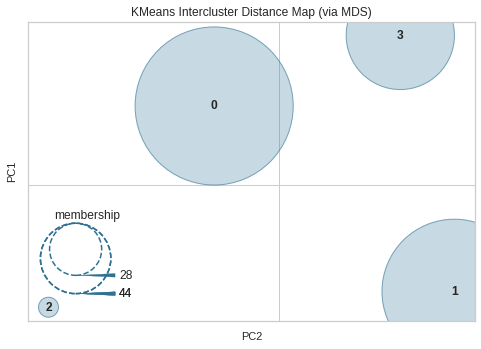

In [403]:
# Distance entre les 4 clusters:

from yellowbrick.cluster import InterclusterDistance


model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        
visualizer.show()  



In [405]:
from yellowbrick.cluster import KElbowVisualizer

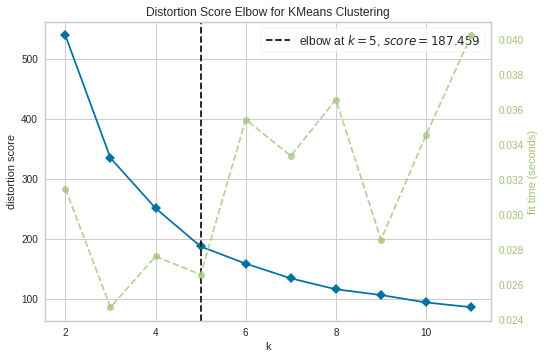

In [406]:
kmeans = KMeans()
visualiser = KElbowVisualizer(kmeans, k= (2,12))
visualiser.fit(X_pca)
visualiser.show()

# Le meilleur cluster est 5 (k=5)
# Dès que K augmente, il y a la formation d'un coude sur la courbe du clustering ce qui explique
# qu'à partir de ce coude, le clustering ne s'améliore plus.

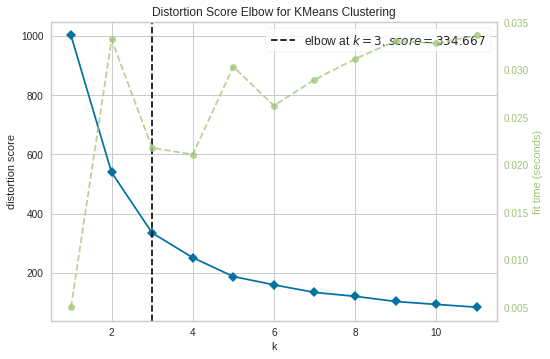

In [407]:
kmeans2 = KMeans()
visualiser = KElbowVisualizer(kmeans2, k= (1,12))
visualiser.fit(X_pca)
visualiser.show()

# Le meilleur cluster est 3 (k=3)
# Dès que K augmente, il y a la formation d'un coude sur la courbe du clustering ce qui explique
# qu'à partir de ce coude, le clustering ne s'améliore plus.

In [408]:
# Pour Kmeans:
# Création d'un cluster de 5
cluster_model5 = KMeans(n_clusters= 5)
cluster_model5.fit(X_pca)
clusters5 = cluster_model5.predict(X_pca)

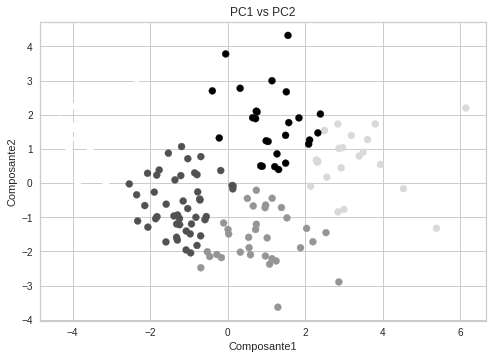

In [409]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters5)
plt.xlabel('Composante1')
plt.ylabel('Composante2')
plt.title('PC1 vs PC2')
plt.show()

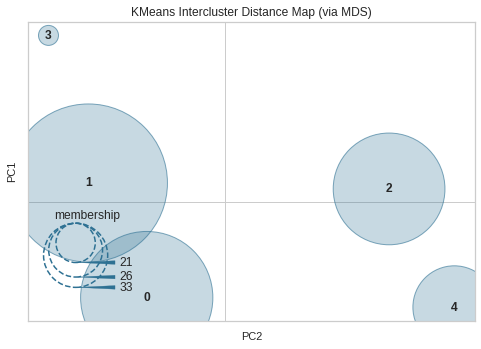

In [410]:
# Distance entre les 5 clusters:

from yellowbrick.cluster import InterclusterDistance


model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        
visualizer.show()  

 

In [411]:
# Pour Kmeans 2:
# Création d'un cluster de 3
cluster_model3 = KMeans(n_clusters= 3)      
cluster_model3.fit(X_pca)
clusters3 = cluster_model3.predict(X_pca)

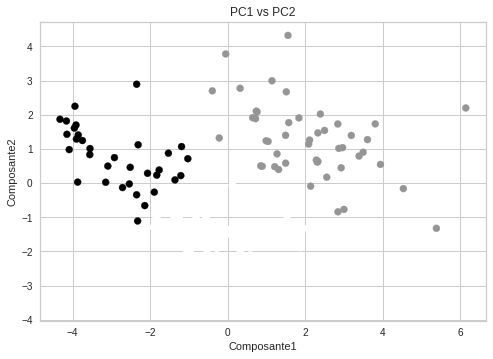

In [412]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters3)
plt.xlabel('Composante1')
plt.ylabel('Composante2')
plt.title('PC1 vs PC2')
plt.show()



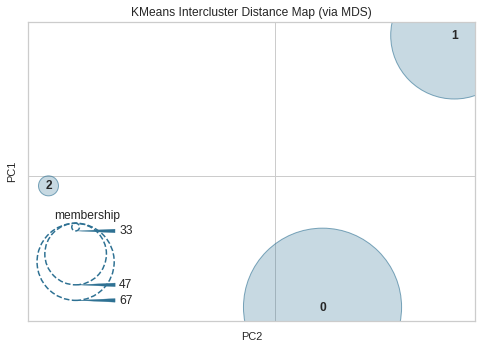

In [413]:
# Distance entre les 3 clusters:

model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        
visualizer.show()     



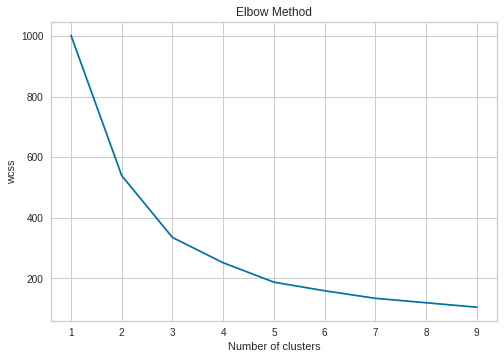

In [414]:
# elbow method pour trouver le nombre optimal de cluster
from sklearn.cluster import KMeans
n=10
wcss = []
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit(X_pca)
    wcss.append(km.inertia_)
plt.plot(range(1,n),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

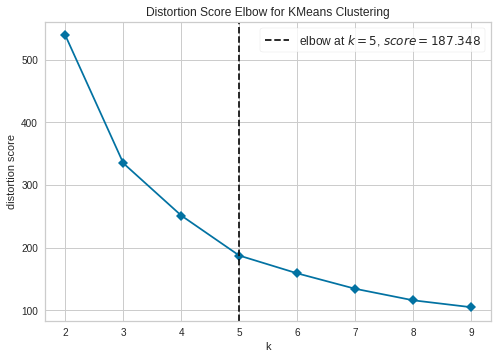

In [415]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(X_pca)        
visualizer.show()        
# Le cluster optimal est de 5

In [416]:
#7. Même question avec un algorithme de clustering
#hiérarchique

In [417]:
# X_scaled -> valeurs normalisée


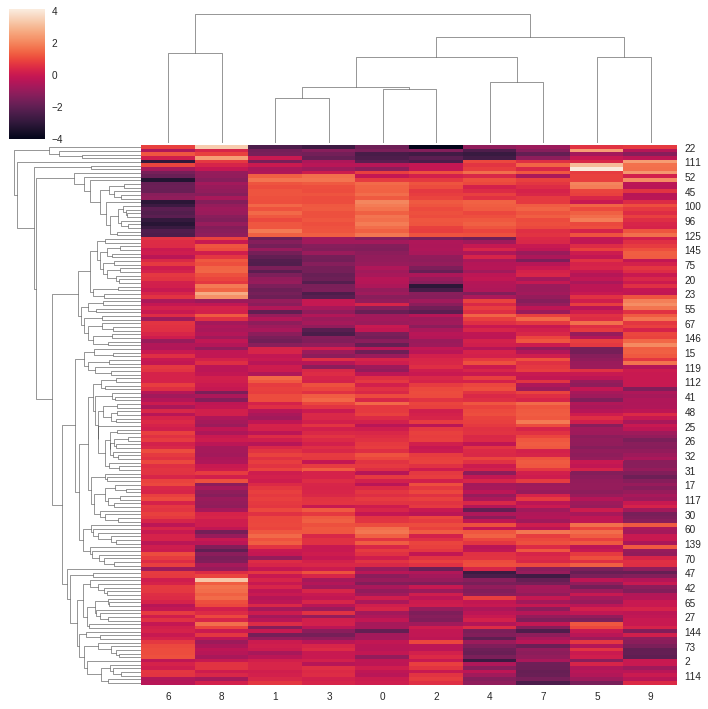

In [418]:
C = sns.clustermap( X_scaled)

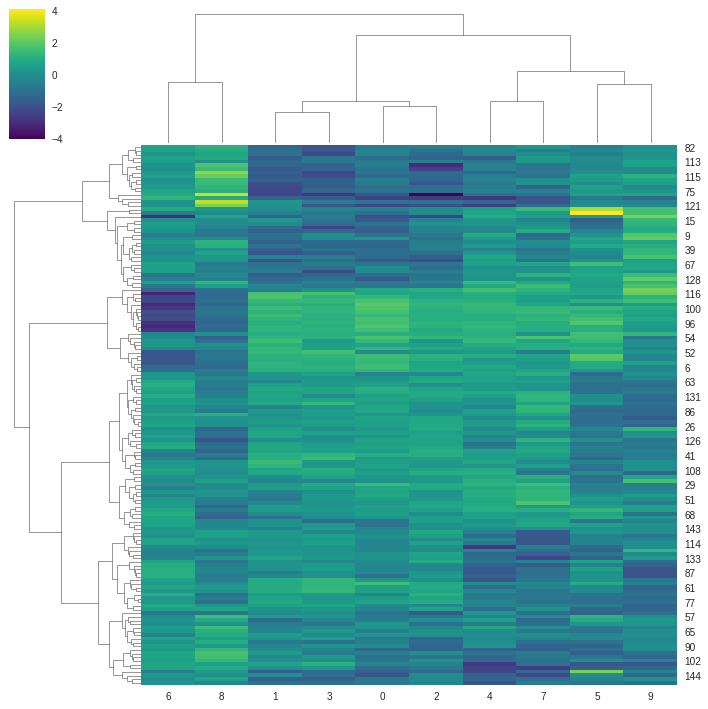

In [419]:
sns.clustermap(X_scaled, cmap = 'viridis', method = 'ward')

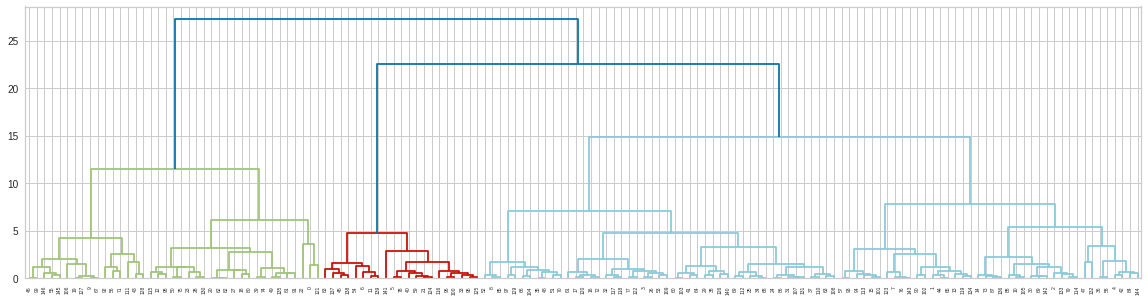

In [420]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Utilisation de la méthode de Ward qui permet d'agréger les classe ce qui minimise la diminution de l'inertie inter. Le dendogramme sera beaucoup plus lisible qu'une autre méthode comme le saut minimum.

plt.figure(figsize=(20,5))
dend = dendrogram(linkage(X_pca, method='ward'))

# Suite à la clusturisation hiérarchique, nous nous apercevons qu'il y a la formation de 3 clusters.

In [421]:
# 8. Détectez les 5% des pays qui pourraient être considérés comme une anomalie, interprétez.


In [422]:
from sklearn.ensemble import IsolationForest


X['anomaly']= IsolationForest(contamination=0.05).fit(X).predict(X)
X['anomaly'].value_counts()

# 8 pays représentent les 5% d'anomalies

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 1    139
-1      8
Name: anomaly, dtype: int64

In [423]:
outliers=X.loc[X['anomaly']==-1]
outliers

Happiness        GDP  SocialSupport     Health   Freedom  Generosity  \
0     2.661718   7.497755       0.490880  52.799999  0.427011   -0.112198   
22    3.475862   6.494117       0.319589  45.200001  0.645252    0.093754   
50    3.823866   7.410451       0.646985  55.500000  0.484429    0.380741   
54    7.476214  10.746841       0.966753  73.000000  0.938783    0.243324   
111   3.108374   7.525215       0.516550  60.500000  0.908115    0.050675   
116   6.378438  11.356686       0.897350  76.500000  0.926128    0.125963   
121   2.816622   9.298247       0.556823  51.000000  0.456011   -0.007056   
141   6.421448   8.740833       0.942131  64.800003  0.985178    0.116511   

     Corruption  PositiveAffect  NegativeAffect  ConfidenceInGovernment  \
0      0.954393        0.496349        0.371326                0.261179   
22     0.889566        0.613865        0.599335                0.650285   
50     0.647192        0.573367        0.321693                0.435077   
54     0.726845        0.895255        0.148160                0.365042   
111    0.213757        0.762161        0.358310                0.981398   
116    0.161791        0.800114        0.179325                0.926998   
121    0.761270        0.585602        0.517364                0.461551   
141    0.464642        0.838989        0.202737                0.964690   

     anomaly  
0         -1  
22        -1  
50        -1  
54        -1  
111       -1  
116       -1  
121       -1  
141       -1

In [424]:
X.groupby("anomaly").mean()/X.mean()

# Les anomalies peuvent considérées les pays comme étant confiant dans leur gouvernement, affectés négativement, 

ConfidenceInGovernment  Corruption   Freedom       GDP  Generosity  \
anomaly                                                                       
-1                     1.256140    0.821695  0.924141  0.928537  -15.796578   
 1                     0.985258    1.010262  1.004366  1.004113    1.966710   

         Happiness    Health  NegativeAffect  PositiveAffect  SocialSupport  \
anomaly                                                                       
-1        0.827833  0.933348        1.158454        0.986837       0.828567   
 1        1.009909  1.003836        0.990880        1.000758       1.009867   

         anomaly  
anomaly           
-1           NaN  
 1           NaN

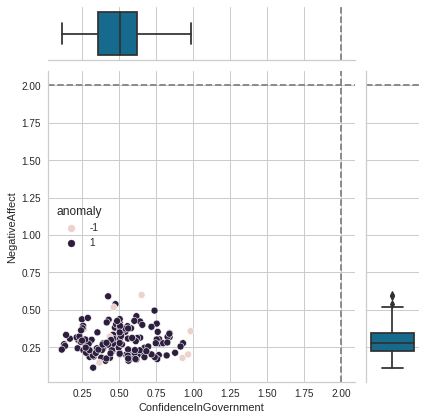

In [425]:
g = sns.JointGrid(data=X, x="ConfidenceInGovernment", y="NegativeAffect", hue="anomaly")
g.plot(sns.scatterplot, sns.boxplot) 
g.refline(x=2, y=2)


In [426]:
# 9. Documentez vous sur folium et affichez une carte du monde avec la variable happiness


In [427]:
import folium
import os

In [428]:
df = pd.DataFrame({'Country': data.Country, 'Happiness': data.Happiness })

In [429]:
df

Country  Happiness
0    Afghanistan   2.661718
1        Albania   4.639548
2        Algeria   5.248912
3      Argentina   6.039330
4        Armenia   4.287736
..           ...        ...
142    Venezuela   5.070751
143      Vietnam   5.175279
144        Yemen   3.253560
145       Zambia   3.932777
146     Zimbabwe   3.638300

[147 rows x 2 columns]

In [451]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")

country_geo= f"{url}/world-countries.json"

bins = list(df["Happiness"].quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map()

folium.Choropleth(
    geo_data=country_geo,
    name="choropleth",
    data=df,
    columns=["Country", "Happiness"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Happiness in the world"
).add_to(m)

folium.LayerControl().add_to(m)
m
